In [1530]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams["figure.dpi"] = 300

results = pd.read_csv("./convlstm-experiment.csv")

overfit_mask = results["Tags"].str.contains("weird", na=False)
overfit_runs = results[overfit_mask]
print(f"{len(overfit_runs)} runs exhibited overfitting")
results = results[~overfit_mask]

30 runs exhibited overfitting

# Run Analysis

## Best and Worst Runs Overall

In [1531]:
test_loss = results["test_loss.n3"]
best = results[test_loss == test_loss.min()]
worst = results[test_loss == test_loss.max()]
print(f"{len(results)} runs performed in total")

171 runs performed in total

In [1532]:
print("Best overall run")
best

Best overall run

Name     State  User      Tags                   Created  \
149  unique-sweep-51  finished   NaN  no-noise  2025-01-08T12:31:54.000Z   

     Runtime     Sweep Hostname activation  batch-size  epochs  kernels  \
149      135  jp7d1e9a     vili       relu         254      20       71   

     layers        lr  test_loss.n3  test_loss.n6  train_loss  epoch  
149       4  0.004778      0.000004      0.000004    0.000846   19.0

In [1533]:
print("Worst overall run")
worst

Worst overall run

Name     State  User Tags                   Created  Runtime  \
187  swept-sweep-32  finished   NaN  NaN  2025-01-08T11:29:14.000Z      163   

        Sweep Hostname activation  batch-size  epochs  kernels  layers  \
187  jp7d1e9a     vili       relu          48      20       86       4   

           lr  test_loss.n3  test_loss.n6  train_loss  epoch  
187  0.077078      0.000371      0.000366    0.019076    NaN

## Best and Worst Runs on Base Dataset 

In [1534]:
base_dataset_runs = results[results["Tags"].isna()]
base_test_loss = base_dataset_runs["test_loss.n3"]
best_base = base_dataset_runs[base_test_loss == base_test_loss.min()]
worst_base = base_dataset_runs[base_test_loss == base_test_loss.max()]
print(f"{len(base_dataset_runs)} runs performed on this dataset")

40 runs performed on this dataset

In [1535]:
print("Best run on base dataset: ")
best_base

Best run on base dataset:

Name     State  User Tags                   Created  Runtime  \
35  robust-sweep-34  finished   NaN  NaN  2025-01-08T22:57:52.000Z       32   

       Sweep Hostname activation  batch-size  epochs  kernels  layers  \
35  88wspuee     vili       tanh         224      20       10       5   

          lr  test_loss.n3  test_loss.n6  train_loss  epoch  
35  0.037191      0.000005      0.000005    0.000896   19.0

In [1536]:
print("Worst run on base dataset: ")
worst_base

Worst run on base dataset:

Name     State  User Tags                   Created  Runtime  \
187  swept-sweep-32  finished   NaN  NaN  2025-01-08T11:29:14.000Z      163   

        Sweep Hostname activation  batch-size  epochs  kernels  layers  \
187  jp7d1e9a     vili       relu          48      20       86       4   

           lr  test_loss.n3  test_loss.n6  train_loss  epoch  
187  0.077078      0.000371      0.000366    0.019076    NaN

## Best and worst runs on denoised dataset

In [1537]:
denoised_runs = results[results["Tags"].str.fullmatch("no-noise", na=False)]
denoised_test_loss = denoised_runs["test_loss.n3"]
best_denoised = denoised_runs[denoised_test_loss == denoised_test_loss.min()]
worst_denoised = denoised_runs[denoised_test_loss == denoised_test_loss.max()]
print(f"{len(denoised_runs)} runs performed on this dataset")

44 runs performed on this dataset

In [1538]:
print("Best run on denoised dataset")
best_denoised

Best run on denoised dataset

Name     State  User      Tags                   Created  \
149  unique-sweep-51  finished   NaN  no-noise  2025-01-08T12:31:54.000Z   

     Runtime     Sweep Hostname activation  batch-size  epochs  kernels  \
149      135  jp7d1e9a     vili       relu         254      20       71   

     layers        lr  test_loss.n3  test_loss.n6  train_loss  epoch  
149       4  0.004778      0.000004      0.000004    0.000846   19.0

In [1539]:
print("Worst run on denoised dataset")
worst_denoised

Worst run on denoised dataset

Name     State  User      Tags                   Created  \
110  fanciful-sweep-90  finished   NaN  no-noise  2025-01-08T13:44:41.000Z   

     Runtime     Sweep Hostname activation  batch-size  epochs  kernels  \
110       76  jp7d1e9a     vili       relu         109      20       23   

     layers        lr  test_loss.n3  test_loss.n6  train_loss  epoch  
110       7  0.044565      0.000263      0.000268    0.030317   19.0

## Best and worst runs on dataset with excluded outliers 

In [1540]:
no_outlier_runs = results[results["Tags"].str.fullmatch("no-outliers", na=False)]
cleaned_test_loss = no_outlier_runs[["test_loss.n3"]].mean(axis=1)
best_clean = no_outlier_runs[cleaned_test_loss == cleaned_test_loss.min()]
worst_clean = no_outlier_runs[cleaned_test_loss == cleaned_test_loss.max()]

print(f"{len(no_outlier_runs)} runs performed on this dataset")

50 runs performed on this dataset

In [1541]:
print("Best run on cleaned dataset")
best_clean

Best run on cleaned dataset

Name     State  User         Tags                   Created  \
130  warm-sweep-70  finished   NaN  no-outliers  2025-01-08T13:09:20.000Z   

     Runtime     Sweep Hostname activation  batch-size  epochs  kernels  \
130       73  jp7d1e9a     vili       relu         214      20       42   

     layers        lr  test_loss.n3  test_loss.n6  train_loss  epoch  
130       4  0.001068      0.000005      0.000005    0.000947   19.0

In [1542]:
print("Worst run on cleaned dataset")
worst_clean

Worst run on cleaned dataset

Name     State  User         Tags                   Created  \
64  glad-sweep-4  finished   NaN  no-outliers  2025-01-08T22:00:45.000Z   

    Runtime     Sweep Hostname activation  batch-size  epochs  kernels  \
64      100  88wspuee     vili       relu         179      20       76   

    layers        lr  test_loss.n3  test_loss.n6  train_loss  epoch  
64       3  0.089906      0.000176      0.000187    0.030761   19.0

## Best and worst runs on fully preprocessed dataset 

In [1543]:
preprocessed_runs = results[
    results["Tags"].str.fullmatch("no-noise, no-outliers", na=False)
]
preprocessed_test_loss = preprocessed_runs["test_loss.n3"]
best_full = preprocessed_runs[preprocessed_test_loss == preprocessed_test_loss.min()]
worst_full = preprocessed_runs[preprocessed_test_loss == preprocessed_test_loss.max()]
print(f"{len(preprocessed_runs)} runs performed on this dataset")

36 runs performed on this dataset

In [1544]:
print("Best run on fully preprocessed dataset")
best_full

Best run on fully preprocessed dataset

Name     State  User                   Tags  \
59  proud-sweep-10  finished   NaN  no-noise, no-outliers   

                     Created  Runtime     Sweep Hostname activation  \
59  2025-01-08T22:15:09.000Z       73  88wspuee     vili       relu   

    batch-size  epochs  kernels  layers        lr  test_loss.n3  test_loss.n6  \
59         216      20       41       4  0.004656      0.000006      0.000004   

    train_loss  epoch  
59    0.000707   19.0

In [1545]:
print("Worst run on fully preprocessed dataset")
worst_full

Worst run on fully preprocessed dataset

Name     State  User                   Tags  \
134  lucky-sweep-66  finished   NaN  no-noise, no-outliers   

                      Created  Runtime     Sweep Hostname activation  \
134  2025-01-08T13:00:10.000Z      241  jp7d1e9a     vili       tanh   

     batch-size  epochs  kernels  layers        lr  test_loss.n3  \
134         220      20       94       6  0.087582      0.000131   

     test_loss.n6  train_loss  epoch  
134      0.000132    0.025166   19.0

## Result Analysis

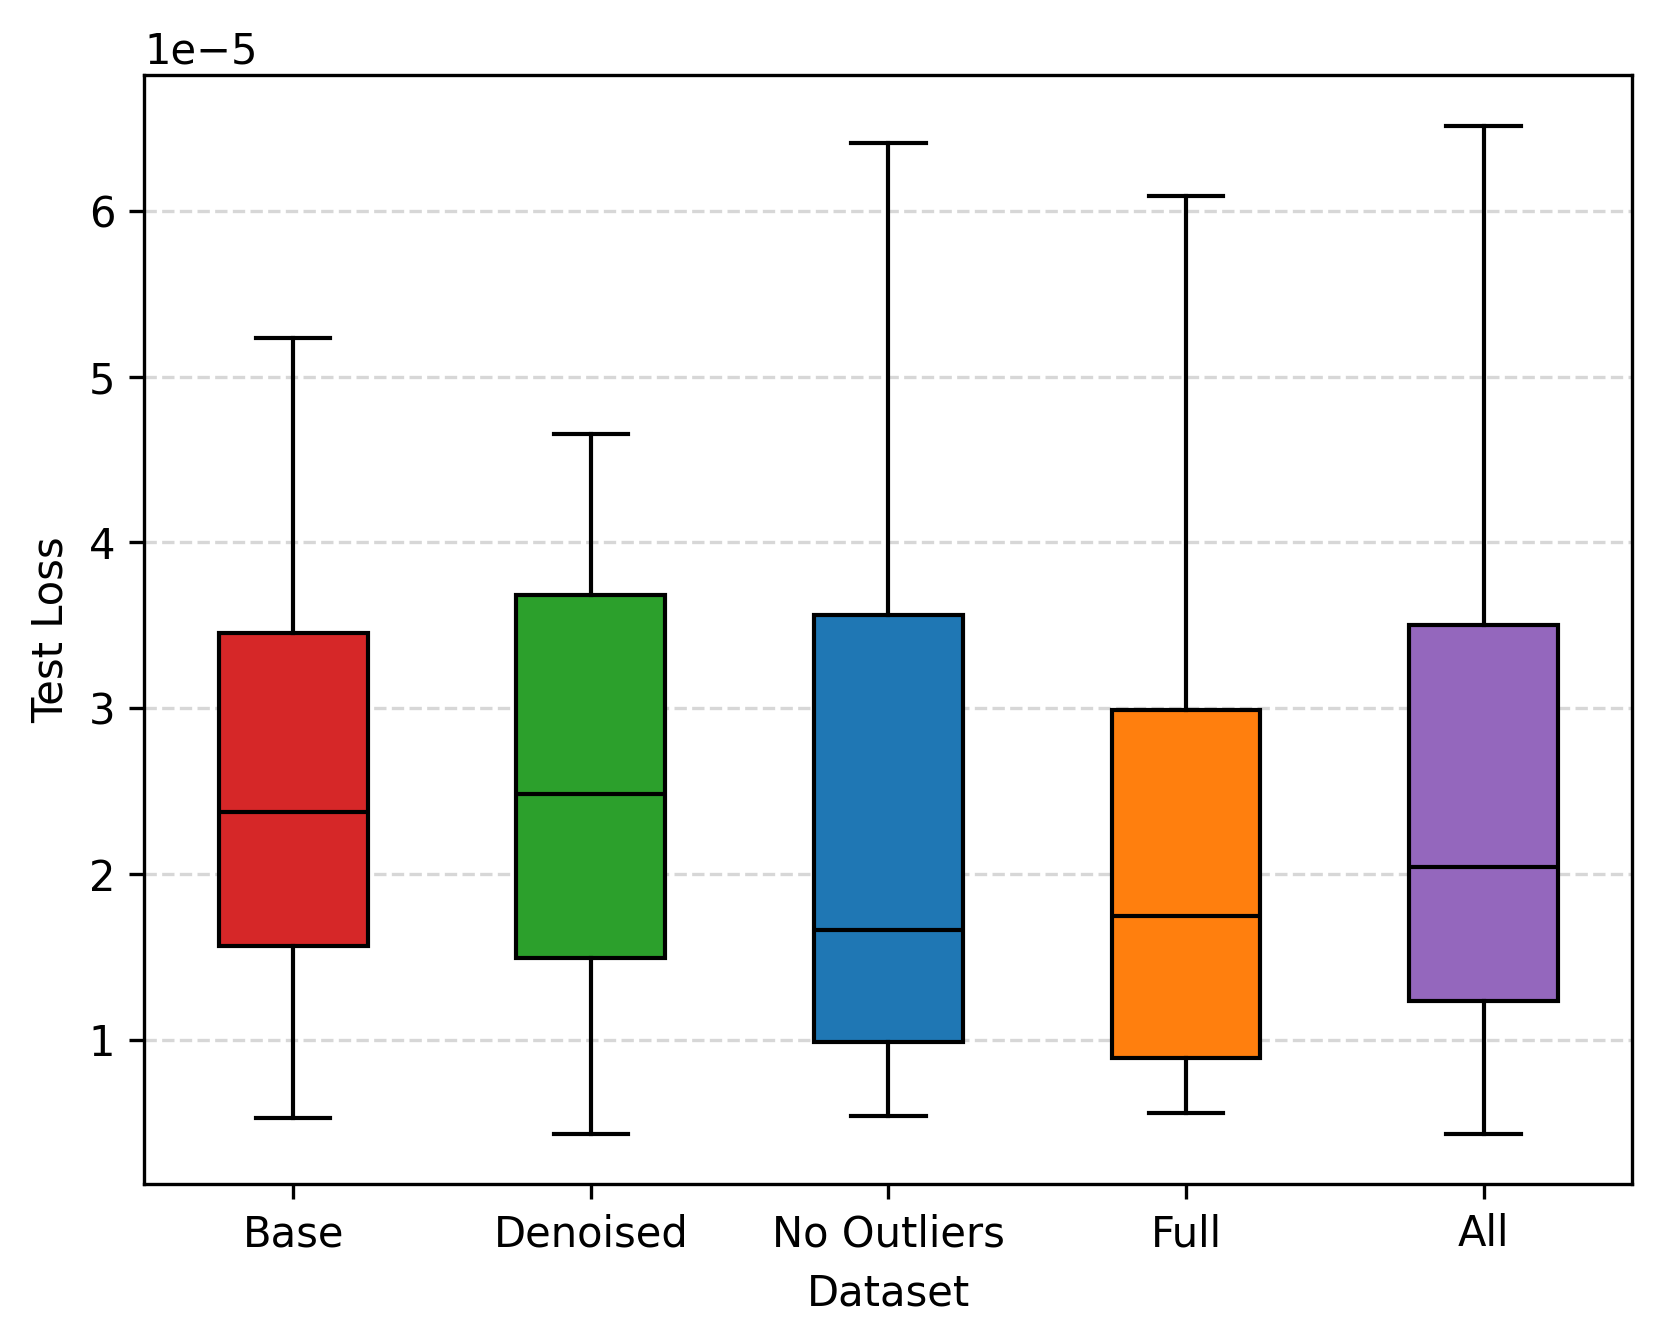

In [1546]:
data = [
    base_test_loss.to_numpy(),
    denoised_test_loss.to_numpy(),
    cleaned_test_loss.to_numpy(),
    preprocessed_test_loss.to_numpy(),
    test_loss.to_numpy(),
]

plt.figure()
bp = plt.boxplot(
    data,
    vert=True,
    patch_artist=True,
    tick_labels=["Base", "Denoised", "No Outliers", "Full", "All"],
    medianprops={"color": "black"},
    sym="",
)

for box, color in zip(
    bp["boxes"], ["tab:red", "tab:green", "tab:blue", "tab:orange", "tab:purple"]
):
    box.set(facecolor=color)


plt.xlabel("Dataset")
plt.ylabel("Test Loss")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Qualitative Analysis

In [1547]:
import torch
from model import ImagePredictor
import warnings

warnings.simplefilter("ignore")


def get_model(path, run, device):
    model = ImagePredictor(
        in_channels=1,
        num_kernels=run["kernels"].item(),
        num_layers=run["layers"].item(),
        kernel_size=(3, 3),
        padding=(1, 1),
        activation=run["activation"].item(),
        image_size=(36, 36),
        device=device,
    ).to(device)
    model.load_state_dict(torch.load(path))
    model.eval()
    return model


models = {
    "base": {
        "best": {"path": "./models/base/best.pt", "run": best_base},
        "worst": {"path": "./models/base/worst.pt", "run": worst_base},
    },
    "denoised": {
        "best": {"path": "./models/denoised/best.pt", "run": best_denoised},
        "worst": {"path": "./models/denoised/worst.pt", "run": worst_denoised},
    },
    "cleaned": {
        "best": {"path": "./models/cleaned/best.pt", "run": best_clean},
        "worst": {"path": "./models/cleaned/worst.pt", "run": worst_clean},
    },
    "full": {
        "best": {"path": "./models/full/best.pt", "run": best_full},
        "worst": {"path": "./models/full/worst.pt", "run": worst_full},
    },
    "overall": {
        "best": {"path": "./models/overall/best.pt", "run": best},
        "worst": {"path": "./models/overall/worst.pt", "run": worst},
    },
}
device = torch.device("mps")
for ds in models:
    models[ds]["best"] = get_model(**models[ds]["best"], device=device)
    models[ds]["worst"] = get_model(**models[ds]["worst"], device=device)

In [1603]:
import utils.data as data
from torchvision.transforms import v2

datasets = data.Datasets("/Users/henrywilliams/Documents/uni/amml/assessment/data")

n6 = datasets.n6_full().numpy()
n3 = datasets.n3_full().numpy()

n3_min = n3.min()
n3_max = n3.max()
n6_min = n6.min()
n6_max = n6.max()

n6 = (n6 - n6_min) / (n6_max - n6_min)
n3 = (n3 - n3_min) / (n3_max - n3_min)

test_idxs = np.array([[1, 2, 3], [13, 14, 15]])

test_n6 = n6[:, test_idxs]
test_n3 = n3[:, test_idxs]


n6_x = (
    torch.tensor(test_n6[:, :, :-1], dtype=torch.float32, device=device)
    .reshape(800, 2, 36, 36, 1)
    .permute(0, 4, 1, 2, 3)
)
n3_x = (
    torch.tensor(test_n3[:, :, :-1], dtype=torch.float32, device=device)
    .reshape(200, 2, 36, 36, 1)
    .permute(0, 4, 1, 2, 3)
)

n6_y = torch.tensor(test_n6[:, :, -1], dtype=torch.float32, device=device).reshape(
    800, 1, 1, 36, 36
)
n3_y = torch.tensor(test_n3[:, :, -1], dtype=torch.float32, device=device).reshape(
    200, 1, 1, 36, 36
)

In [1549]:
def plot_predictions(model, title):
    n6_yhat = np.array([model(X.unsqueeze(0)).cpu().detach() for X in n6_Xs])
    n3_yhat = np.array([model(X.unsqueeze(0)).cpu().detach() for X in n3_Xs])

    fig = plt.figure()
    fig.suptitle(title)

    n6_fig, n3_fig = fig.subfigures(nrows=1, ncols=2)
    n6_fig.suptitle("N6")
    n3_fig.suptitle("N3")

    axs = n6_fig.subplots(N_IMGS, 3)

    axs[0, 0].title.set_text("Predicted")
    axs[0, 1].title.set_text("Actual")
    axs[0, 2].title.set_text("Error (MSE)")
    for ax, y_hat, y in zip(axs, n6_yhat, n6_ys):
        ax[0].imshow(y_hat.reshape(36, 36))
        ax[0].axis("off")
        ax[1].imshow(y.cpu().reshape(36, 36))
        ax[1].axis("off")
        ax[2].imshow((y.cpu().reshape(36, 36) - y_hat.reshape(36, 36)).pow(2))
        ax[2].axis("off")

    axs = n3_fig.subplots(4, 3)
    axs[0, 0].title.set_text("Predicted")
    axs[0, 1].title.set_text("Actual")
    axs[0, 2].title.set_text("Error (MSE)")
    for ax, y_hat, y in zip(axs, n3_yhat, n3_ys):
        ax[0].imshow(y_hat.reshape(36, 36))
        ax[0].axis("off")
        ax[1].imshow(y.cpu().reshape(36, 36))
        ax[1].axis("off")
        ax[2].imshow((y.cpu().reshape(36, 36) - y_hat.reshape(36, 36)).pow(2))
        ax[2].axis("off")


N_IMGS = 4

n6_test_seqs = np.random.choice(len(n6_x), N_IMGS)
n3_test_seqs = np.random.choice(len(n3_x), N_IMGS)


n6_Xs = n6_x[n6_test_seqs]
n6_ys = n6_y[n6_test_seqs]
n3_Xs = n3_x[n3_test_seqs]
n3_ys = n3_y[n3_test_seqs]

## Best Results

### Base Dataset

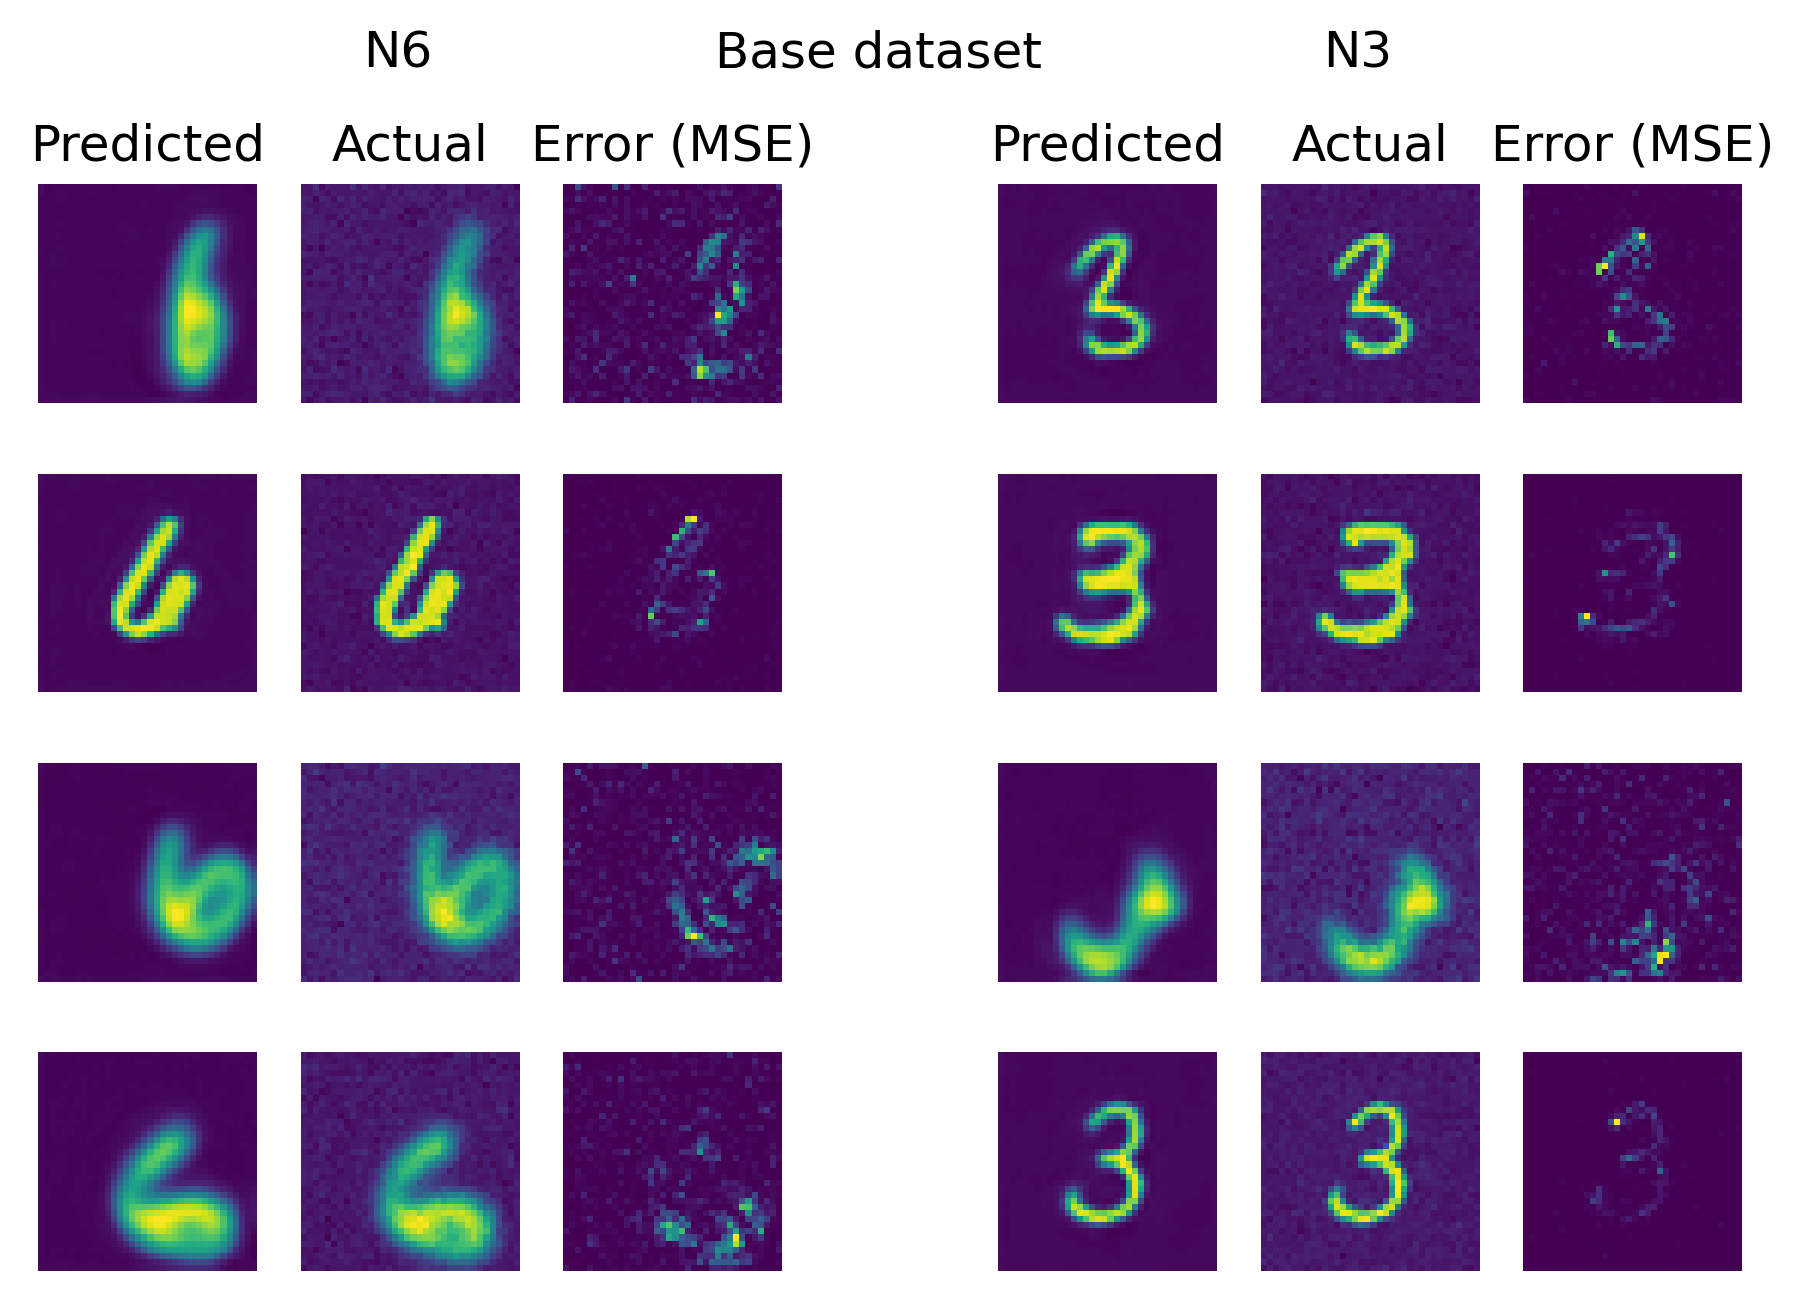

In [1550]:
plot_predictions(models["base"]["best"], "Base dataset")

### Denoised Dataset

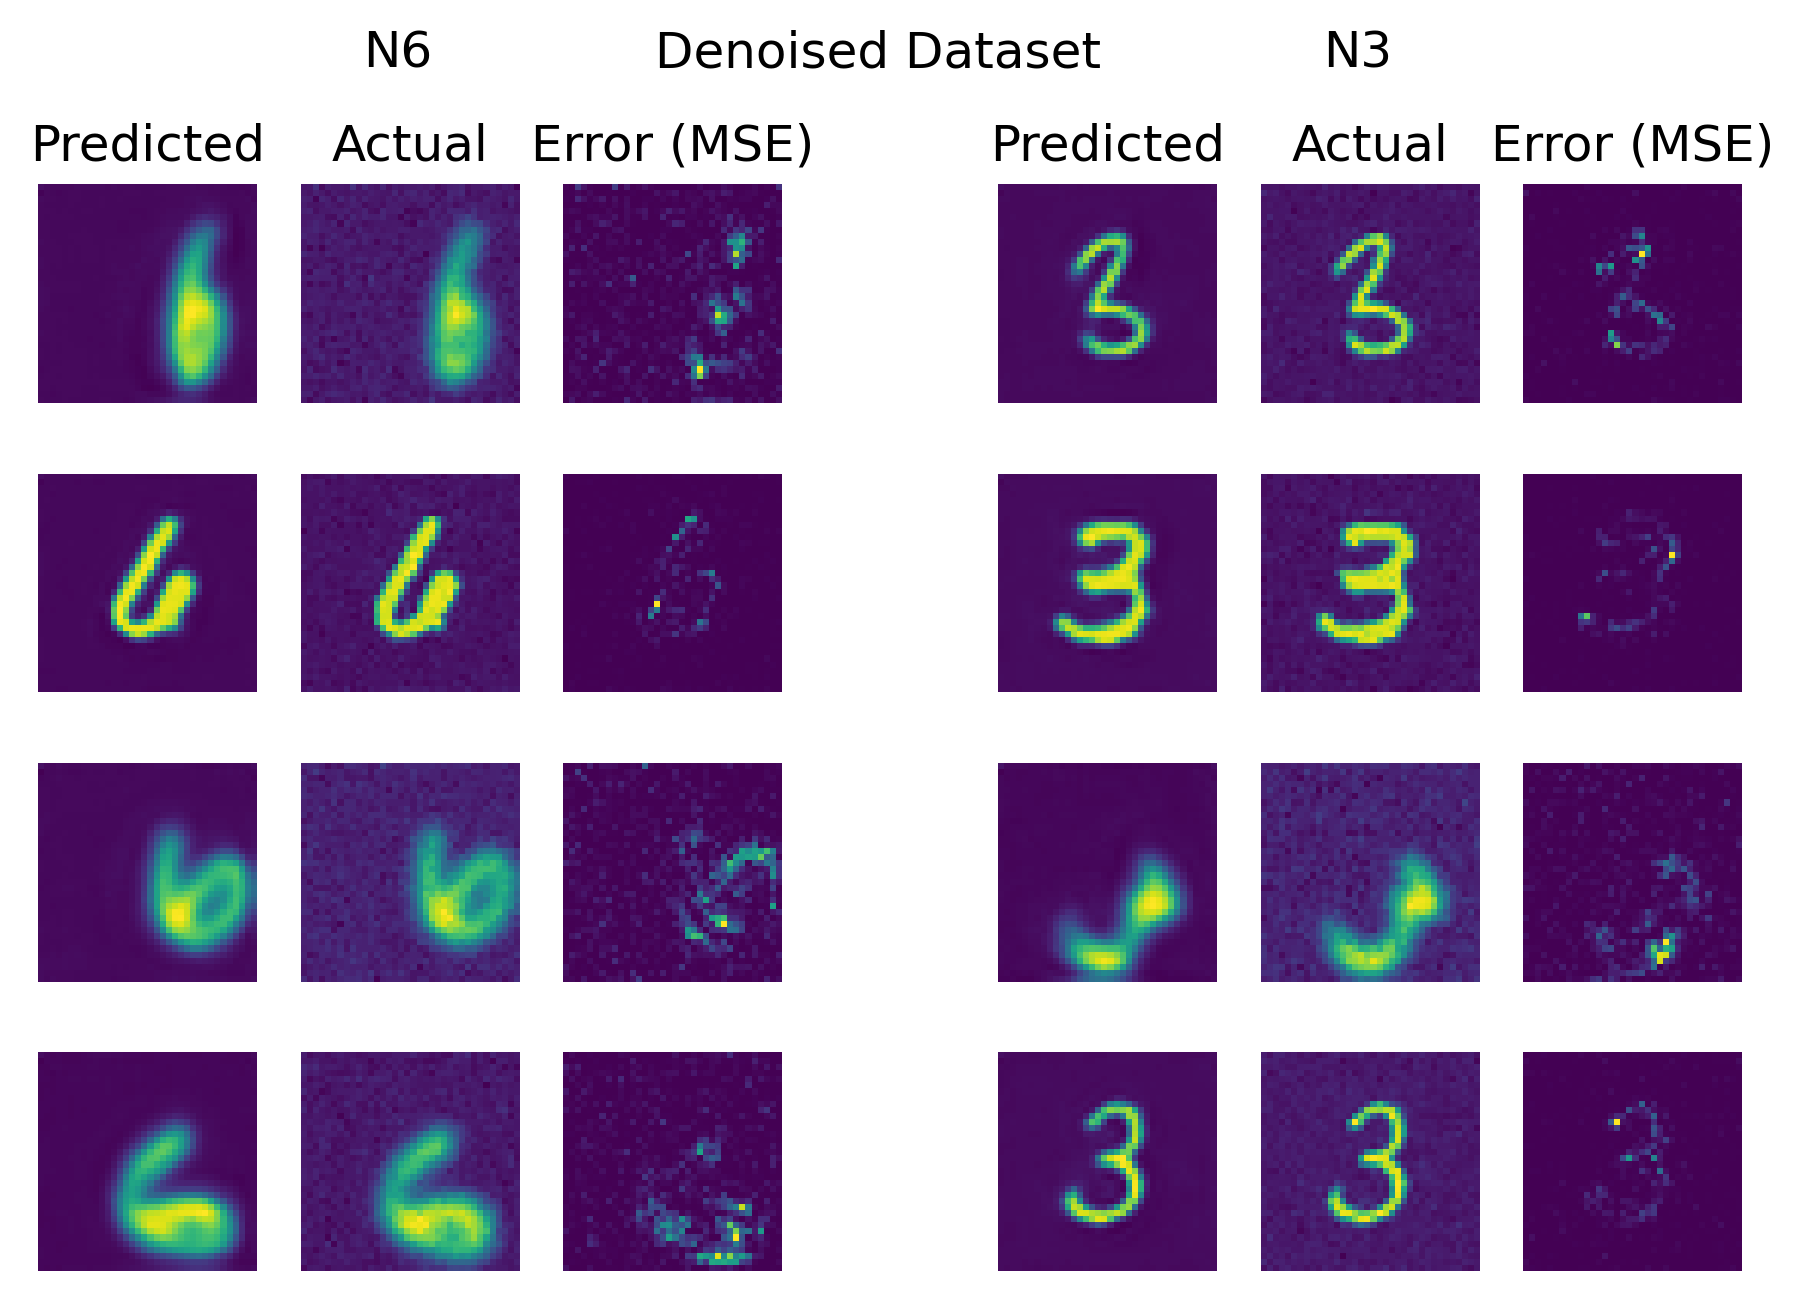

In [1551]:
plot_predictions(models["denoised"]["best"], "Denoised Dataset")

### Cleaned Dataset

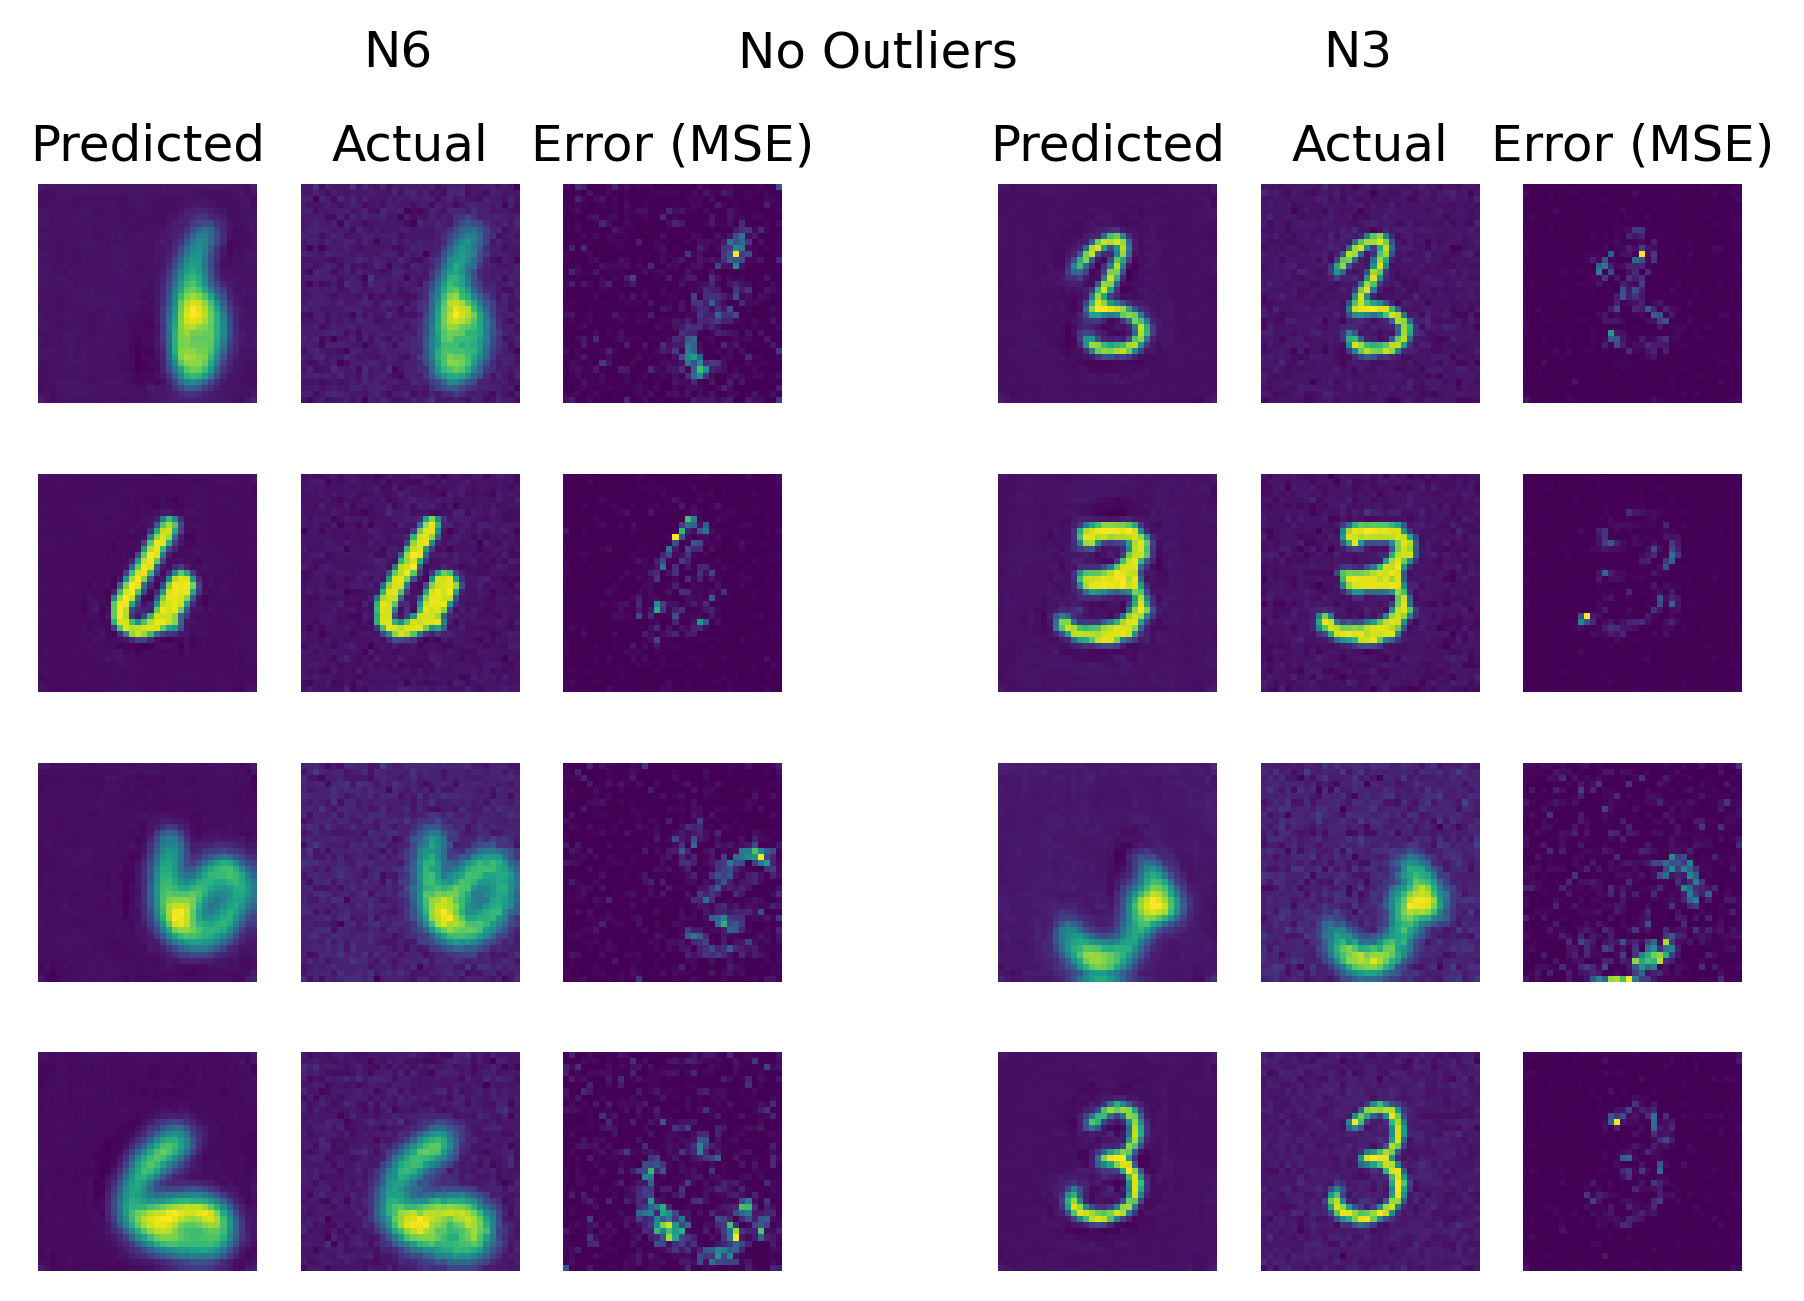

In [1552]:
plot_predictions(models["cleaned"]["best"], "No Outliers")

### Fully Processed

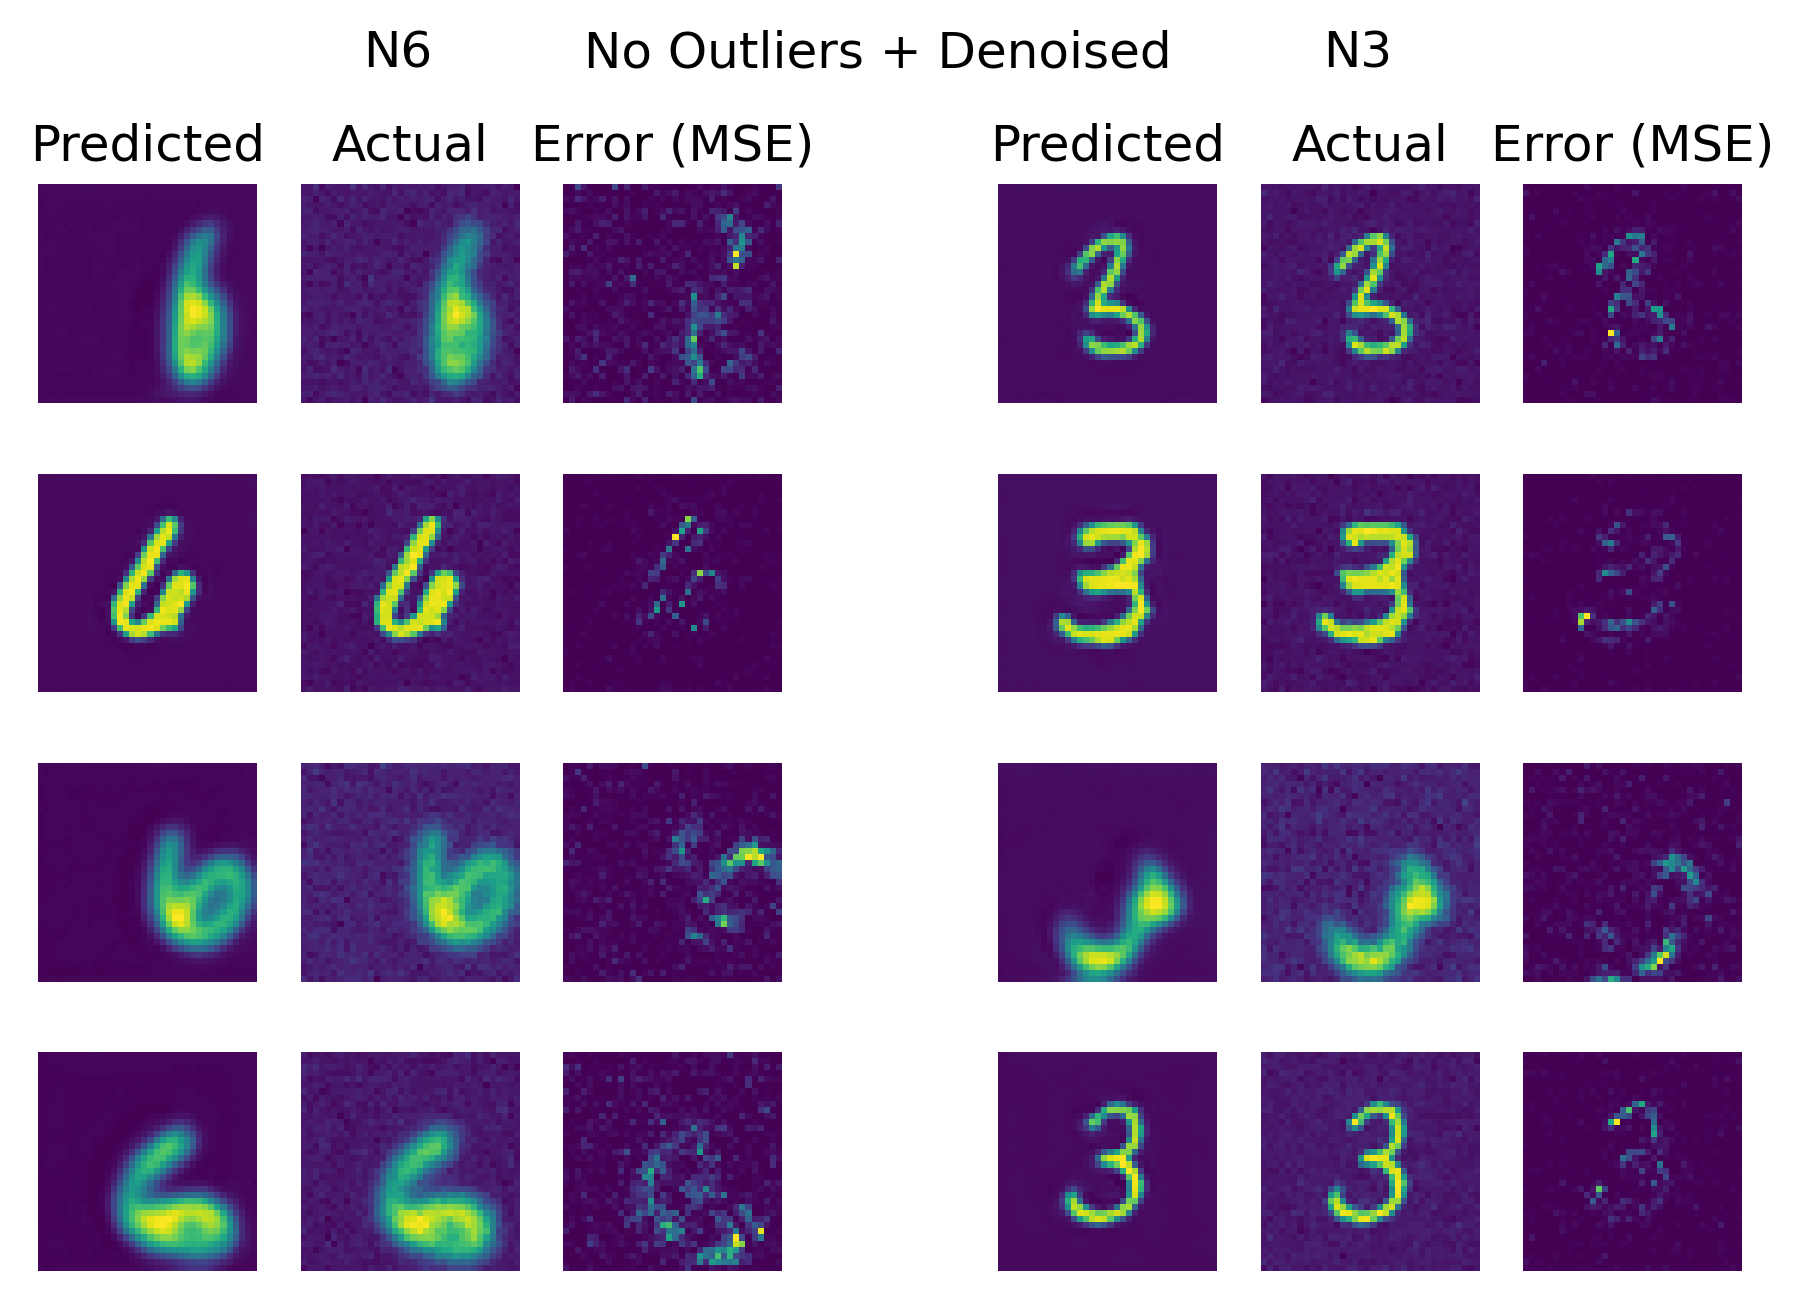

In [1553]:
plot_predictions(models["full"]["best"], "No Outliers + Denoised")

### Overall Best

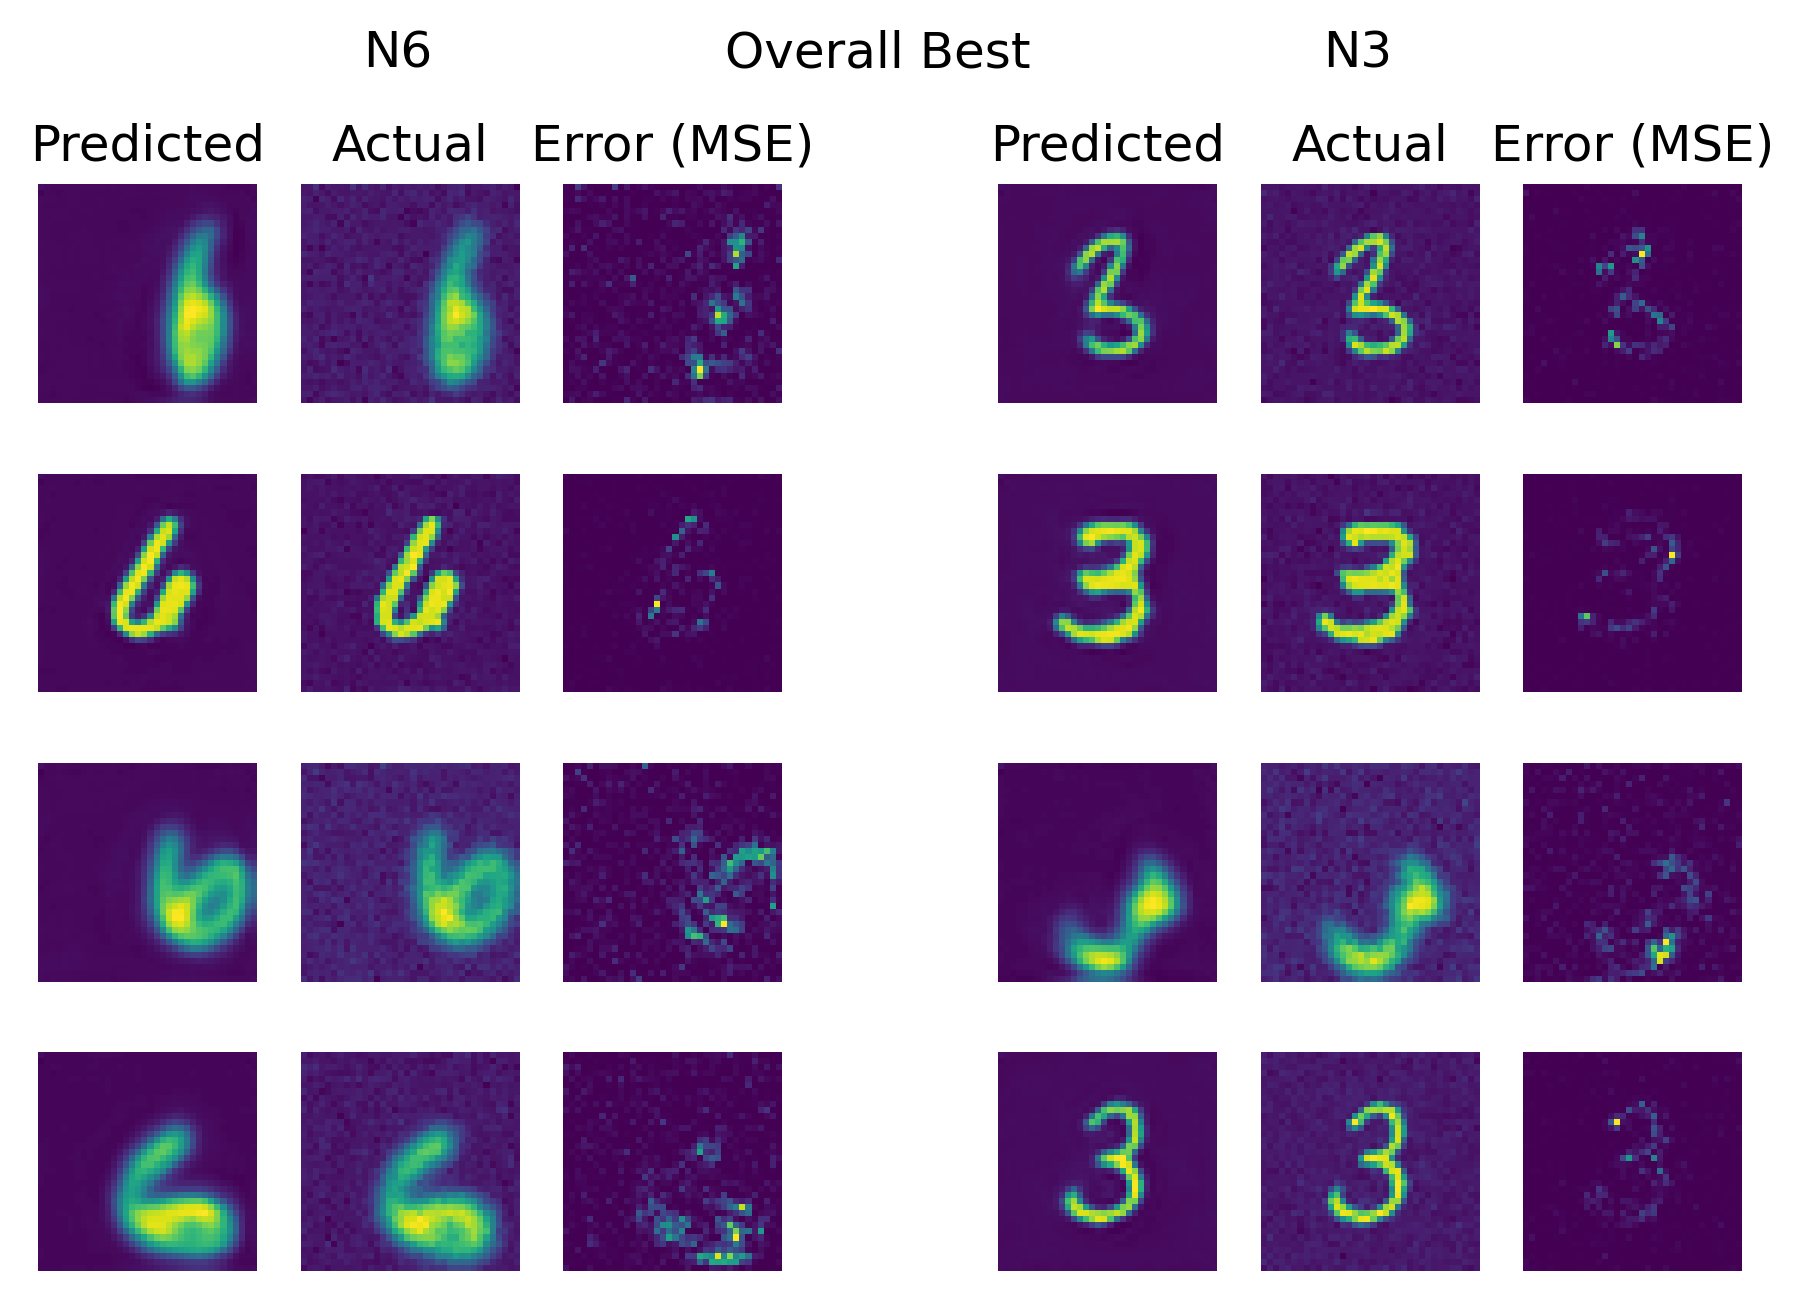

In [1554]:
plot_predictions(models["overall"]["best"], "Overall Best")

## Worst Results

### Base Dataset

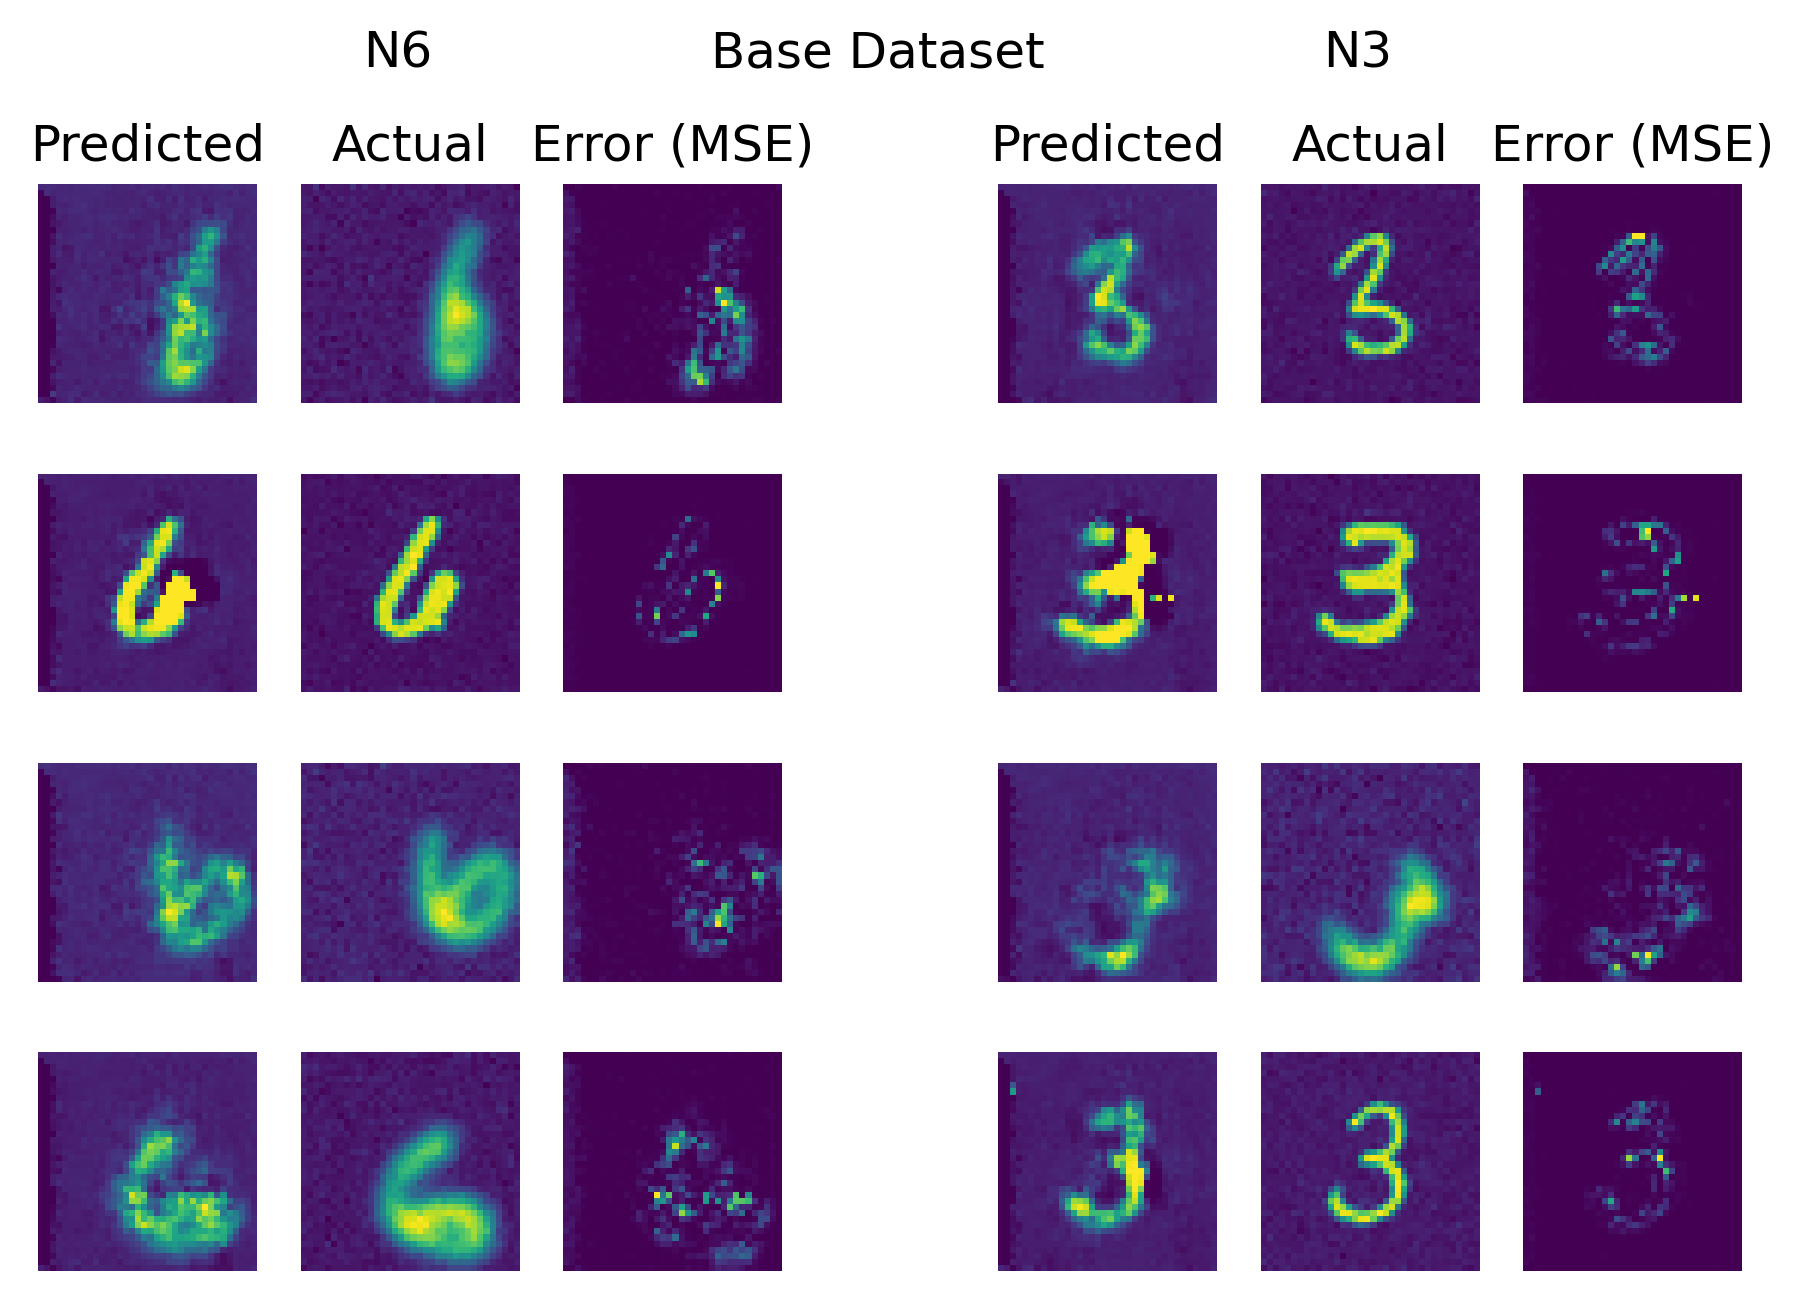

In [1555]:
plot_predictions(models["base"]["worst"], "Base Dataset")

### Denoised Dataset

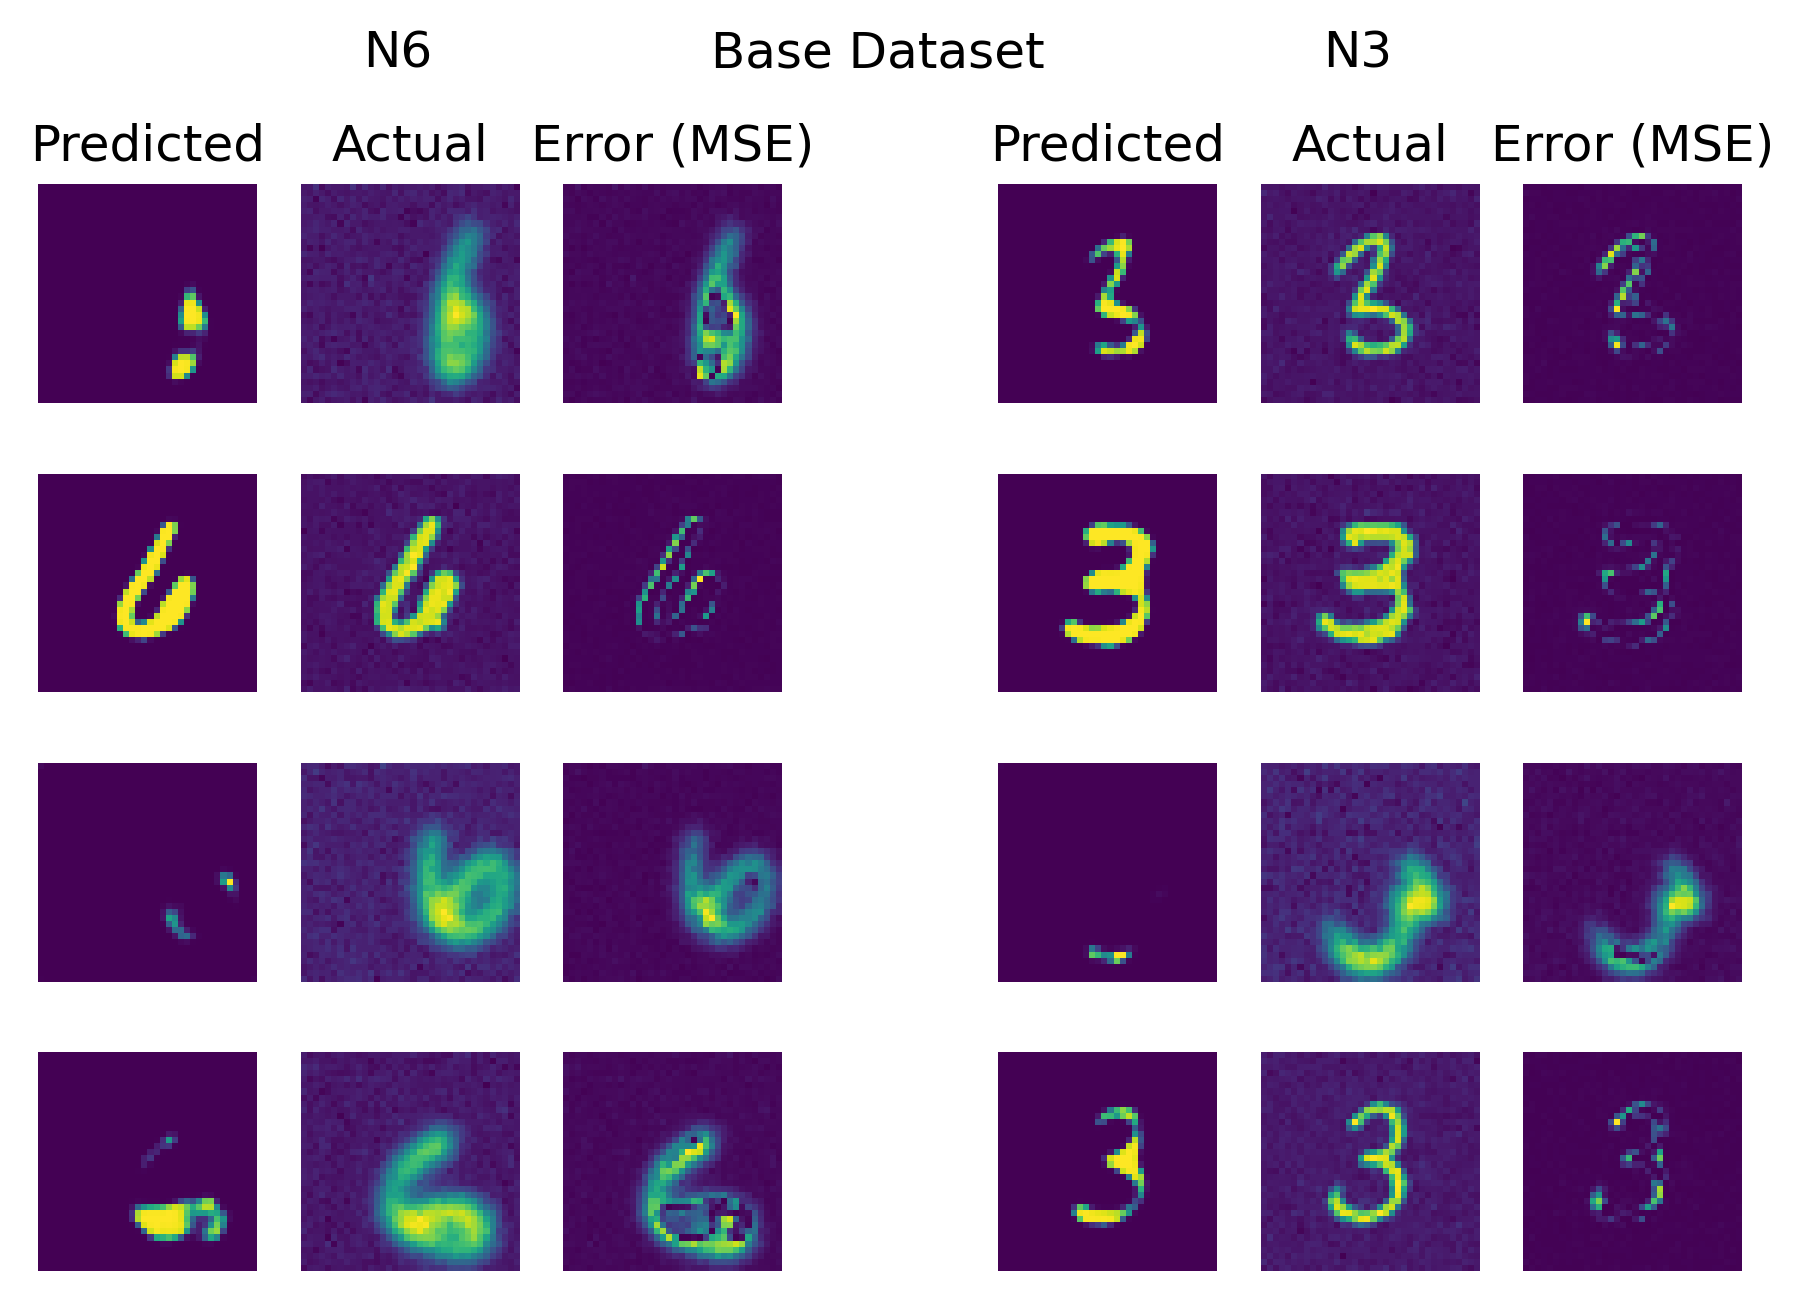

In [1556]:
plot_predictions(models["denoised"]["worst"], "Base Dataset")

### Cleaned Dataset

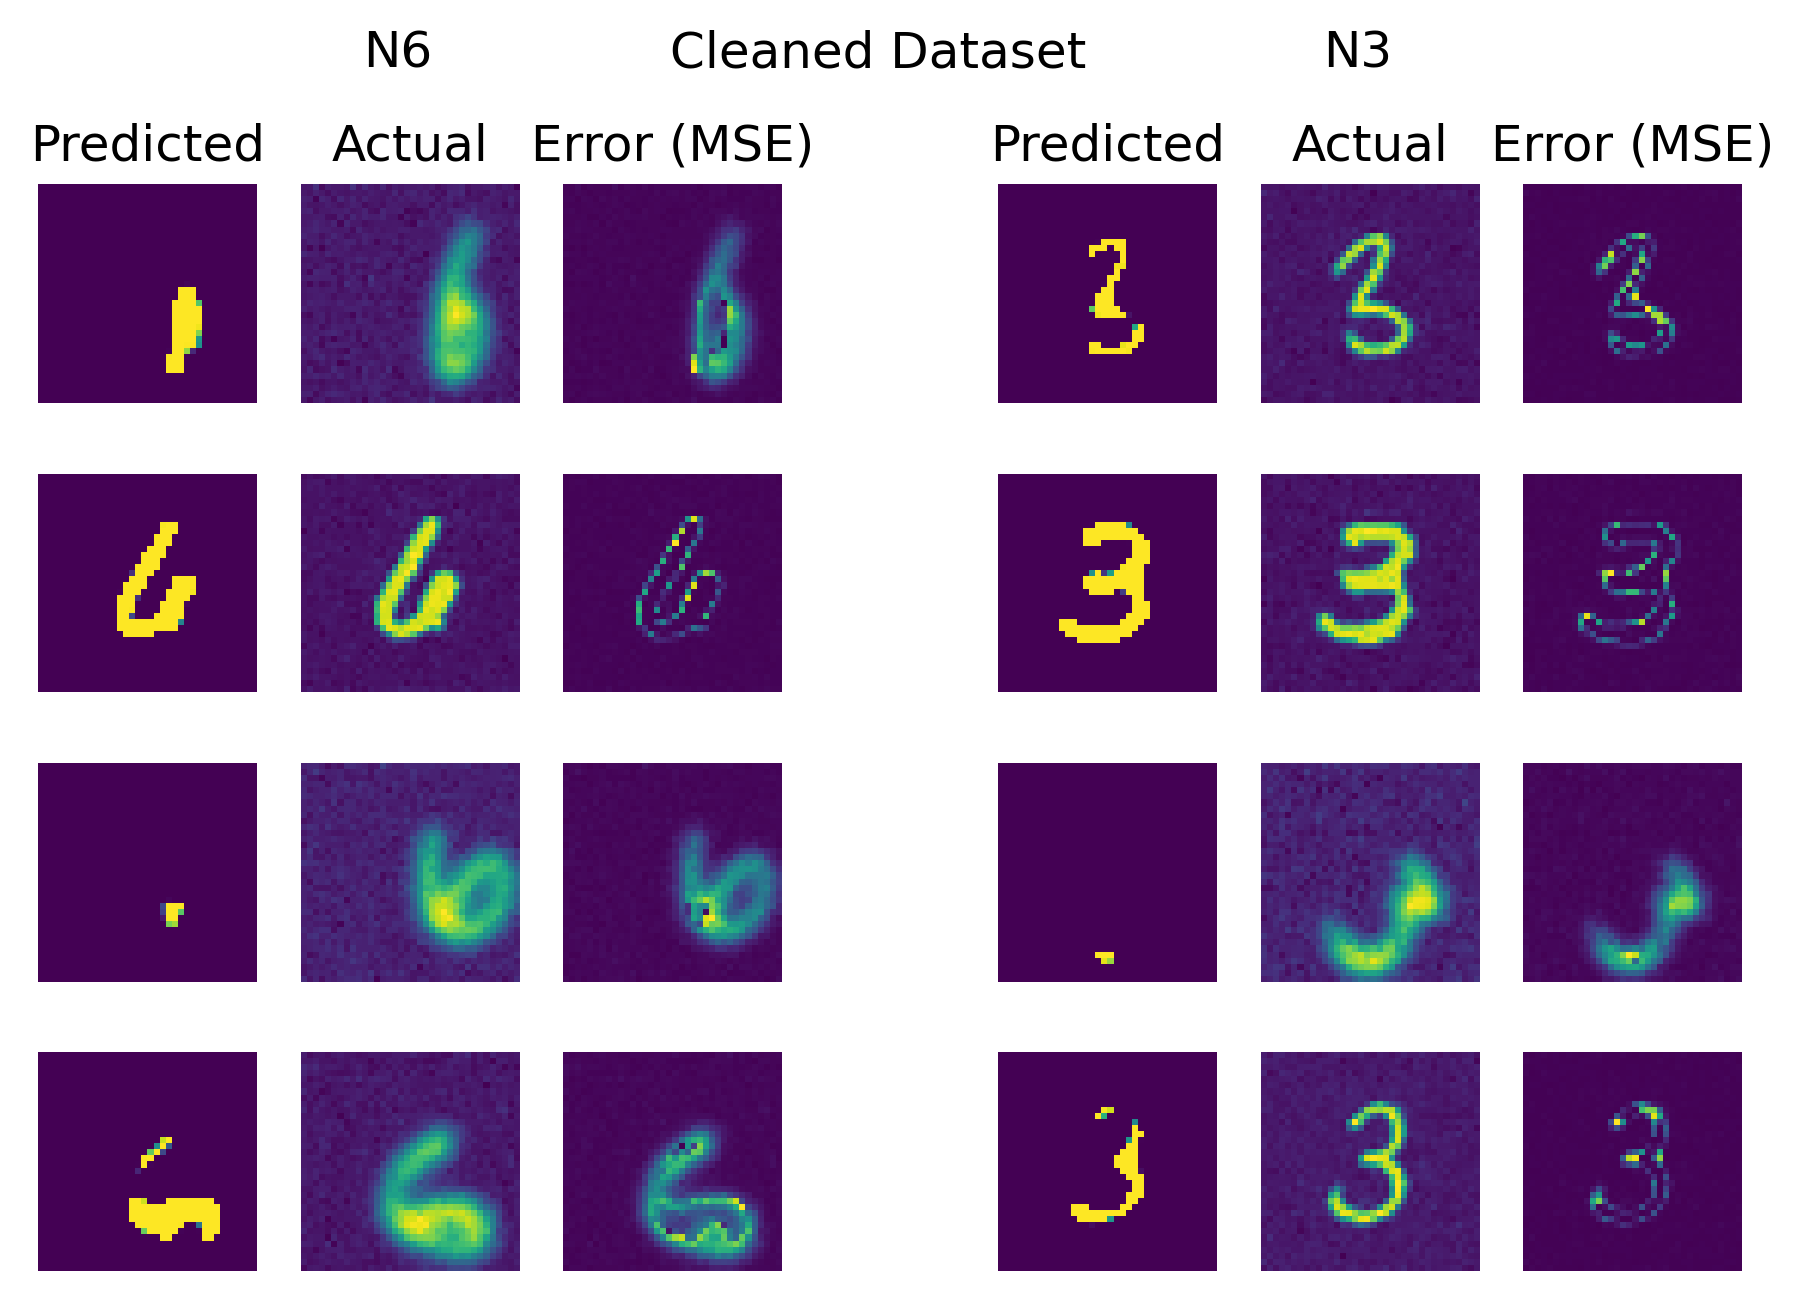

In [1557]:
plot_predictions(models["cleaned"]["worst"], "Cleaned Dataset")

### Fully Processed

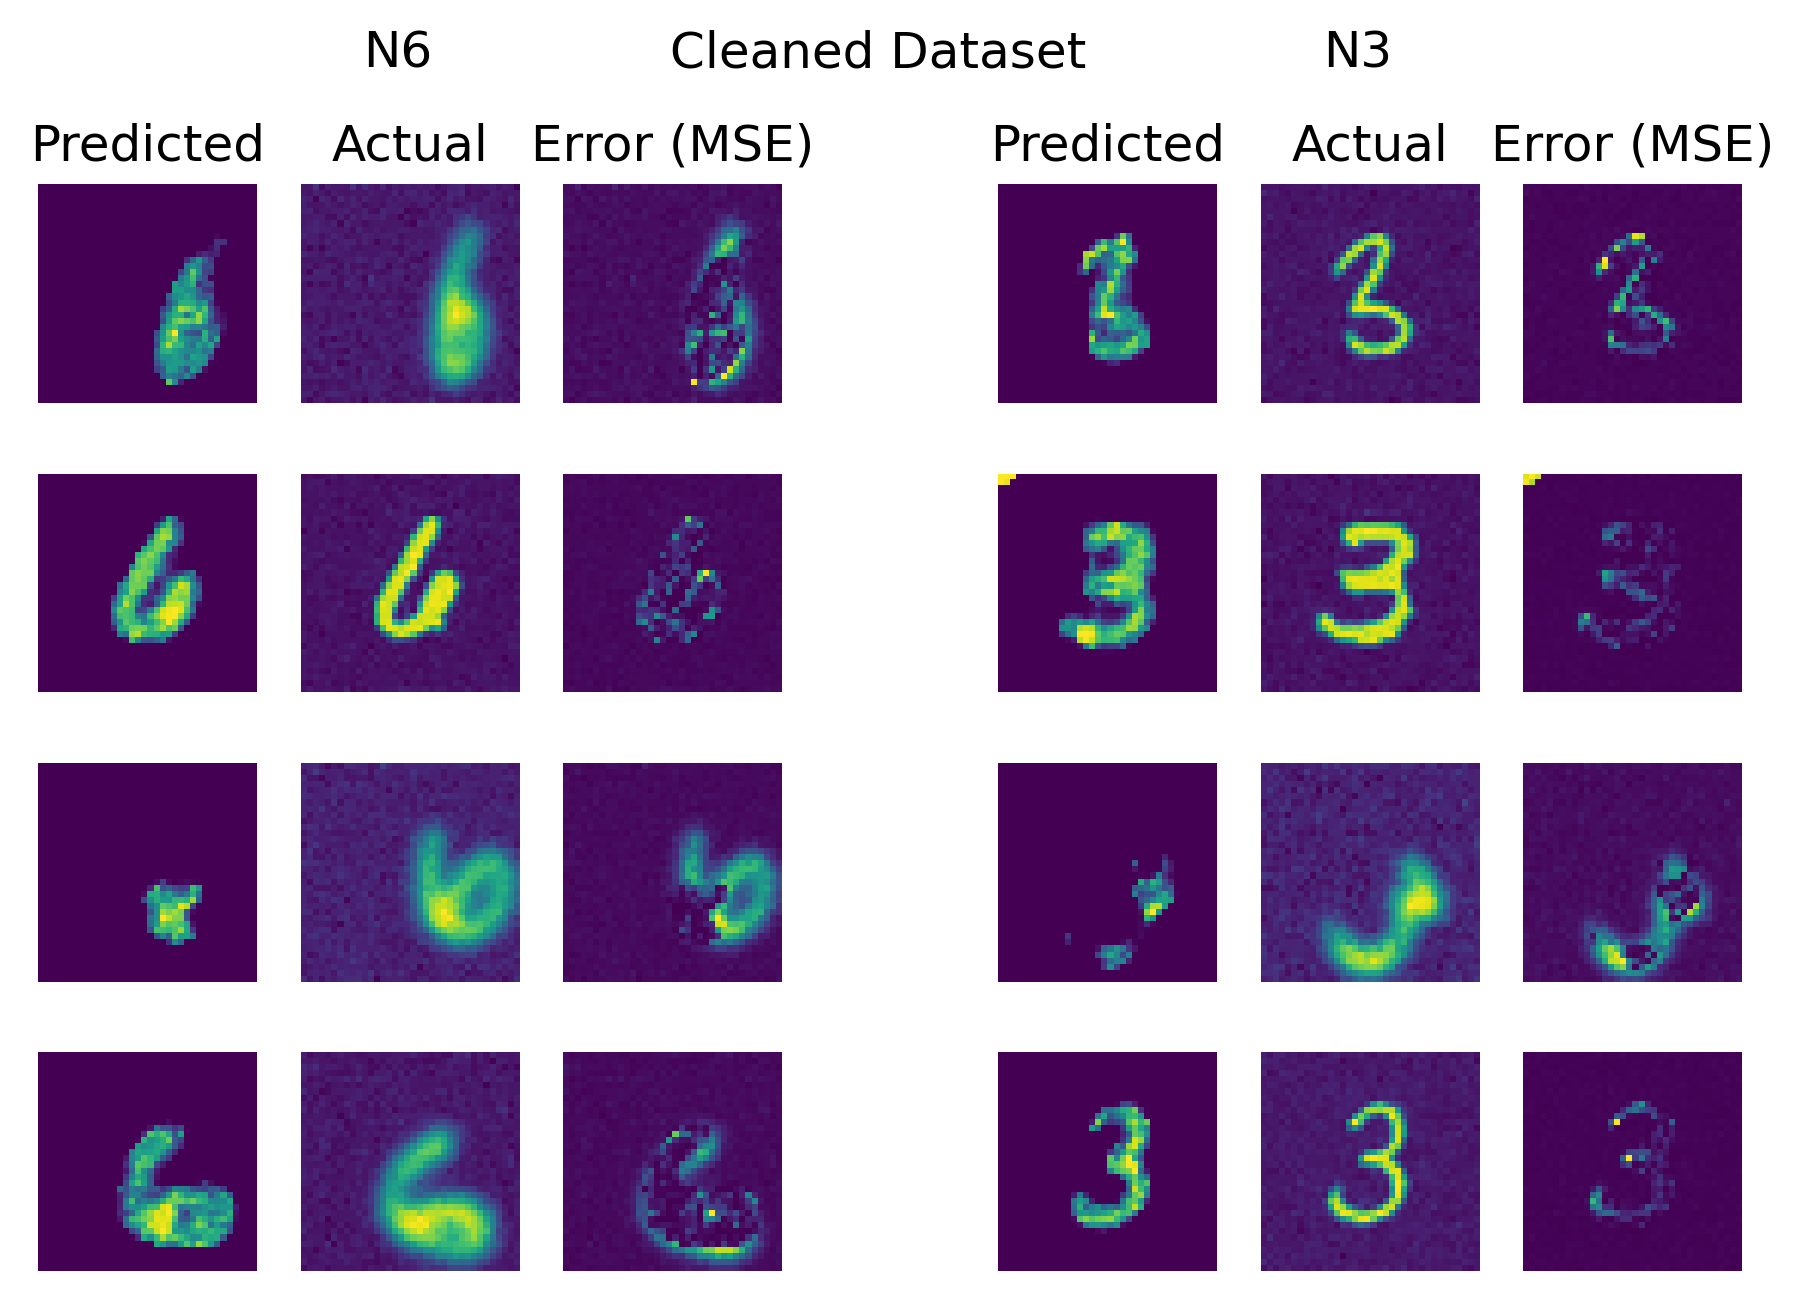

In [1558]:
plot_predictions(models["full"]["worst"], "Cleaned Dataset")

### Overall Worst

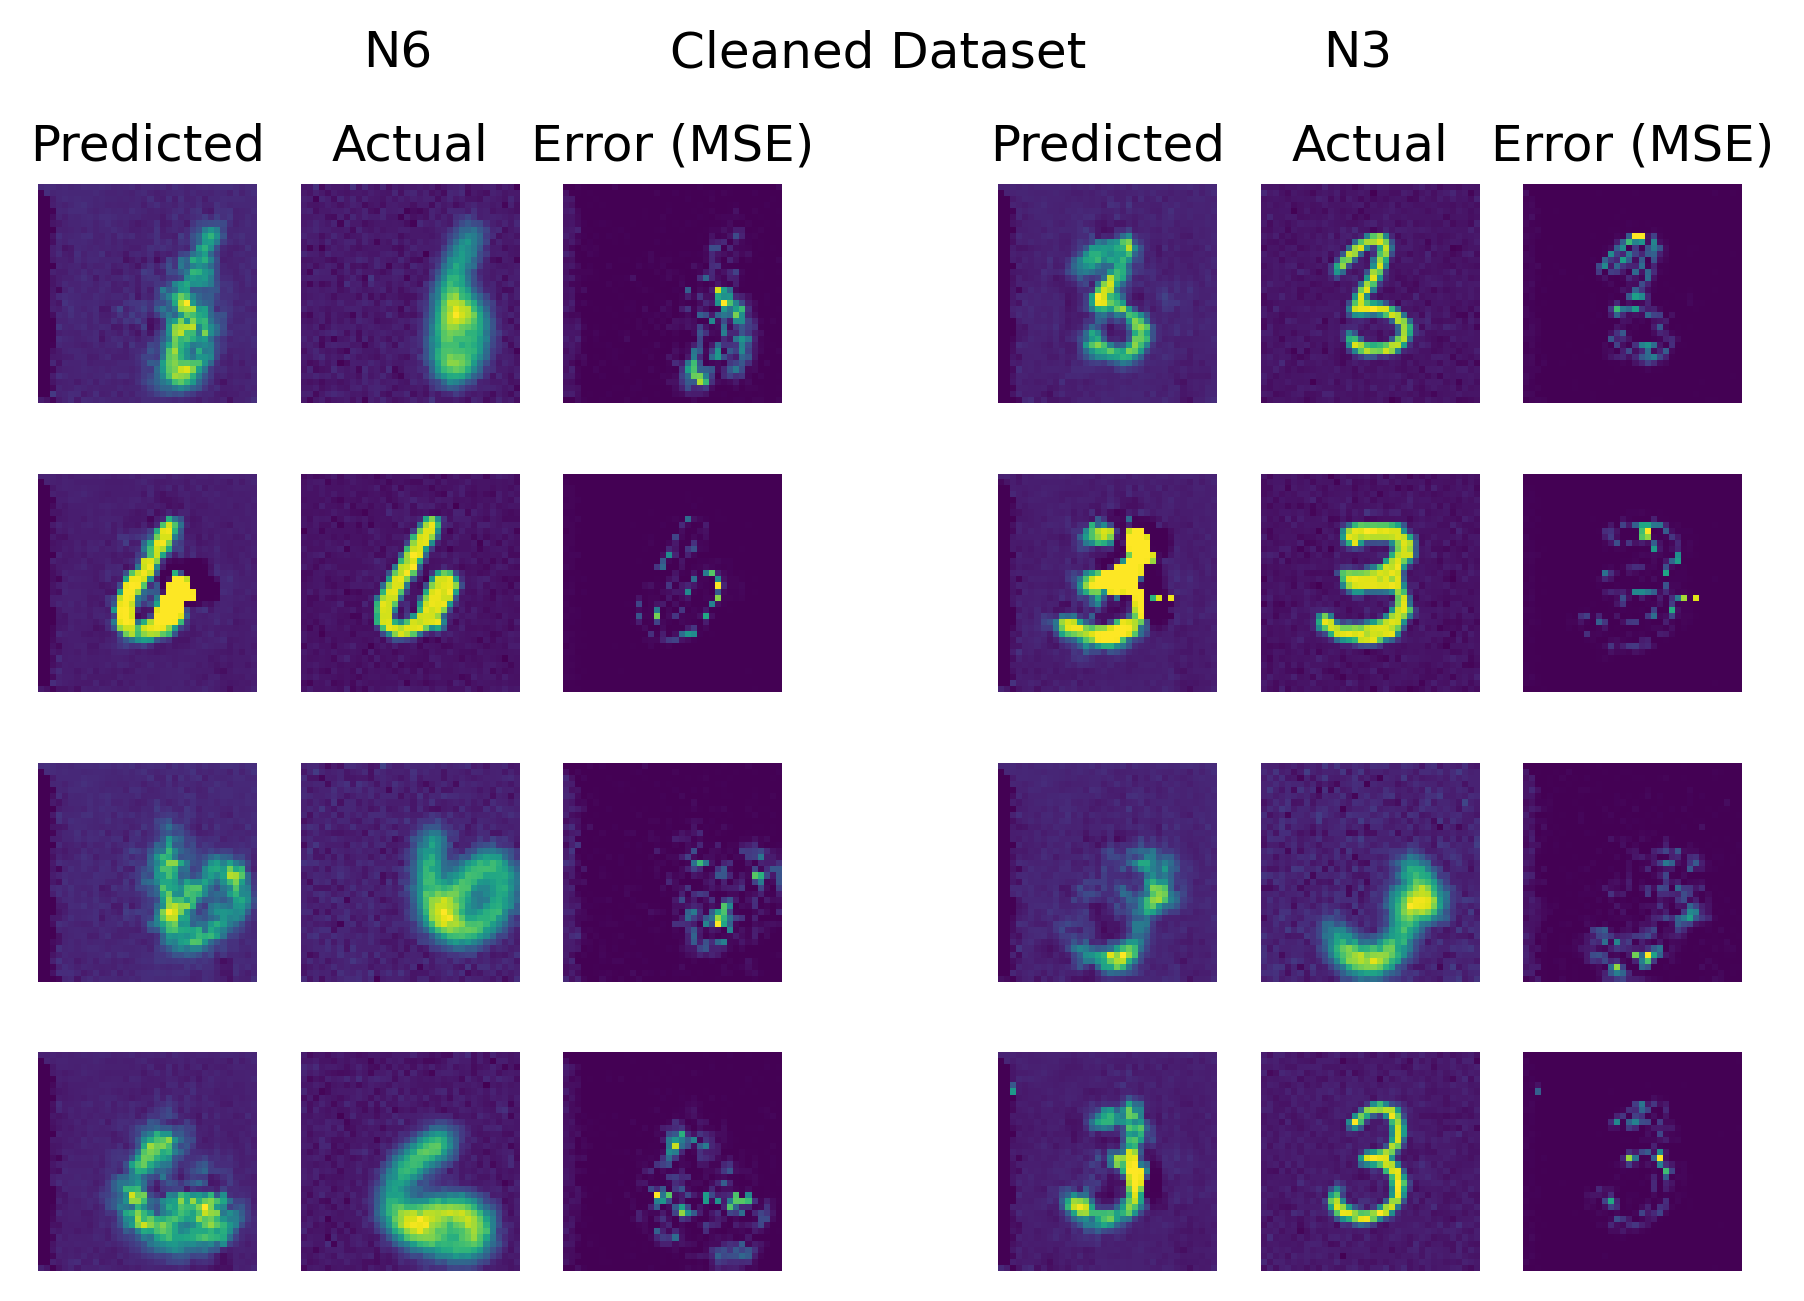

In [1559]:
plot_predictions(models["overall"]["worst"], "Cleaned Dataset")

## In Context

In [1560]:
N_SEQUENCES = 4

n6_sequence_ids = np.random.choice(len(n6), N_SEQUENCES)
n3_sequence_ids = np.random.choice(len(n3), N_SEQUENCES)

n6_sequences = n6[n6_sequence_ids]
n3_sequences = n3[n3_sequence_ids]

In [1561]:
def plot_sequence(model, title, sequence=0):
    n6_Xs = (
        torch.tensor(
            n6_sequences[:, [[1, 2], [13, 14]]], dtype=torch.float32, device=device
        )
        .reshape(-1, 2, 36, 36, 1)
        .permute(0, 4, 1, 2, 3)
    )
    n6_ys = model(n6_Xs).reshape(N_SEQUENCES, 2, 36, 36, 1)
    n6_sequences[:, [3, 15]] = n6_ys.cpu().detach()
    n3_Xs = (
        torch.tensor(
            n3_sequences[:, [[1, 2], [13, 14]]], dtype=torch.float32, device=device
        )
        .reshape(-1, 2, 36, 36, 1)
        .permute(0, 4, 1, 2, 3)
    )
    n3_ys = model(n3_Xs).reshape(N_SEQUENCES, 2, 36, 36, 1)
    n3_sequences[:, [3, 15]] = n3_ys.cpu().detach()

    def plot_full_sequence(sequence, sfig):
        axs = sfig.subplots(2, 8)
        for i in range(data.FULL_SEQUENCE_LENGTH):
            if i in data.TEST_INDICIES:
                axs[i // 8][i % 8].title.set_text("^")
            axs[i // 8][i % 8].imshow(sequence[i])
            axs[i // 8][i % 8].axis("off")

    fig = plt.figure(constrained_layout=True)
    fig.suptitle(title)
    n6_fig, n3_fig = fig.subfigures(2, 1)
    n6_fig.suptitle("N6")
    n3_fig.suptitle("N3")

    plot_full_sequence(n6_sequences[sequence], n6_fig)
    plot_full_sequence(n3_sequences[sequence], n3_fig)

#### Best Results

##### Base Dataset

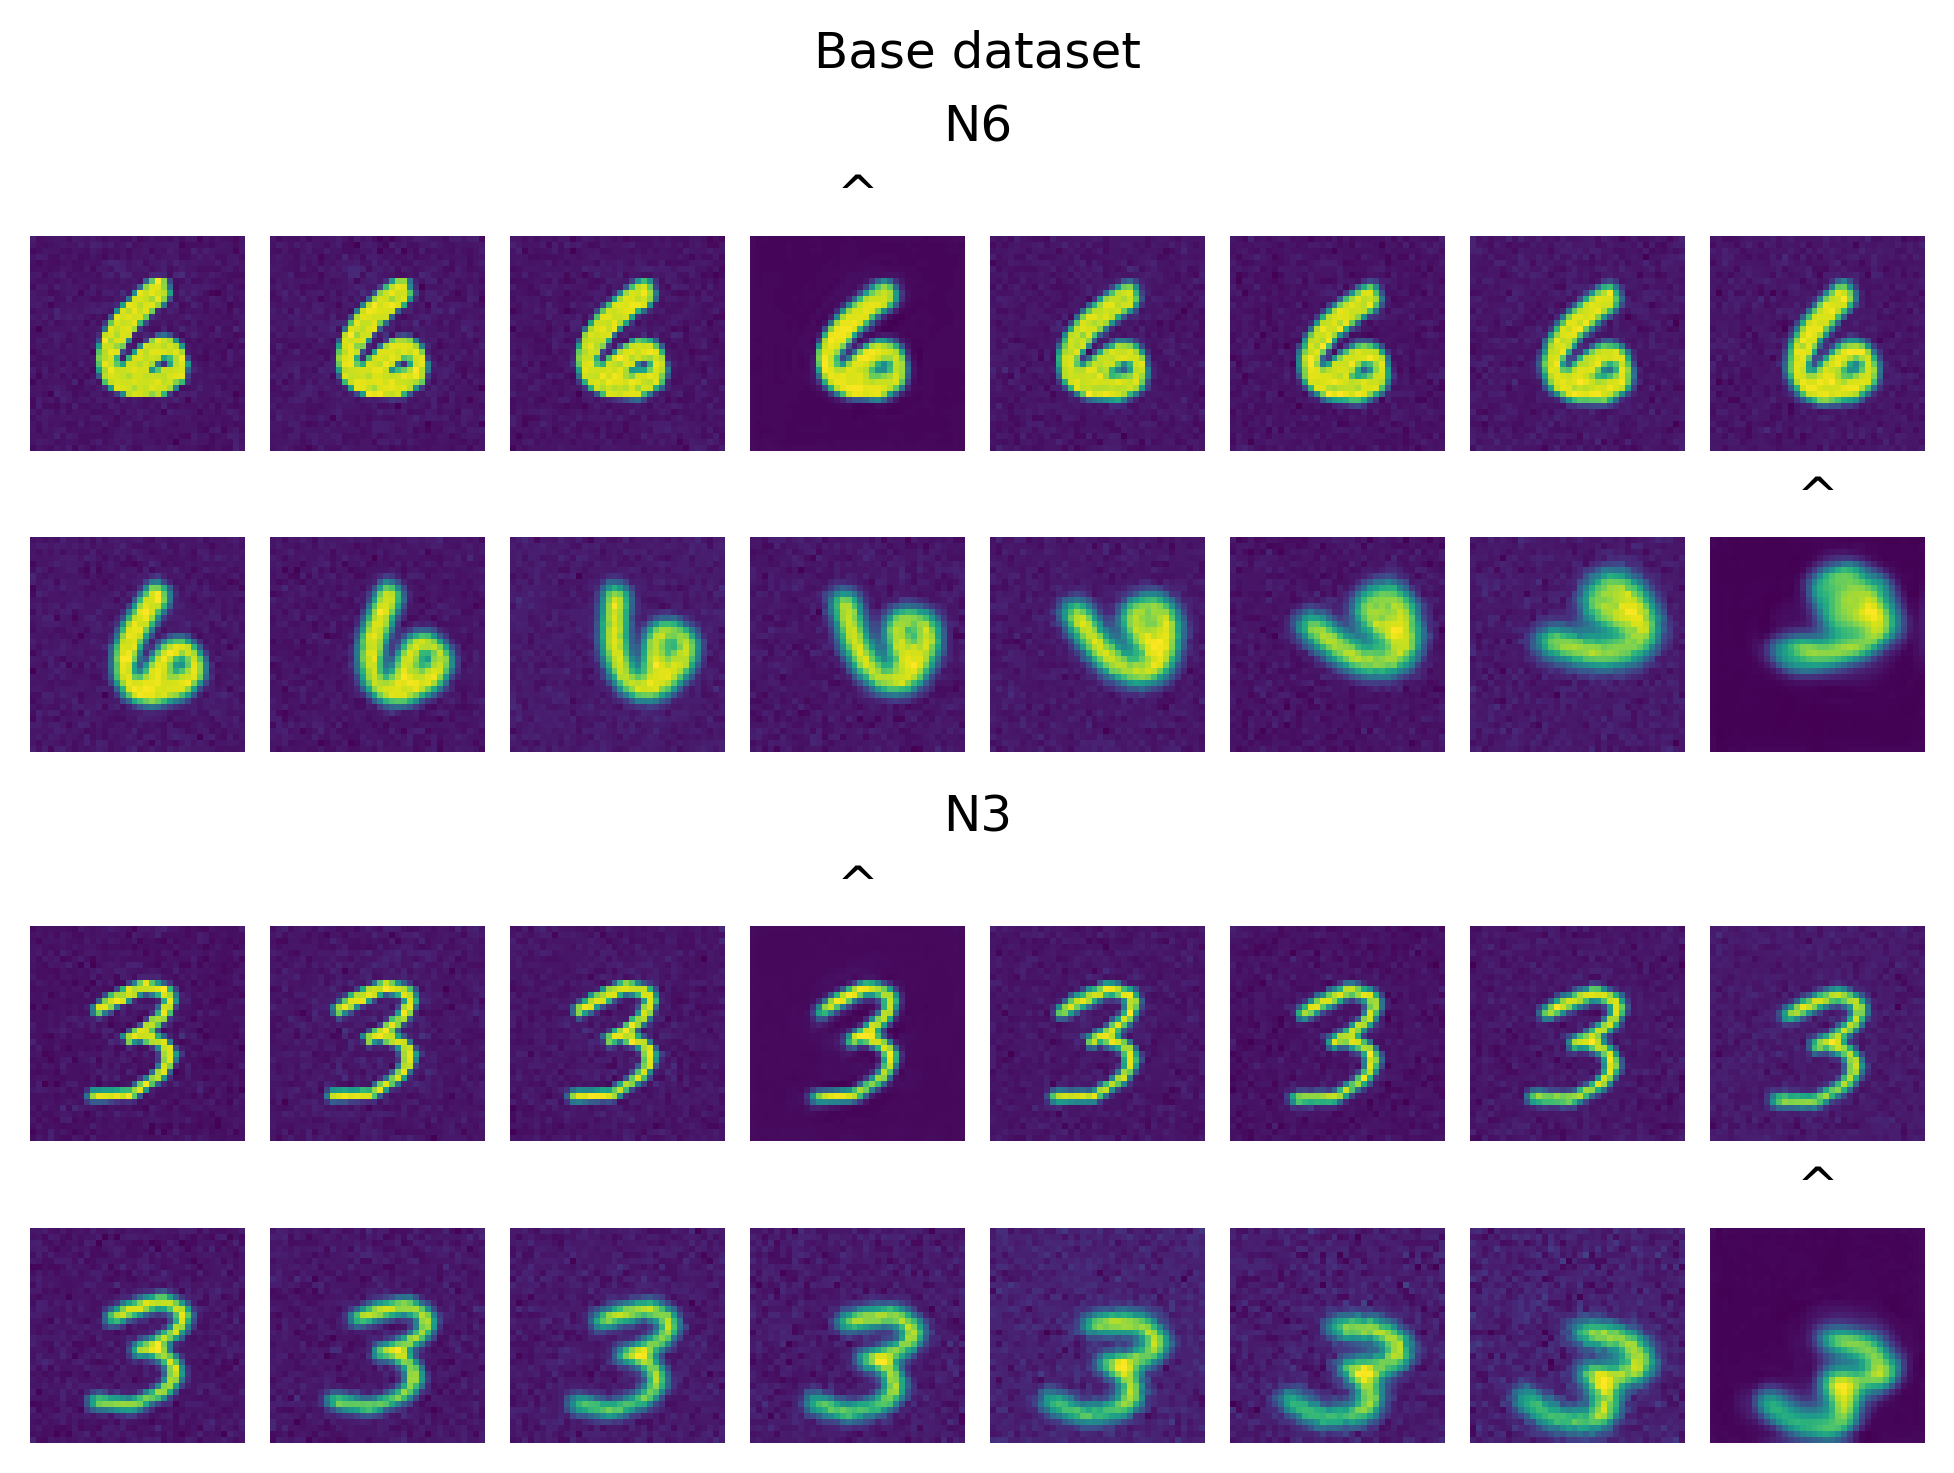

In [1562]:
plot_sequence(models["base"]["best"], "Base dataset")

##### Denoised Dataset

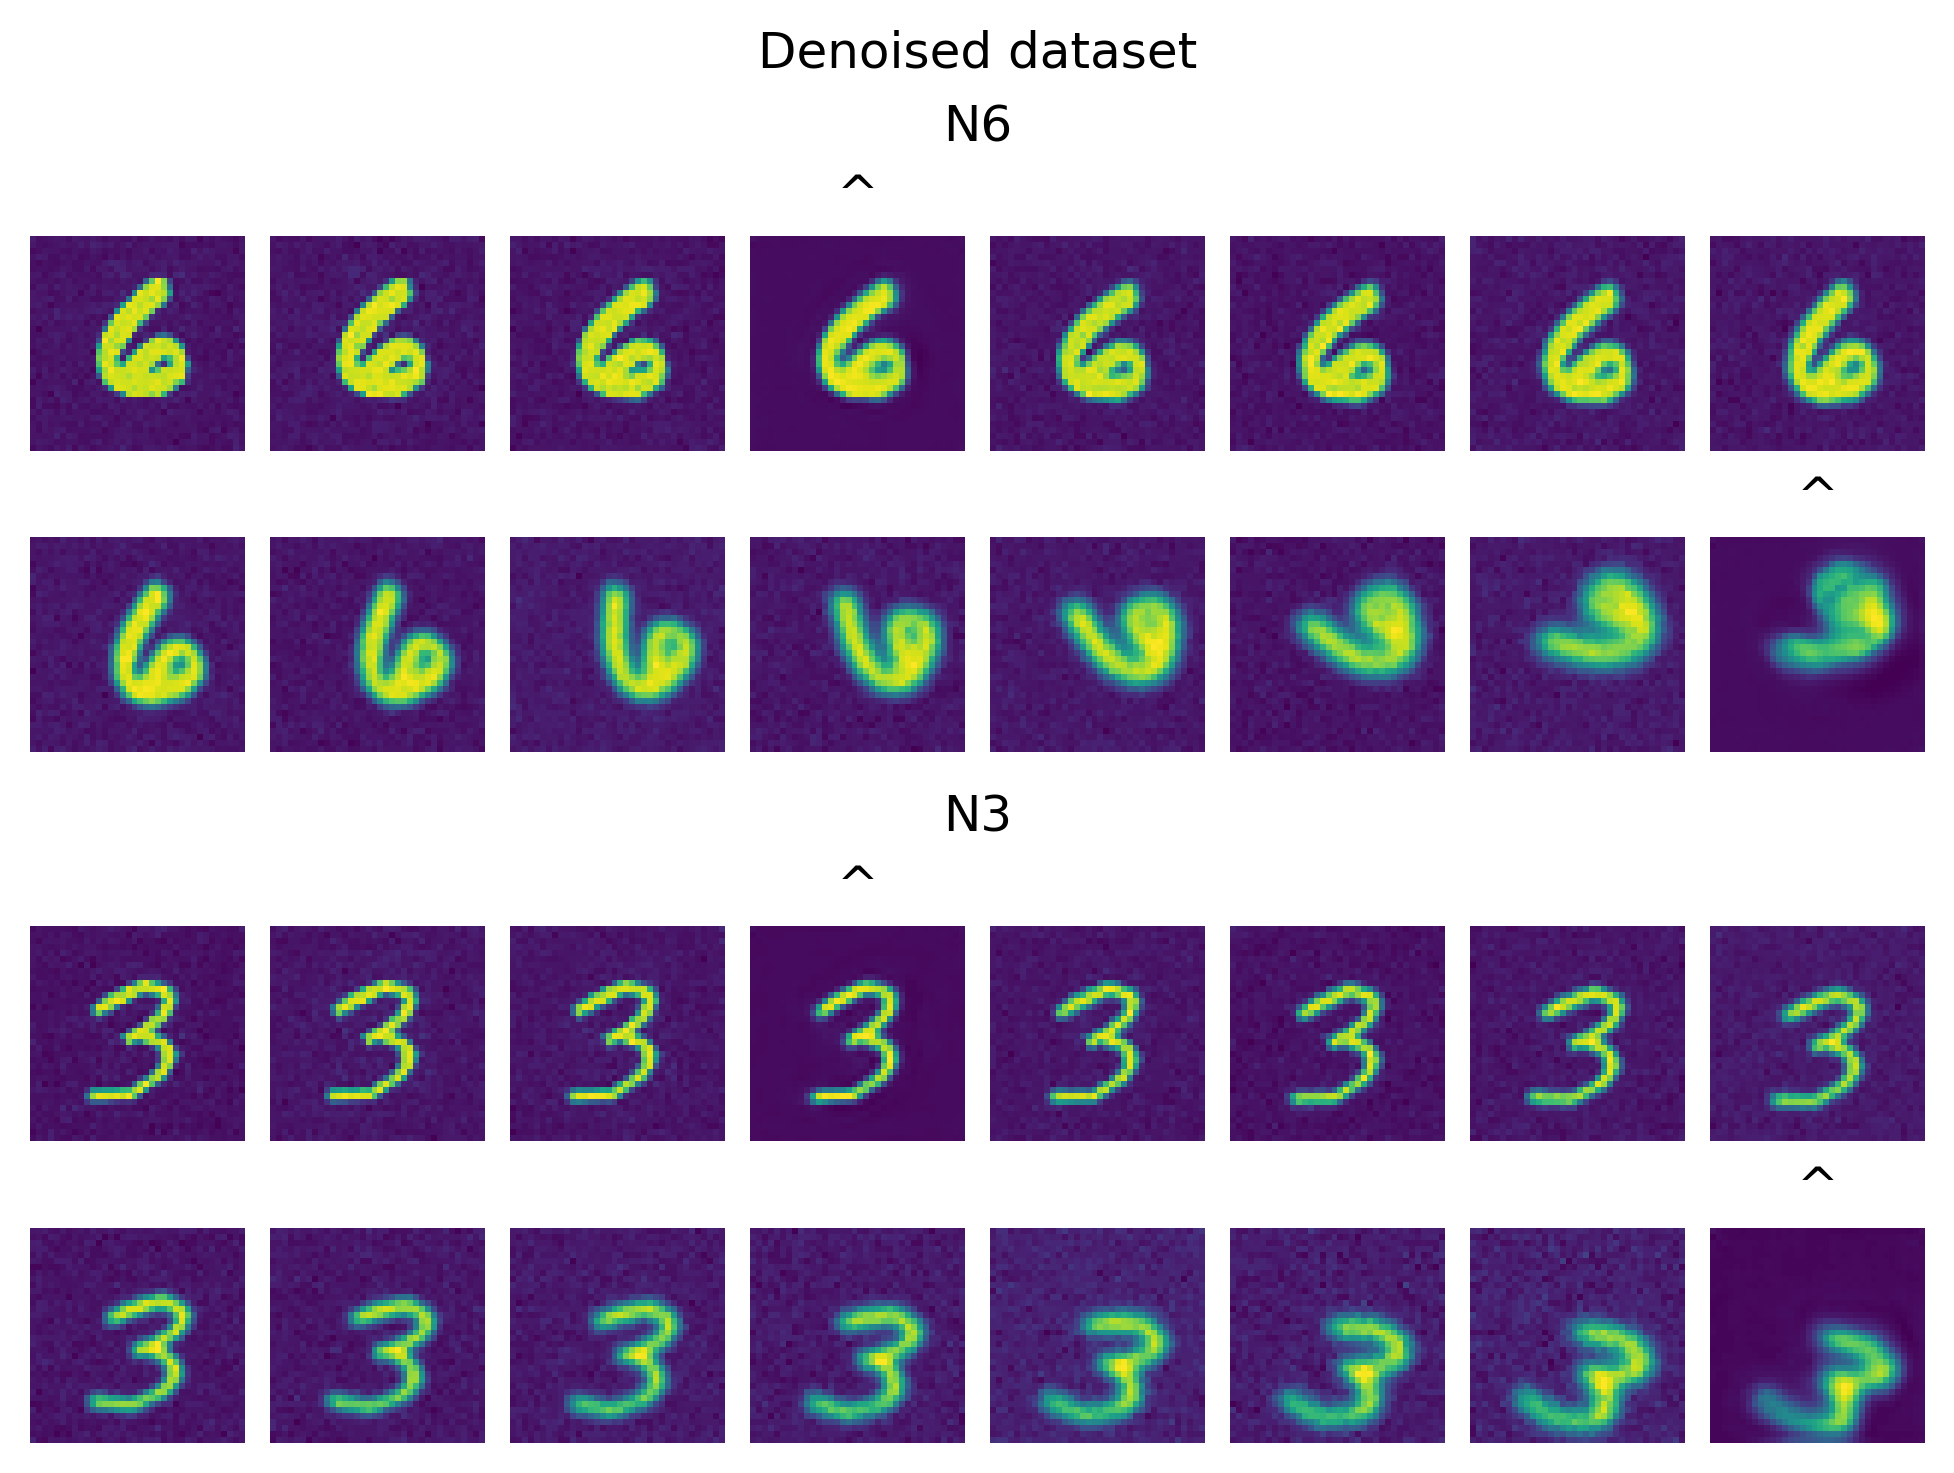

In [1563]:
plot_sequence(models["denoised"]["best"], "Denoised dataset")

##### Cleaned Dataset

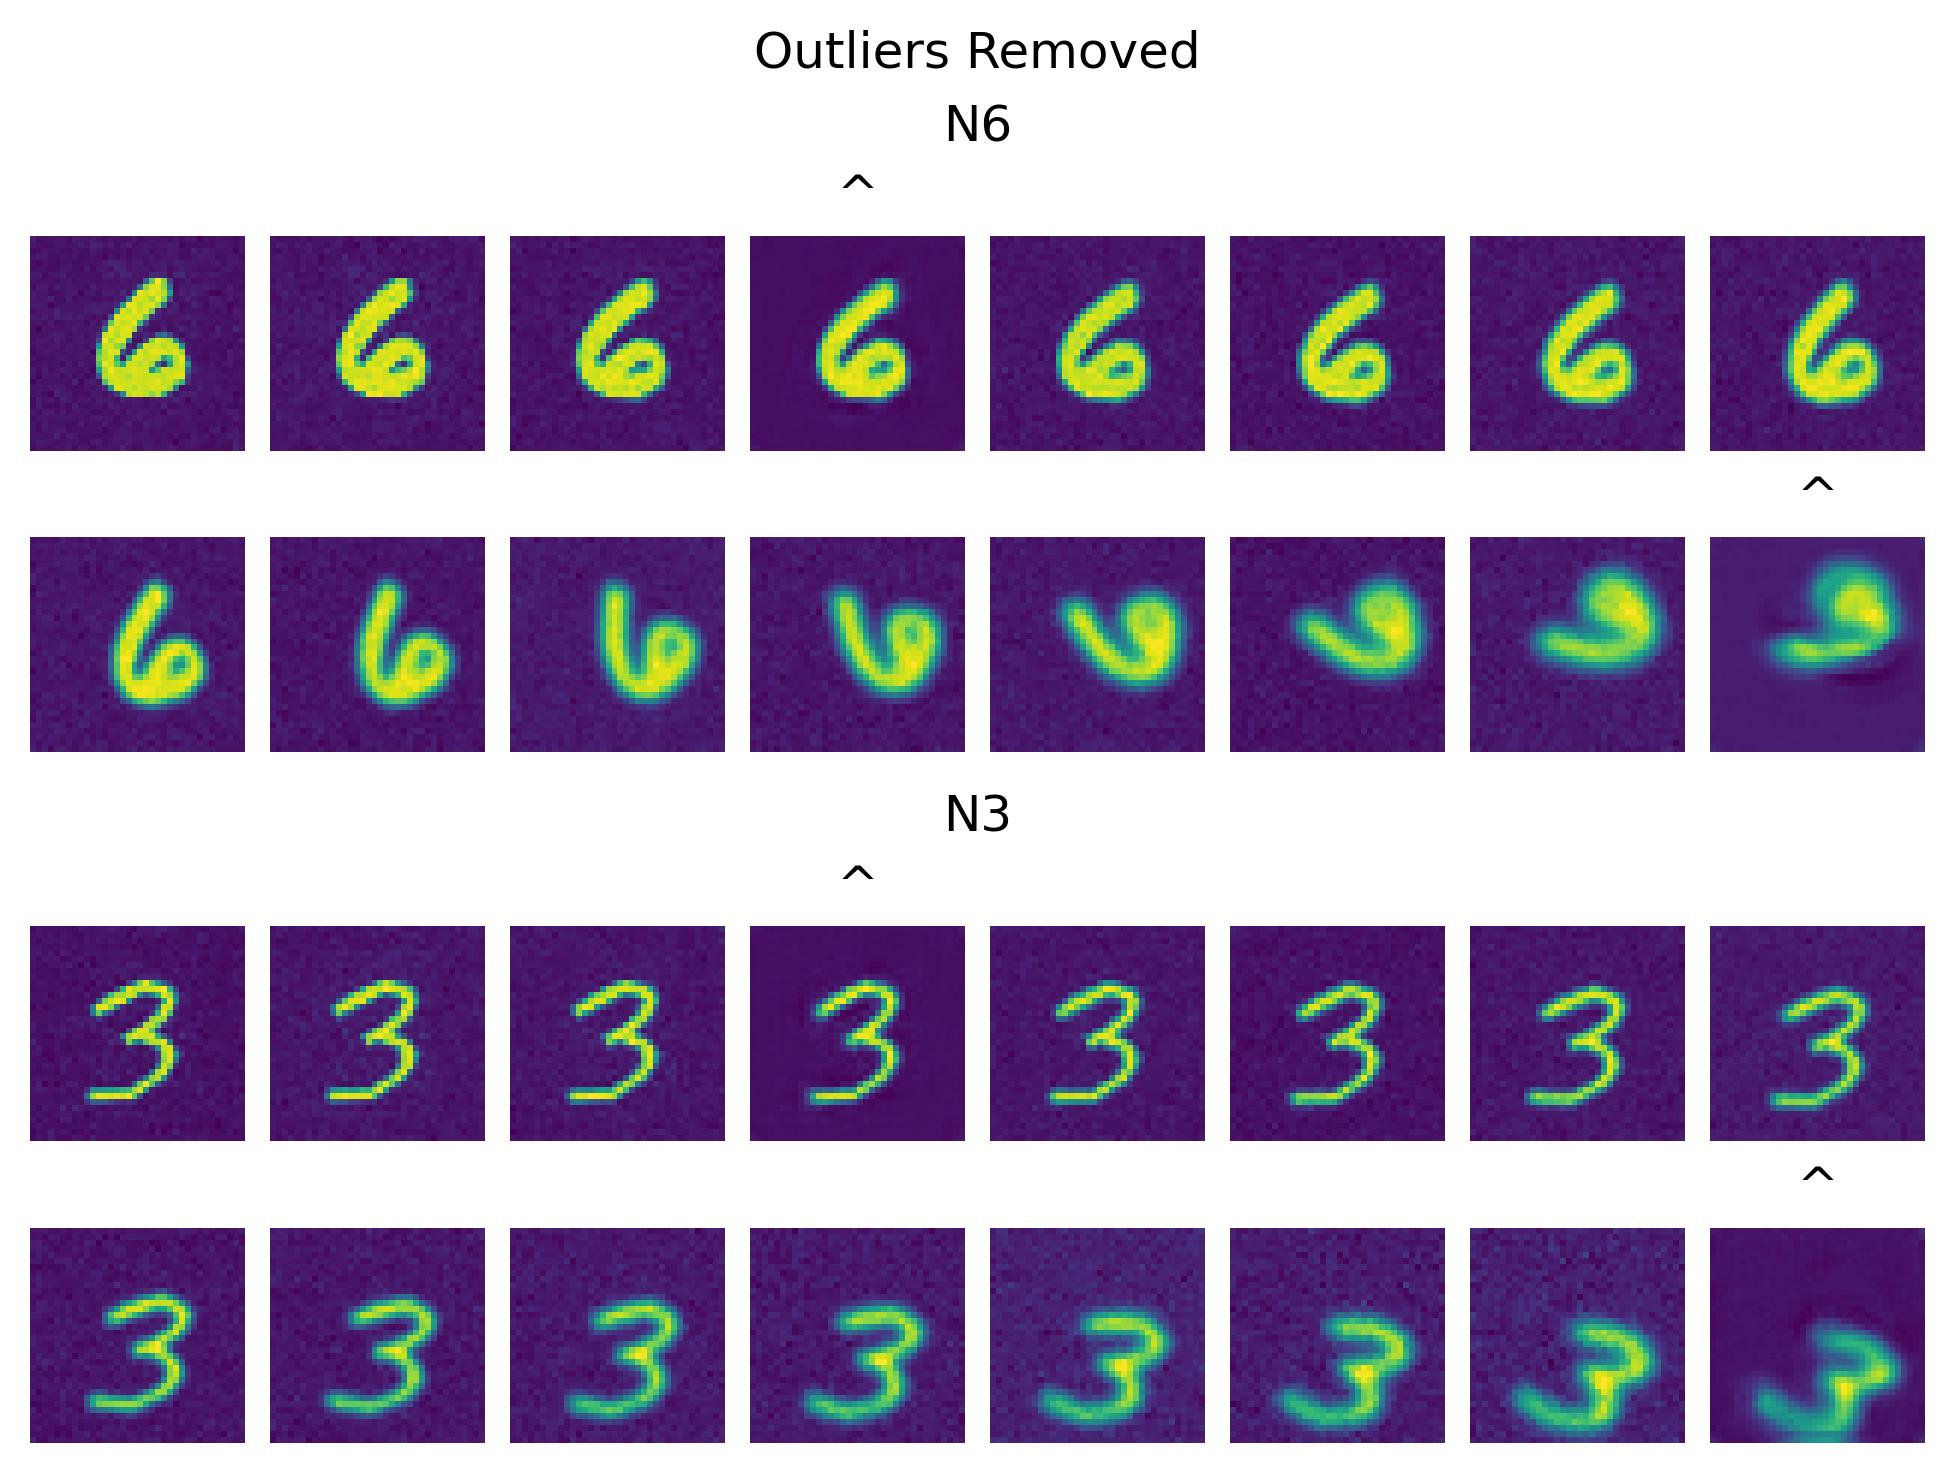

In [1564]:
plot_sequence(models["cleaned"]["best"], "Outliers Removed")

##### Fully Processed

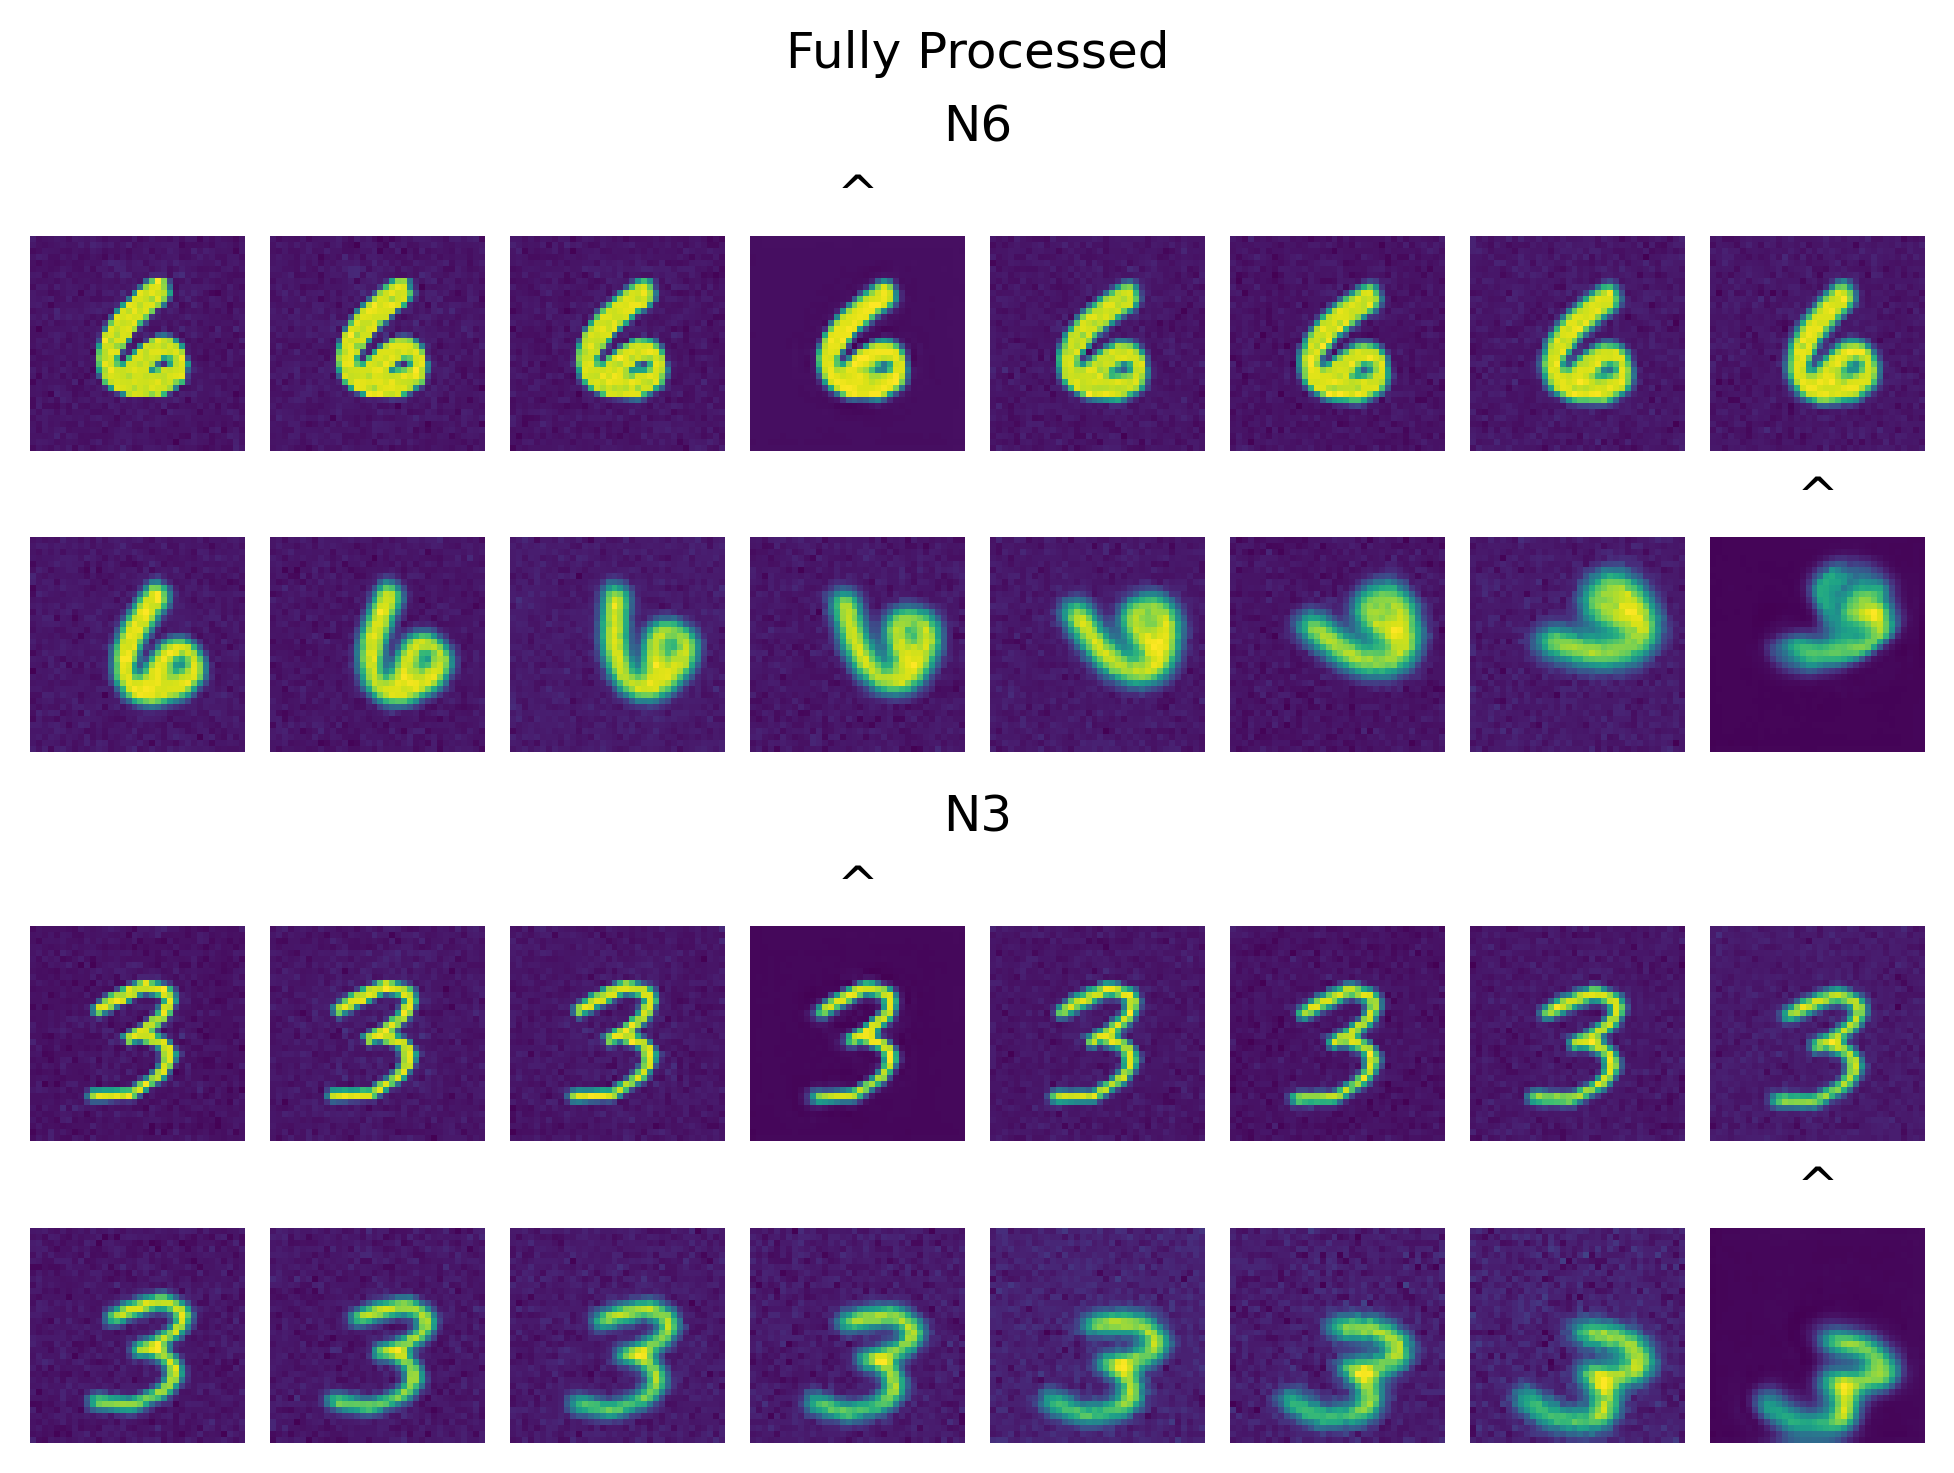

In [1565]:
plot_sequence(models["full"]["best"], "Fully Processed")

##### Overall Best

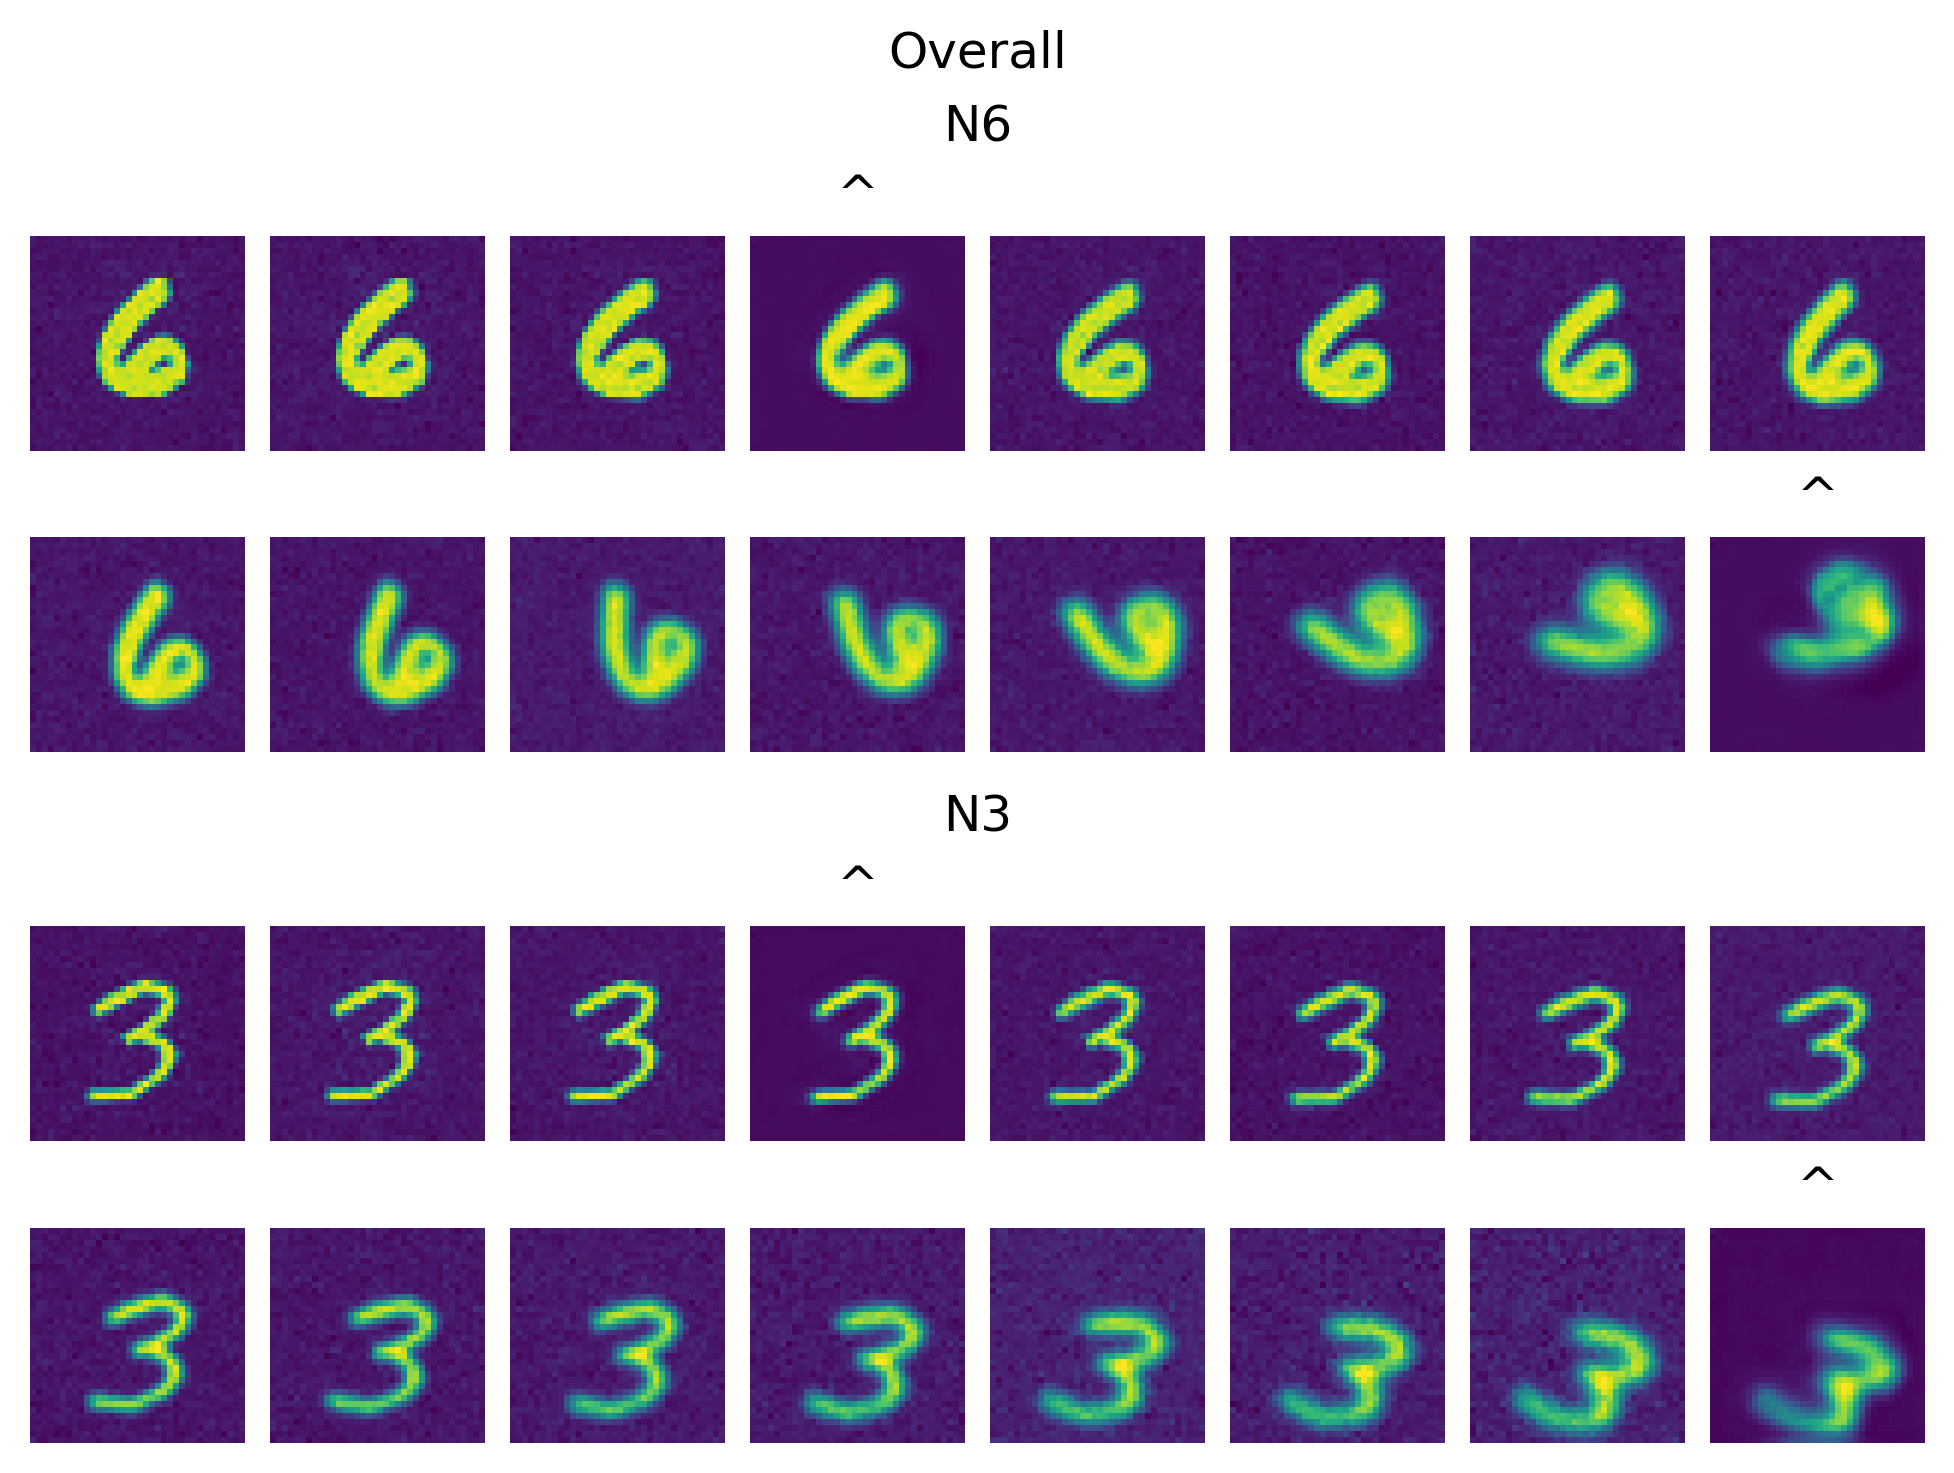

In [1566]:
plot_sequence(models["overall"]["best"], "Overall")

#### Worst Results

##### Base Dataset

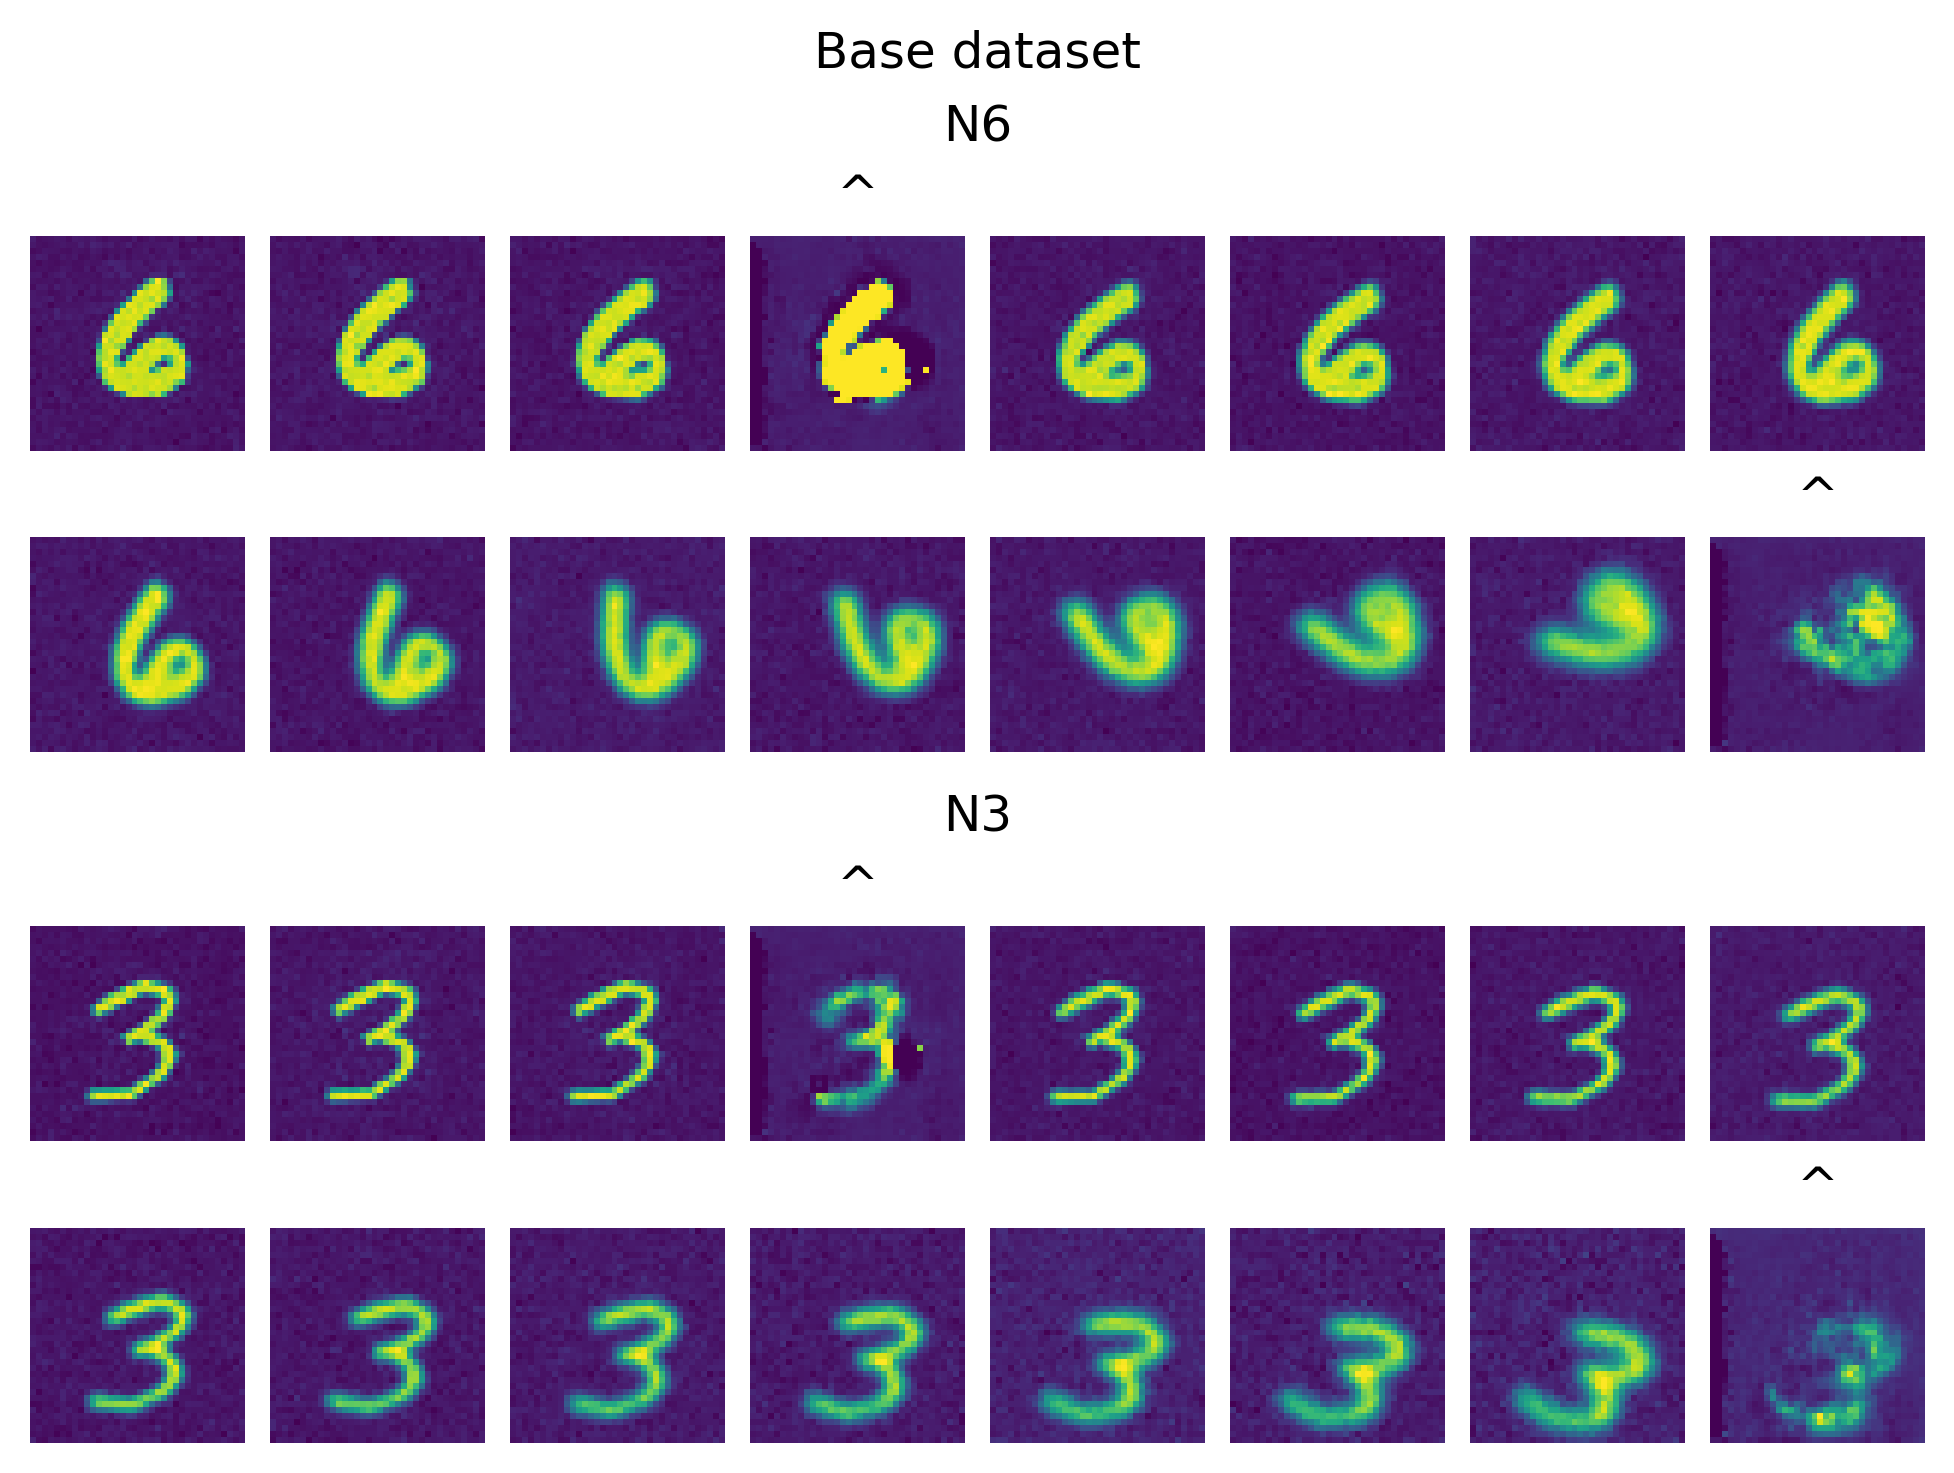

In [1567]:
plot_sequence(models["base"]["worst"], "Base dataset")

##### Denoised Dataset

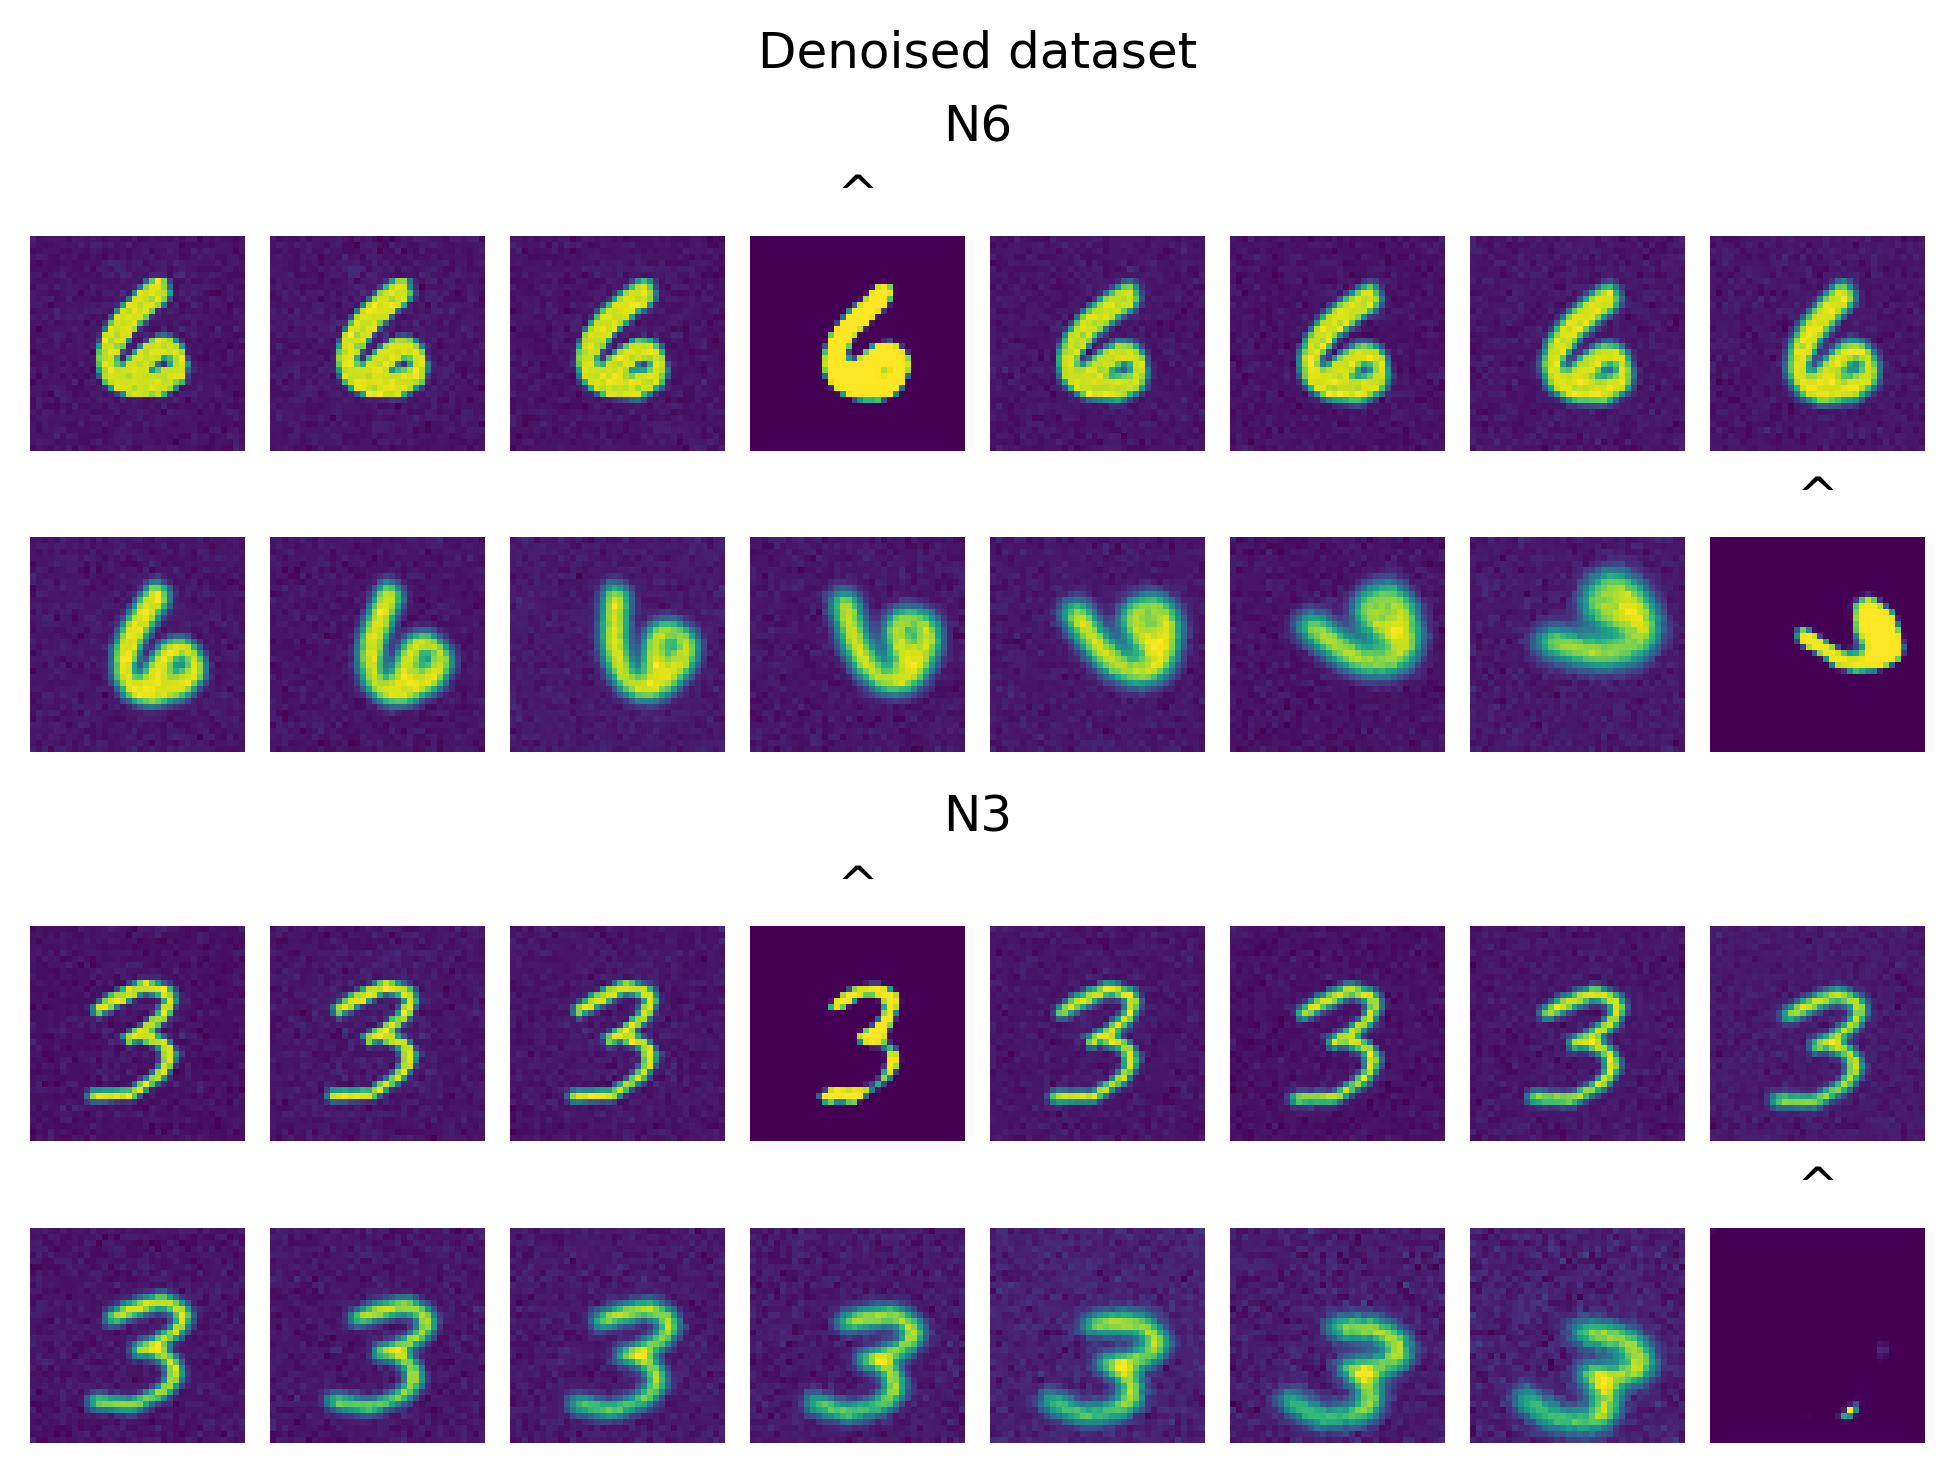

In [1568]:
plot_sequence(models["denoised"]["worst"], "Denoised dataset")

##### Cleaned Dataset

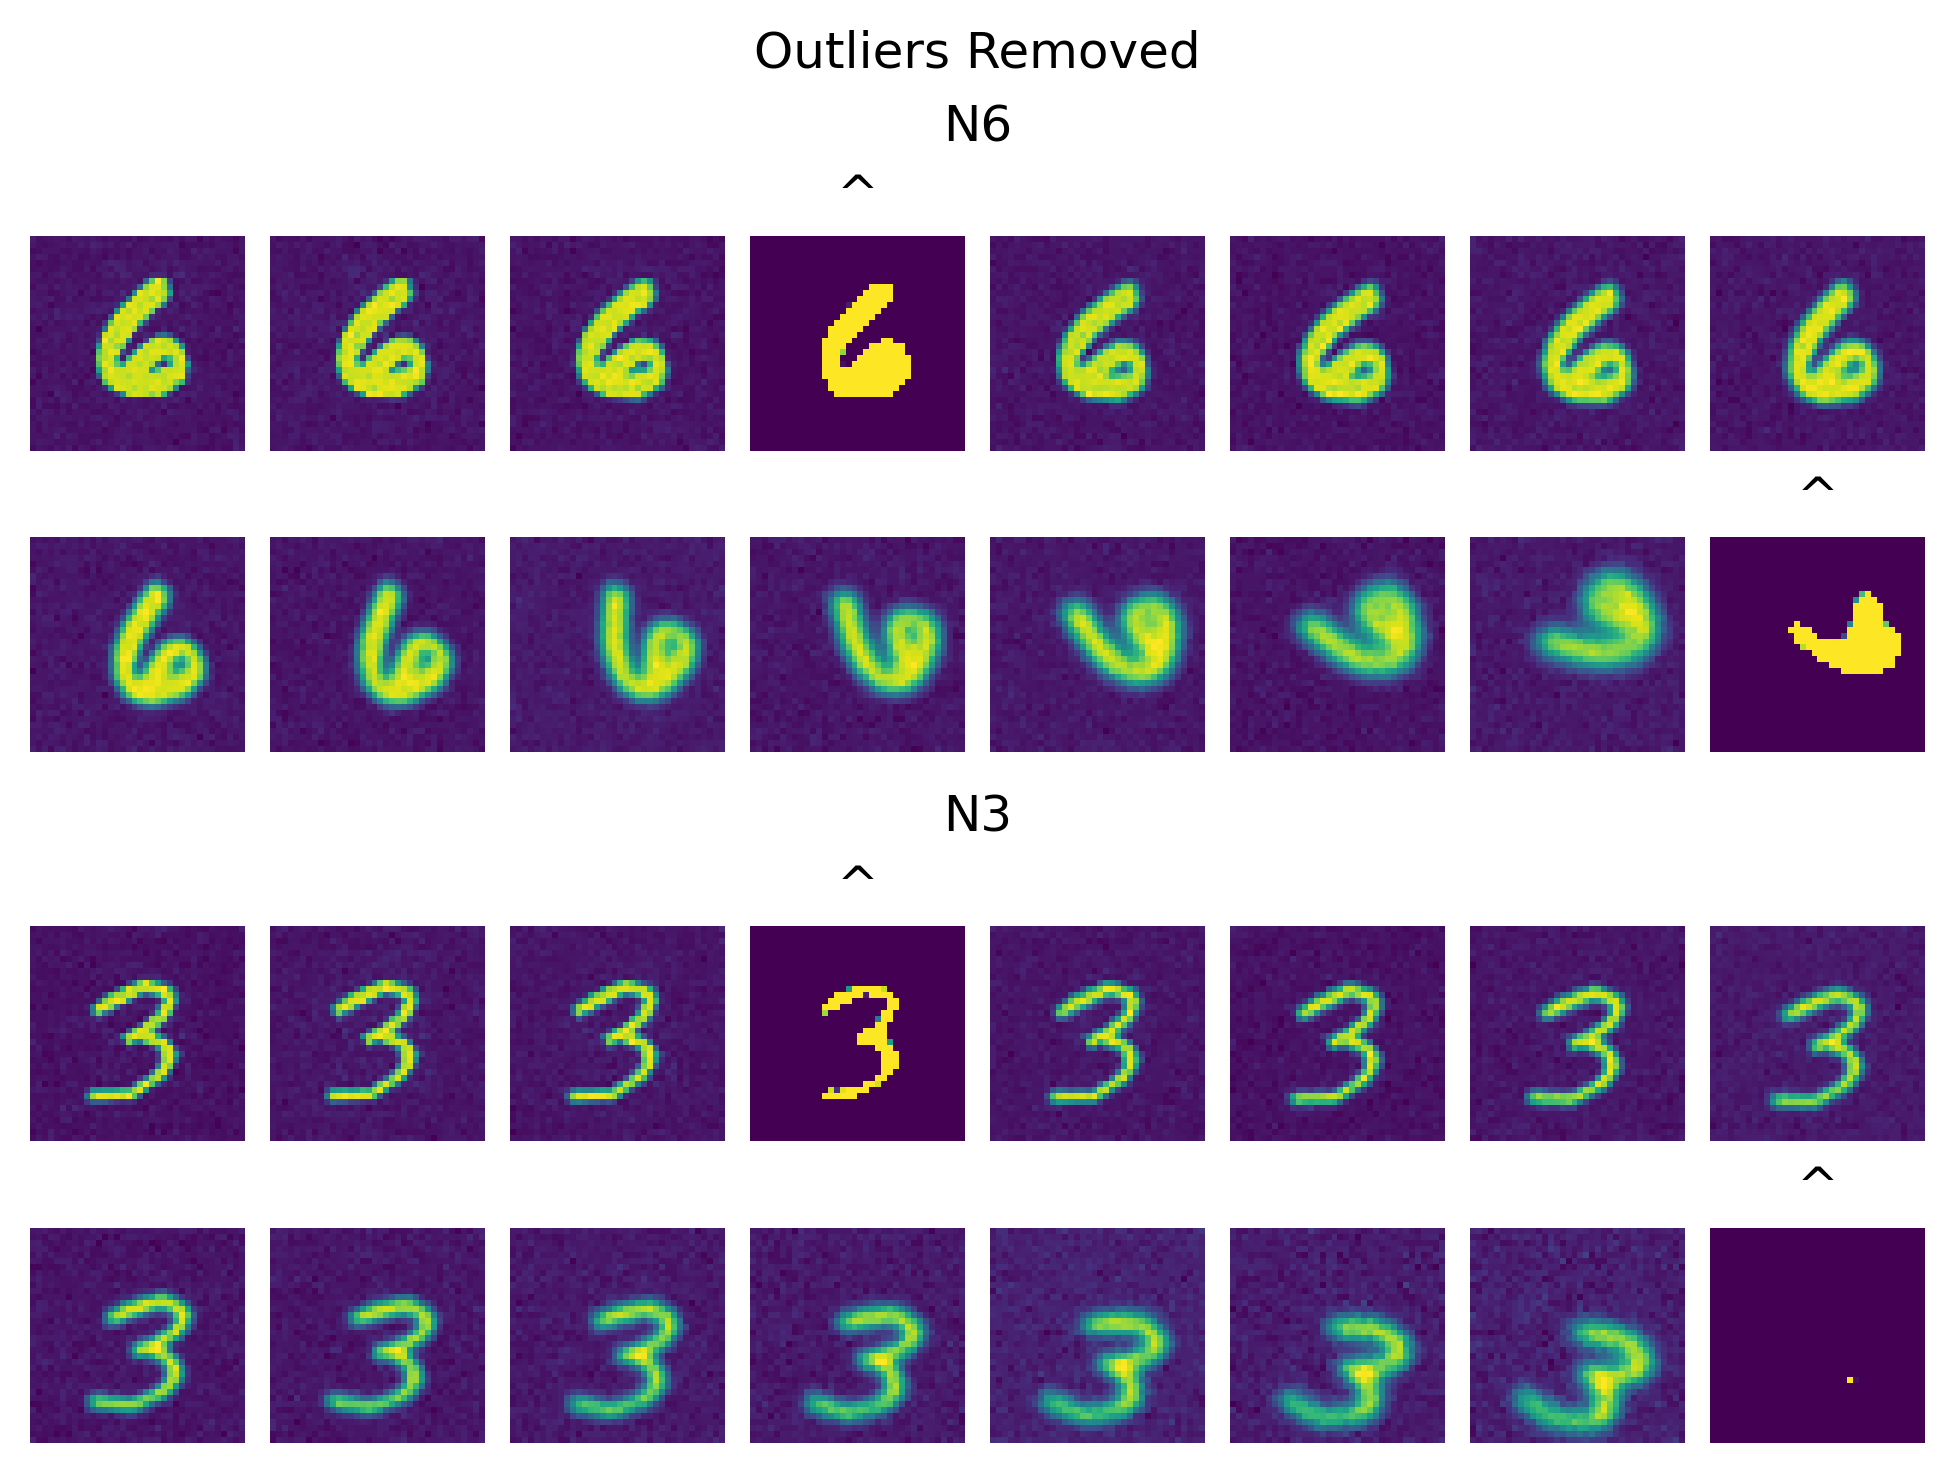

In [1569]:
plot_sequence(models["cleaned"]["worst"], "Outliers Removed")

##### Fully Processed

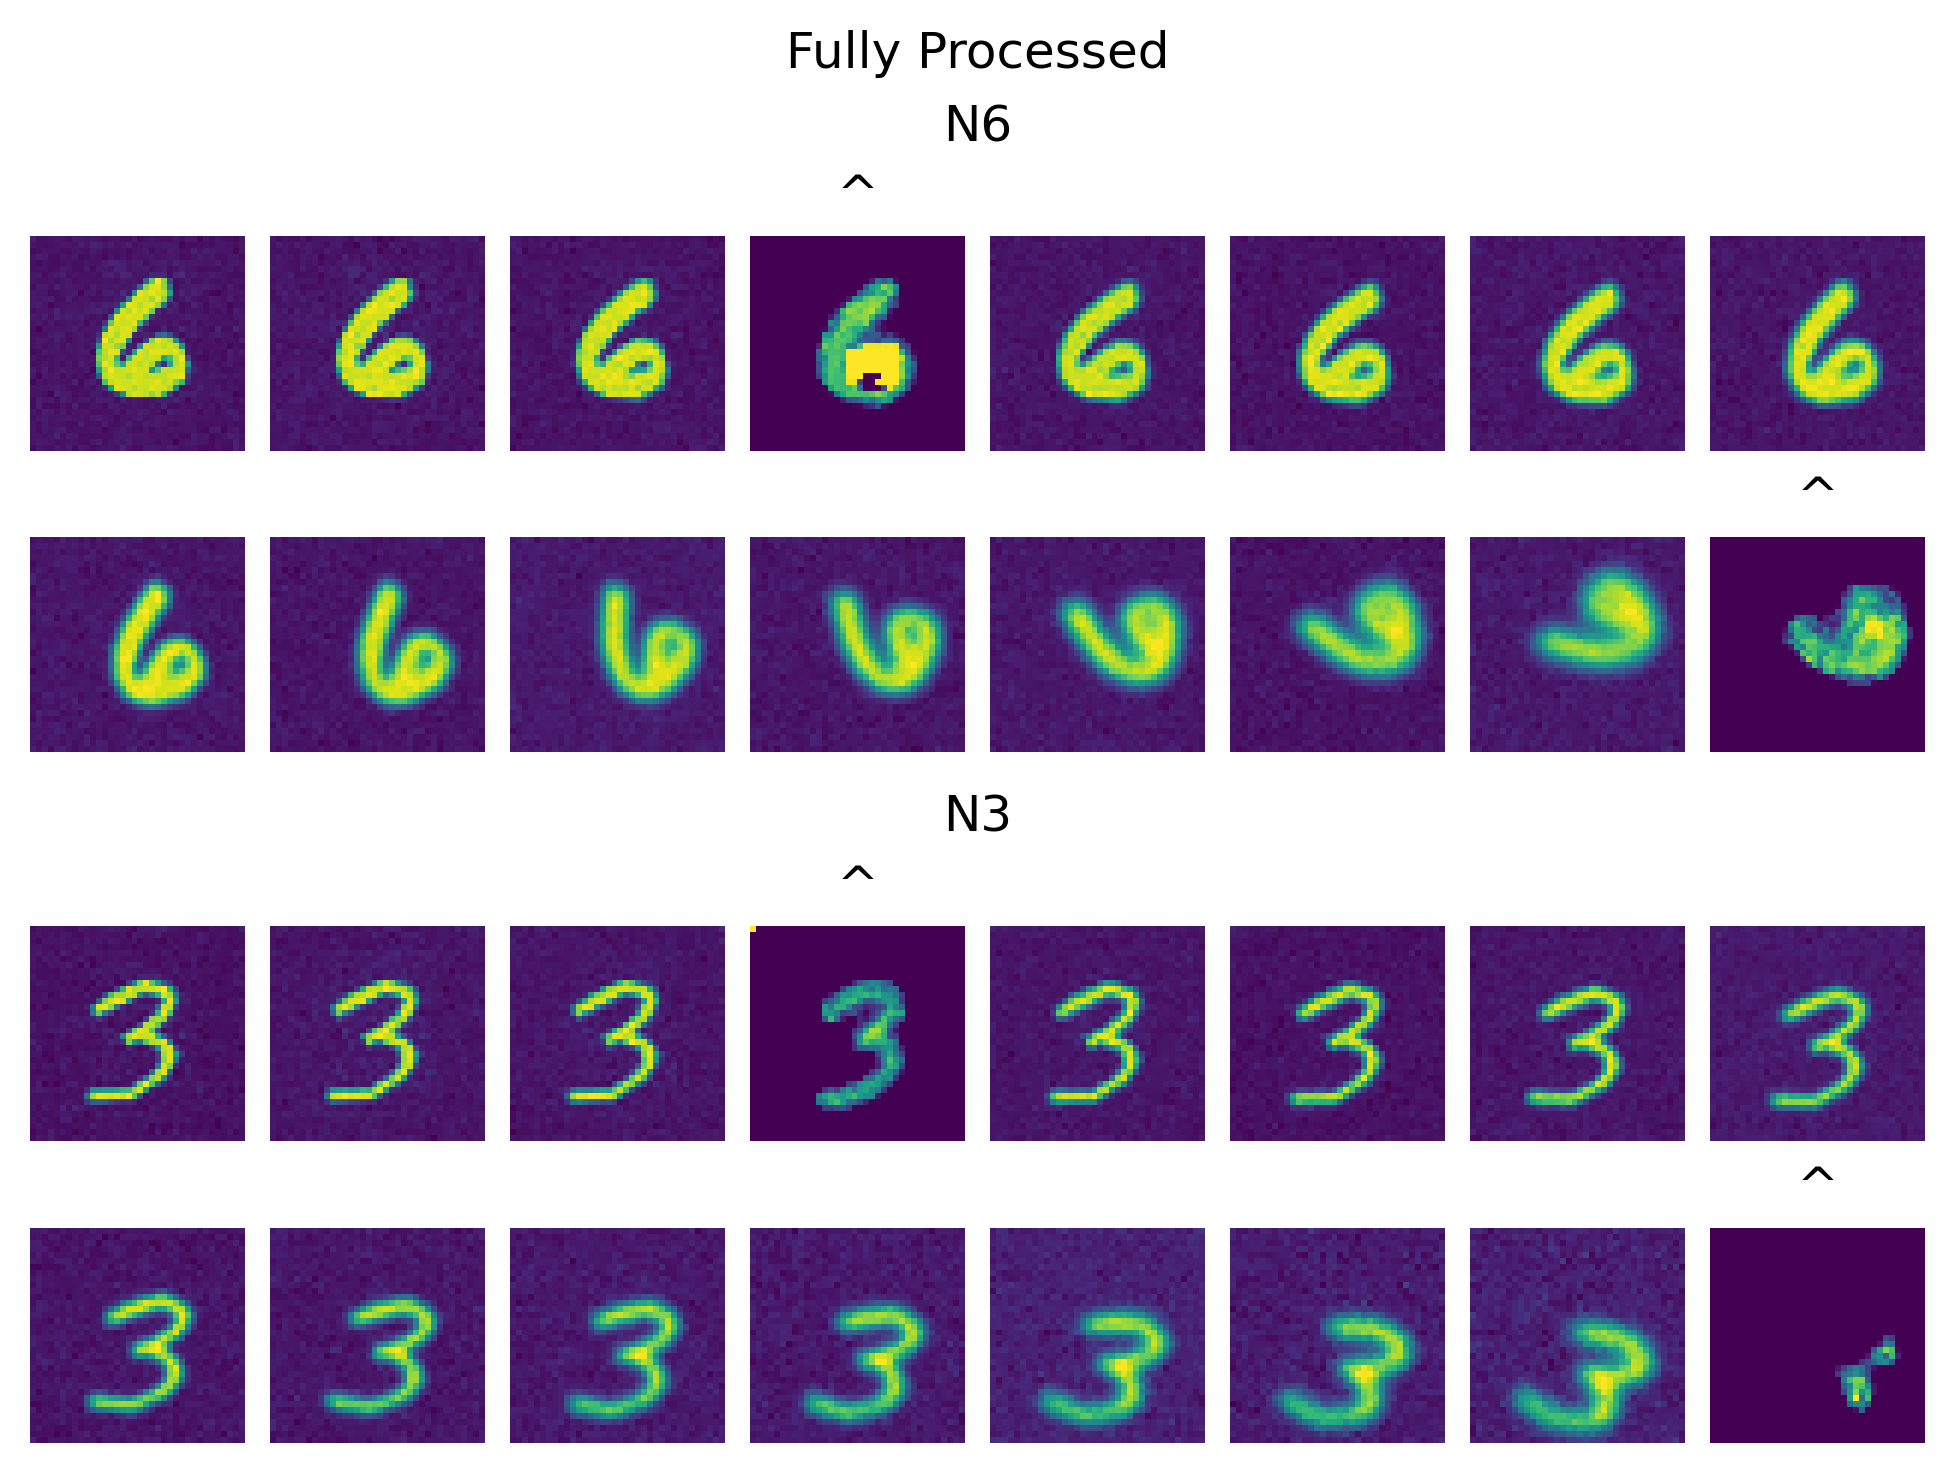

In [1570]:
plot_sequence(models["full"]["worst"], "Fully Processed")

##### Overall Worst

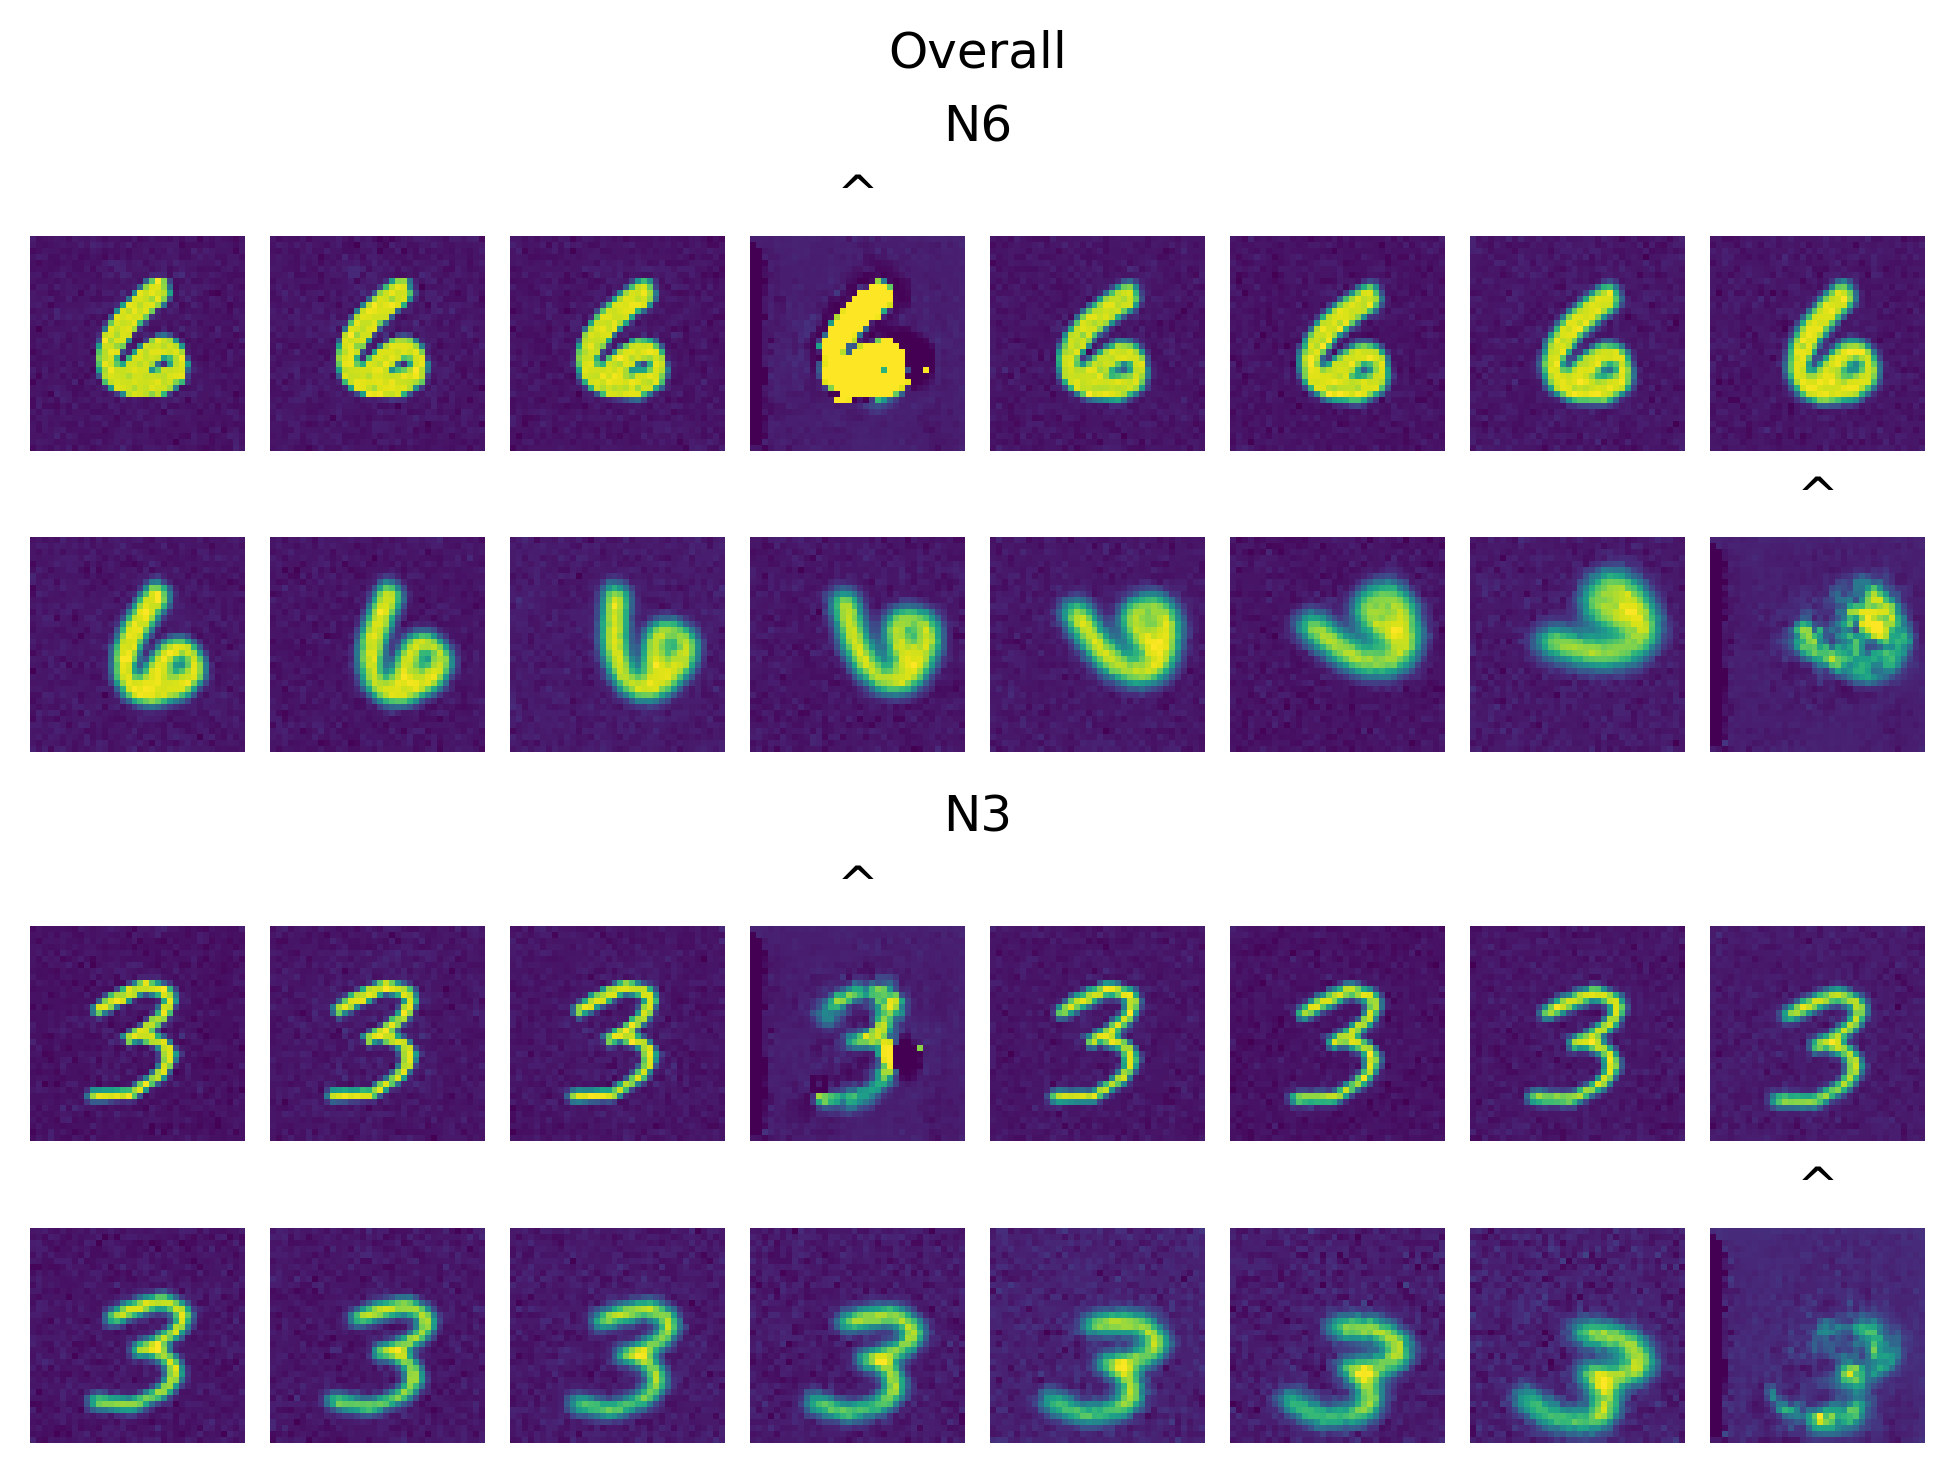

In [1571]:
plot_sequence(models["overall"]["worst"], "Overall")

# Center Of Mass

In [1572]:
from scipy.ndimage import center_of_mass

n6_sequence_com = np.zeros((400, 16, 2))
n3_sequence_com = np.zeros((100, 16, 2))

for i in range(400):
    for j in range(16):
        n6_sequence_com[i, j] = center_of_mass(n6[i, j].reshape(36, 36))
for i in range(100):
    for j in range(16):
        n3_sequence_com[i, j] = center_of_mass(n3[i, j].reshape(36, 36))

In [1573]:
def plot_com(model, n6_sequence_com, n3_sequence_com, title):
    mu_com_n6 = n6_sequence_com.mean(axis=(0, 2))
    std_com_n6 = n6_sequence_com.std(axis=(0, 2))
    mu_com_n3 = n3_sequence_com.mean(axis=(0, 2))
    std_com_n3 = n3_sequence_com.std(axis=(0, 2))

    n6_yhat = []
    n3_yhat = []

    for x in n6_x:
        n6_yhat.append(model(x.unsqueeze(0)).cpu().detach())

    for x in n3_x:
        n3_yhat.append(model(x.unsqueeze(0)).cpu().detach())

    n6_yhat = np.array(n6_yhat).reshape(400, 2, 36, 36, 1)
    n3_yhat = np.array(n3_yhat).reshape(100, 2, 36, 36, 1)

    predicted_n6 = n6.copy()
    predicted_n3 = n3.copy()

    predicted_n6[:, [3, 15]] = n6_yhat
    predicted_n3[:, [3, 15]] = n3_yhat

    n6_sequence_com_hat = np.zeros((400, 16, 2))
    n3_sequence_com_hat = np.zeros((100, 16, 2))

    for i in range(400):
        for j in range(16):
            n6_sequence_com_hat[i, j] = center_of_mass(
                predicted_n6[i, j].reshape(36, 36)
            )
    for i in range(100):
        for j in range(16):
            n3_sequence_com_hat[i, j] = center_of_mass(
                predicted_n3[i, j].reshape(36, 36)
            )

    mu_com_n6_hat = n6_sequence_com_hat.mean(axis=(0, 2))
    std_com_n6_hat = n6_sequence_com_hat.std(axis=(0, 2))
    mu_com_n3_hat = n3_sequence_com_hat.mean(axis=(0, 2))
    std_com_n3_hat = n3_sequence_com_hat.std(axis=(0, 2))
    fig, ax = plt.subplots(1, 2, dpi=300, sharex=True, sharey=True)
    fig.suptitle(title)
    ax[0].title.set_text("N6 Dataset")
    ax[0].vlines(
        3,
        min(np.min(mu_com_n6_hat - std_com_n6_hat), np.min(mu_com_n6 - std_com_n6)),
        max(np.max(mu_com_n6_hat + std_com_n6_hat), np.max(mu_com_n6 + std_com_n6)),
        color="gray",
        linestyle="--",
    )
    ax[0].vlines(
        15,
        min(np.min(mu_com_n6_hat - std_com_n6_hat), np.min(mu_com_n6 - std_com_n6)),
        max(np.max(mu_com_n6_hat + std_com_n6_hat), np.max(mu_com_n6 + std_com_n6)),
        color="gray",
        linestyle="--",
    )
    ax[0].plot(np.arange(0, 16), mu_com_n6_hat, label="Predicted")
    ax[0].fill_between(
        np.arange(0, 16),
        mu_com_n6_hat - std_com_n6_hat,
        mu_com_n6_hat + std_com_n6_hat,
        alpha=0.5,
    )
    ax[0].plot(np.arange(0, 16), mu_com_n6, label="Actual")
    ax[0].fill_between(
        np.arange(0, 16), mu_com_n6 - std_com_n6, mu_com_n6 + std_com_n6, alpha=0.5
    )
    ax[1].title.set_text("N3 Dataset")
    ax[1].vlines(
        3,
        min(np.min(mu_com_n6_hat - std_com_n6_hat), np.min(mu_com_n6 - std_com_n6)),
        max(np.max(mu_com_n6_hat + std_com_n6_hat), np.max(mu_com_n6 + std_com_n6)),
        color="gray",
        linestyle="--",
    )
    ax[1].vlines(
        15,
        min(np.min(mu_com_n6_hat - std_com_n6_hat), np.min(mu_com_n6 - std_com_n6)),
        max(np.max(mu_com_n6_hat + std_com_n6_hat), np.max(mu_com_n6 + std_com_n6)),
        color="gray",
        linestyle="--",
        label="Test Image",
    )
    ax[1].plot(np.arange(0, 16), mu_com_n3_hat, label="Predicted")
    ax[1].fill_between(
        np.arange(0, 16),
        mu_com_n3_hat - std_com_n3_hat,
        mu_com_n3_hat + std_com_n3_hat,
        alpha=0.5,
    )
    ax[1].plot(np.arange(0, 16), mu_com_n3, label="Actual")
    ax[1].fill_between(
        np.arange(0, 16), mu_com_n3 - std_com_n3, mu_com_n3 + std_com_n3, alpha=0.5
    )
    ax[1].legend()

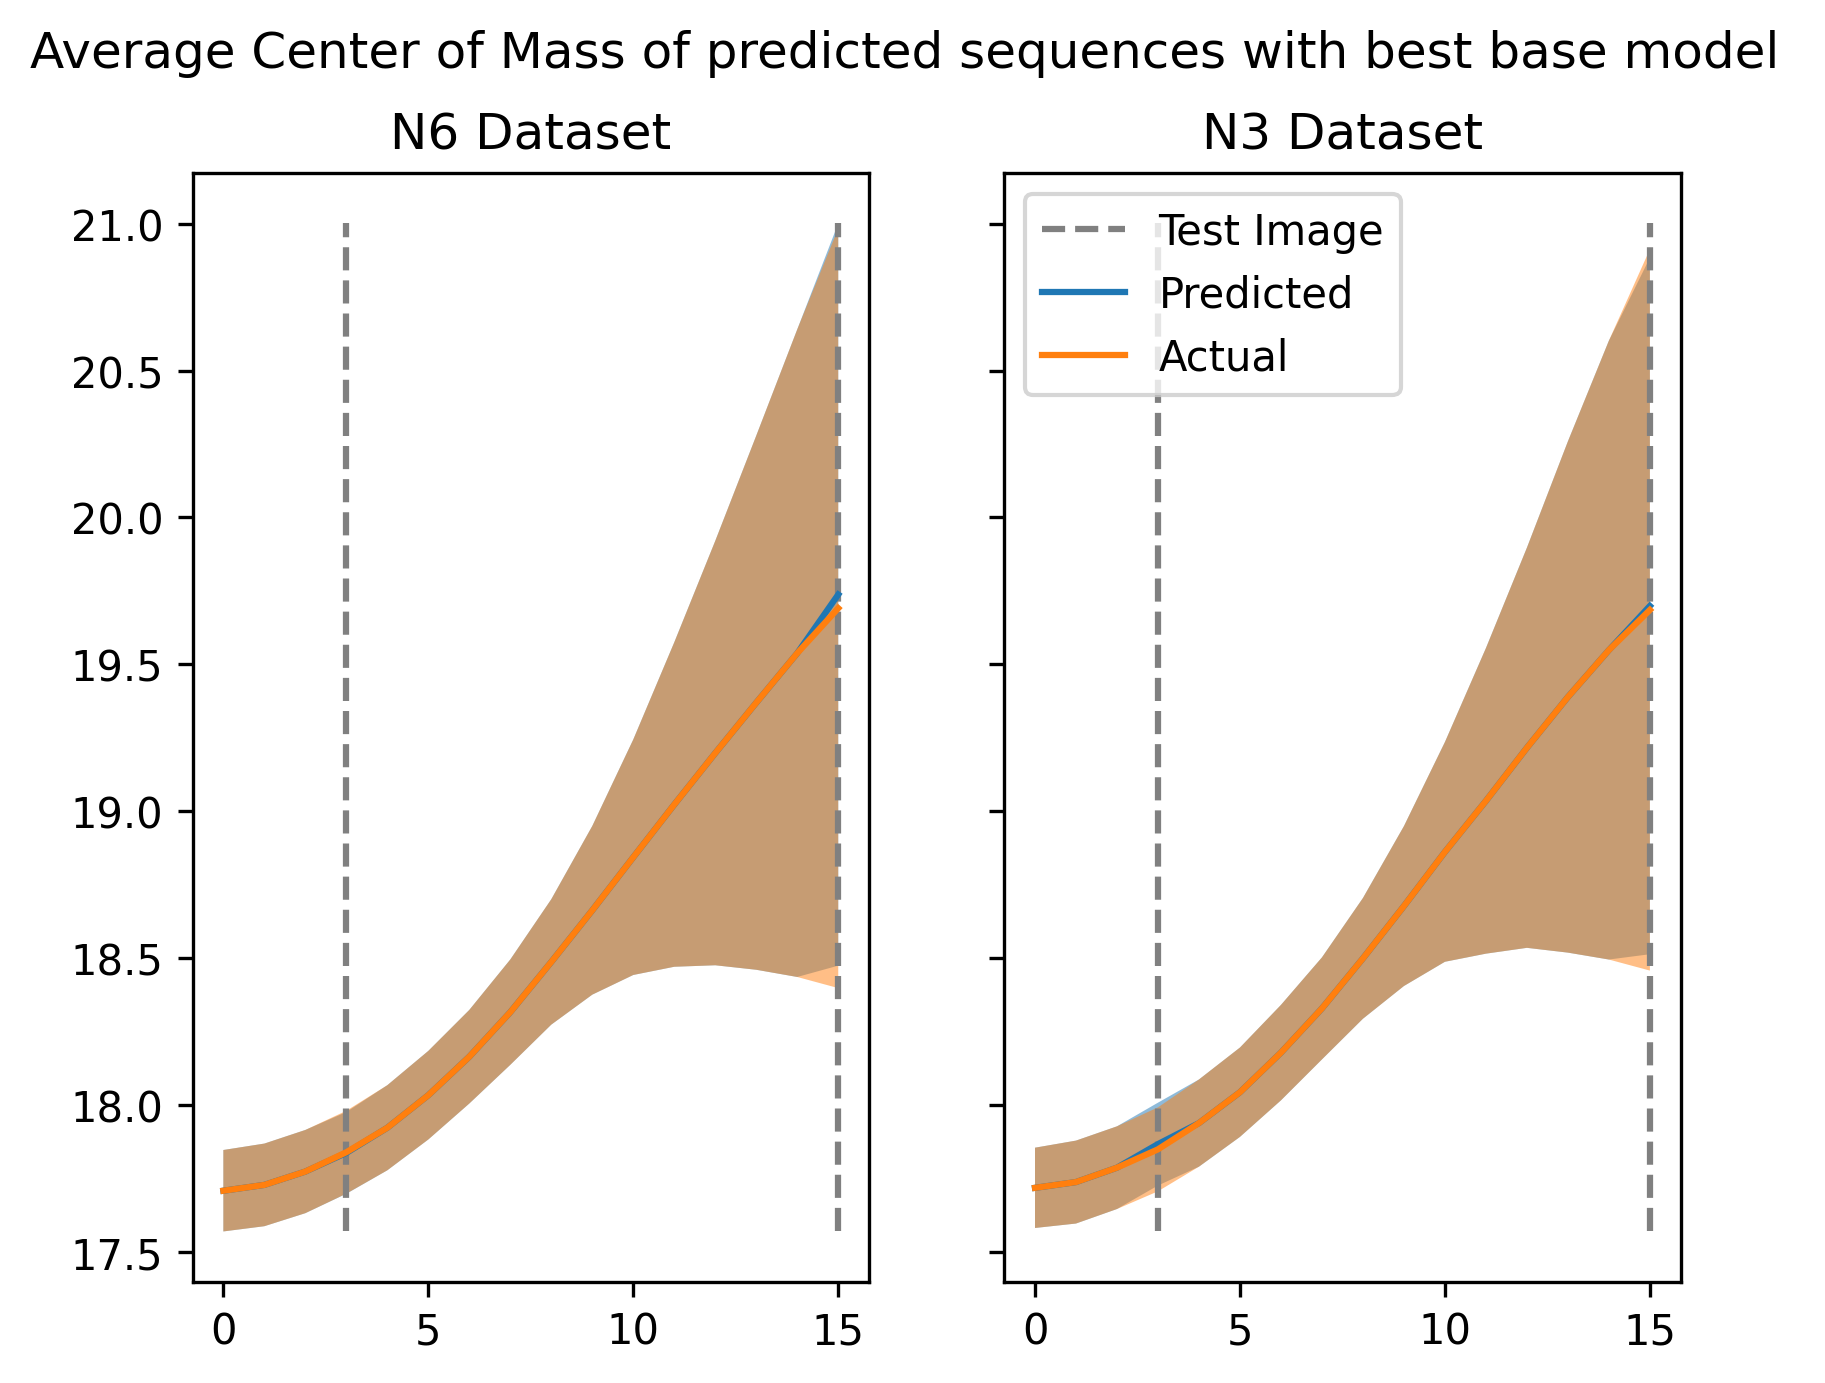

In [1574]:
plot_com(
    models["base"]["best"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with best base model ",
)

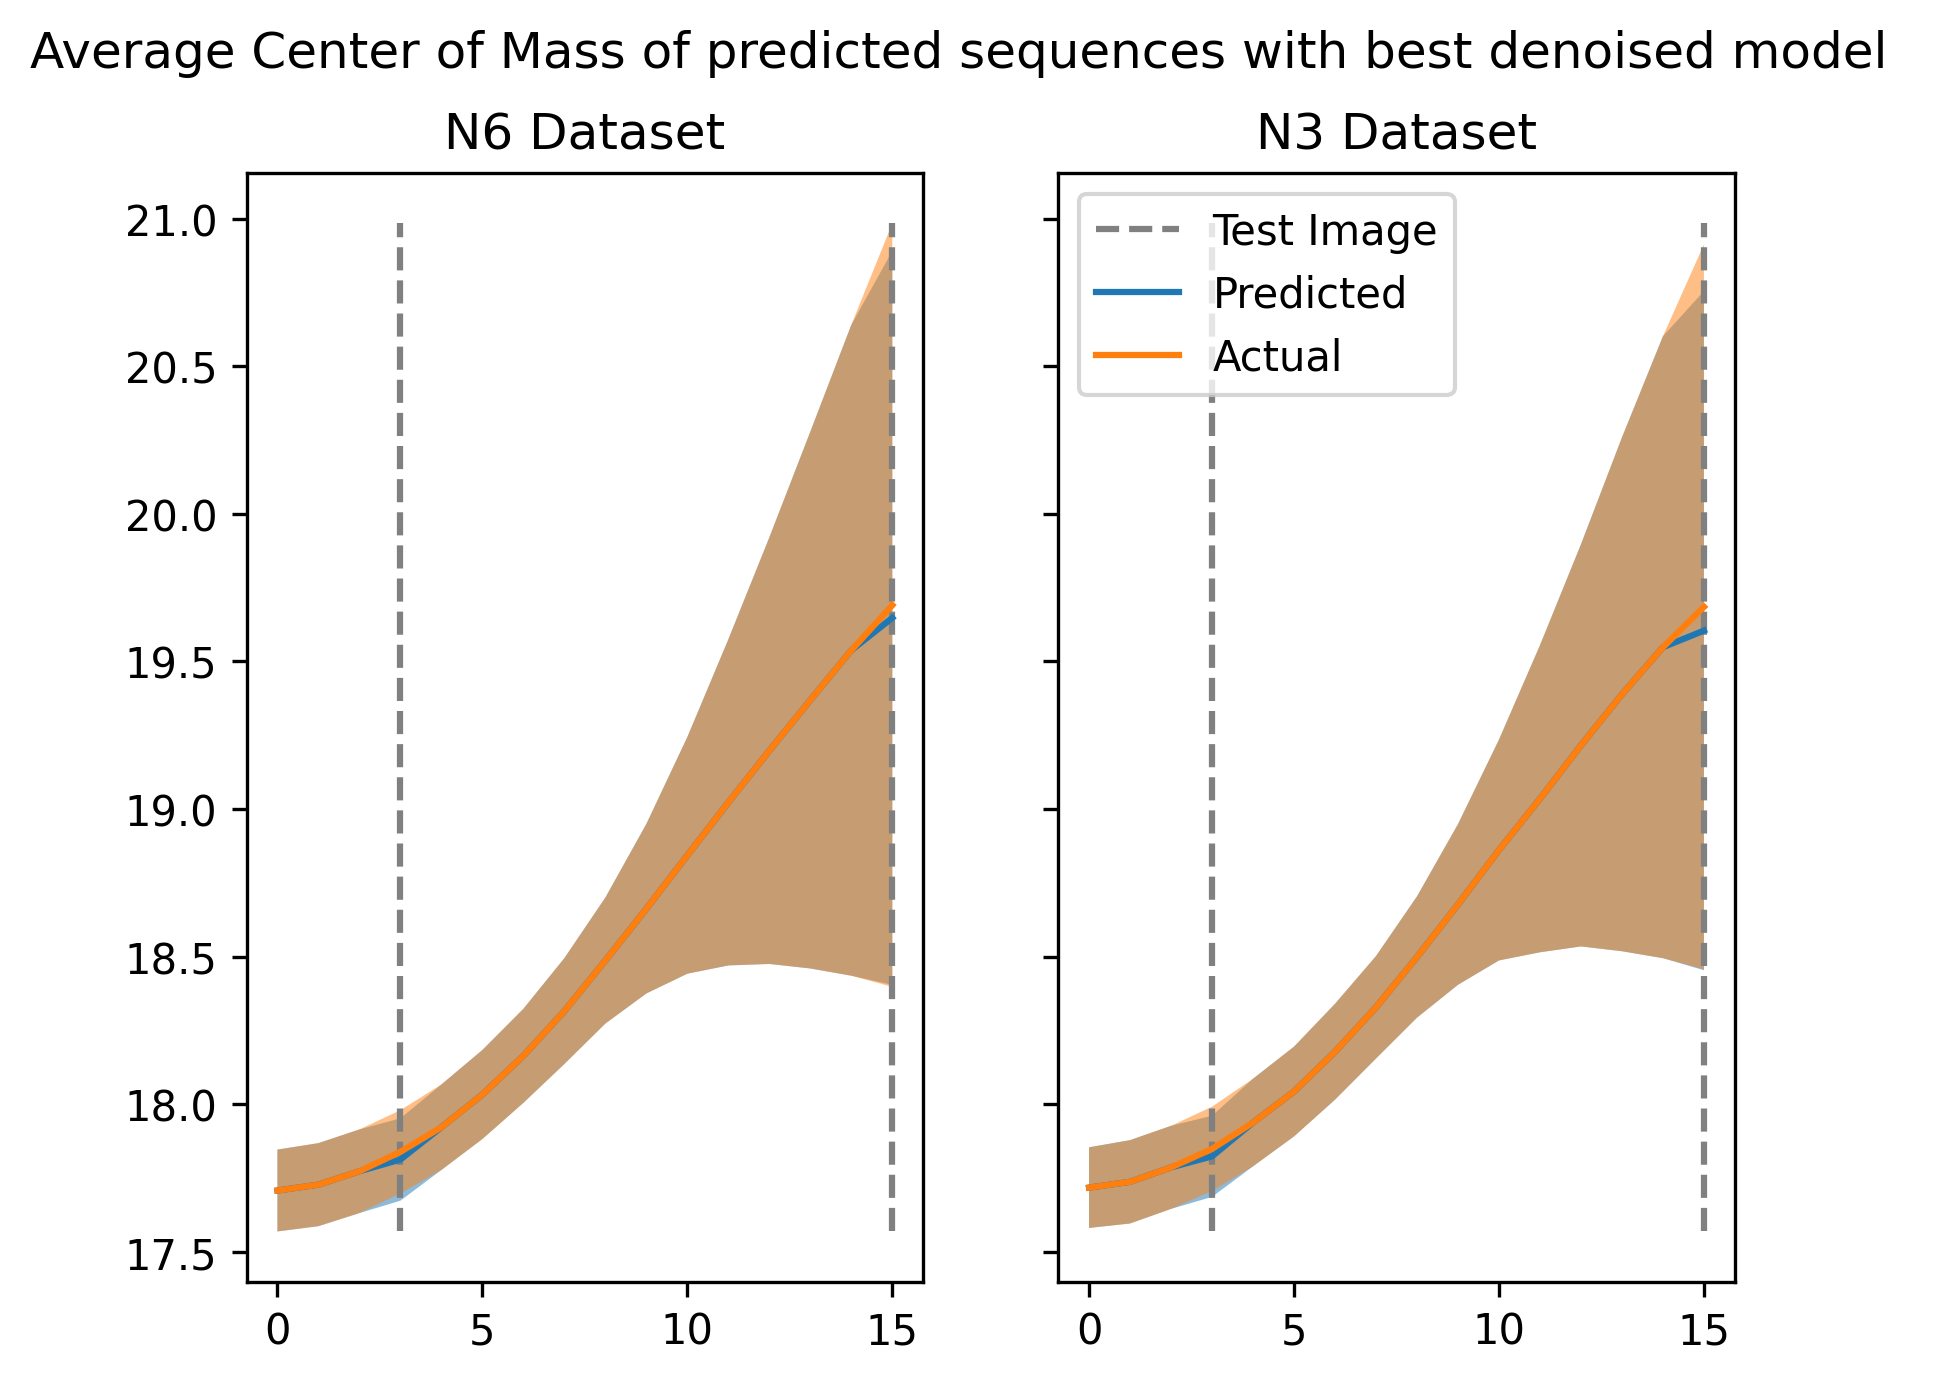

In [1575]:
plot_com(
    models["denoised"]["best"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with best denoised model ",
)

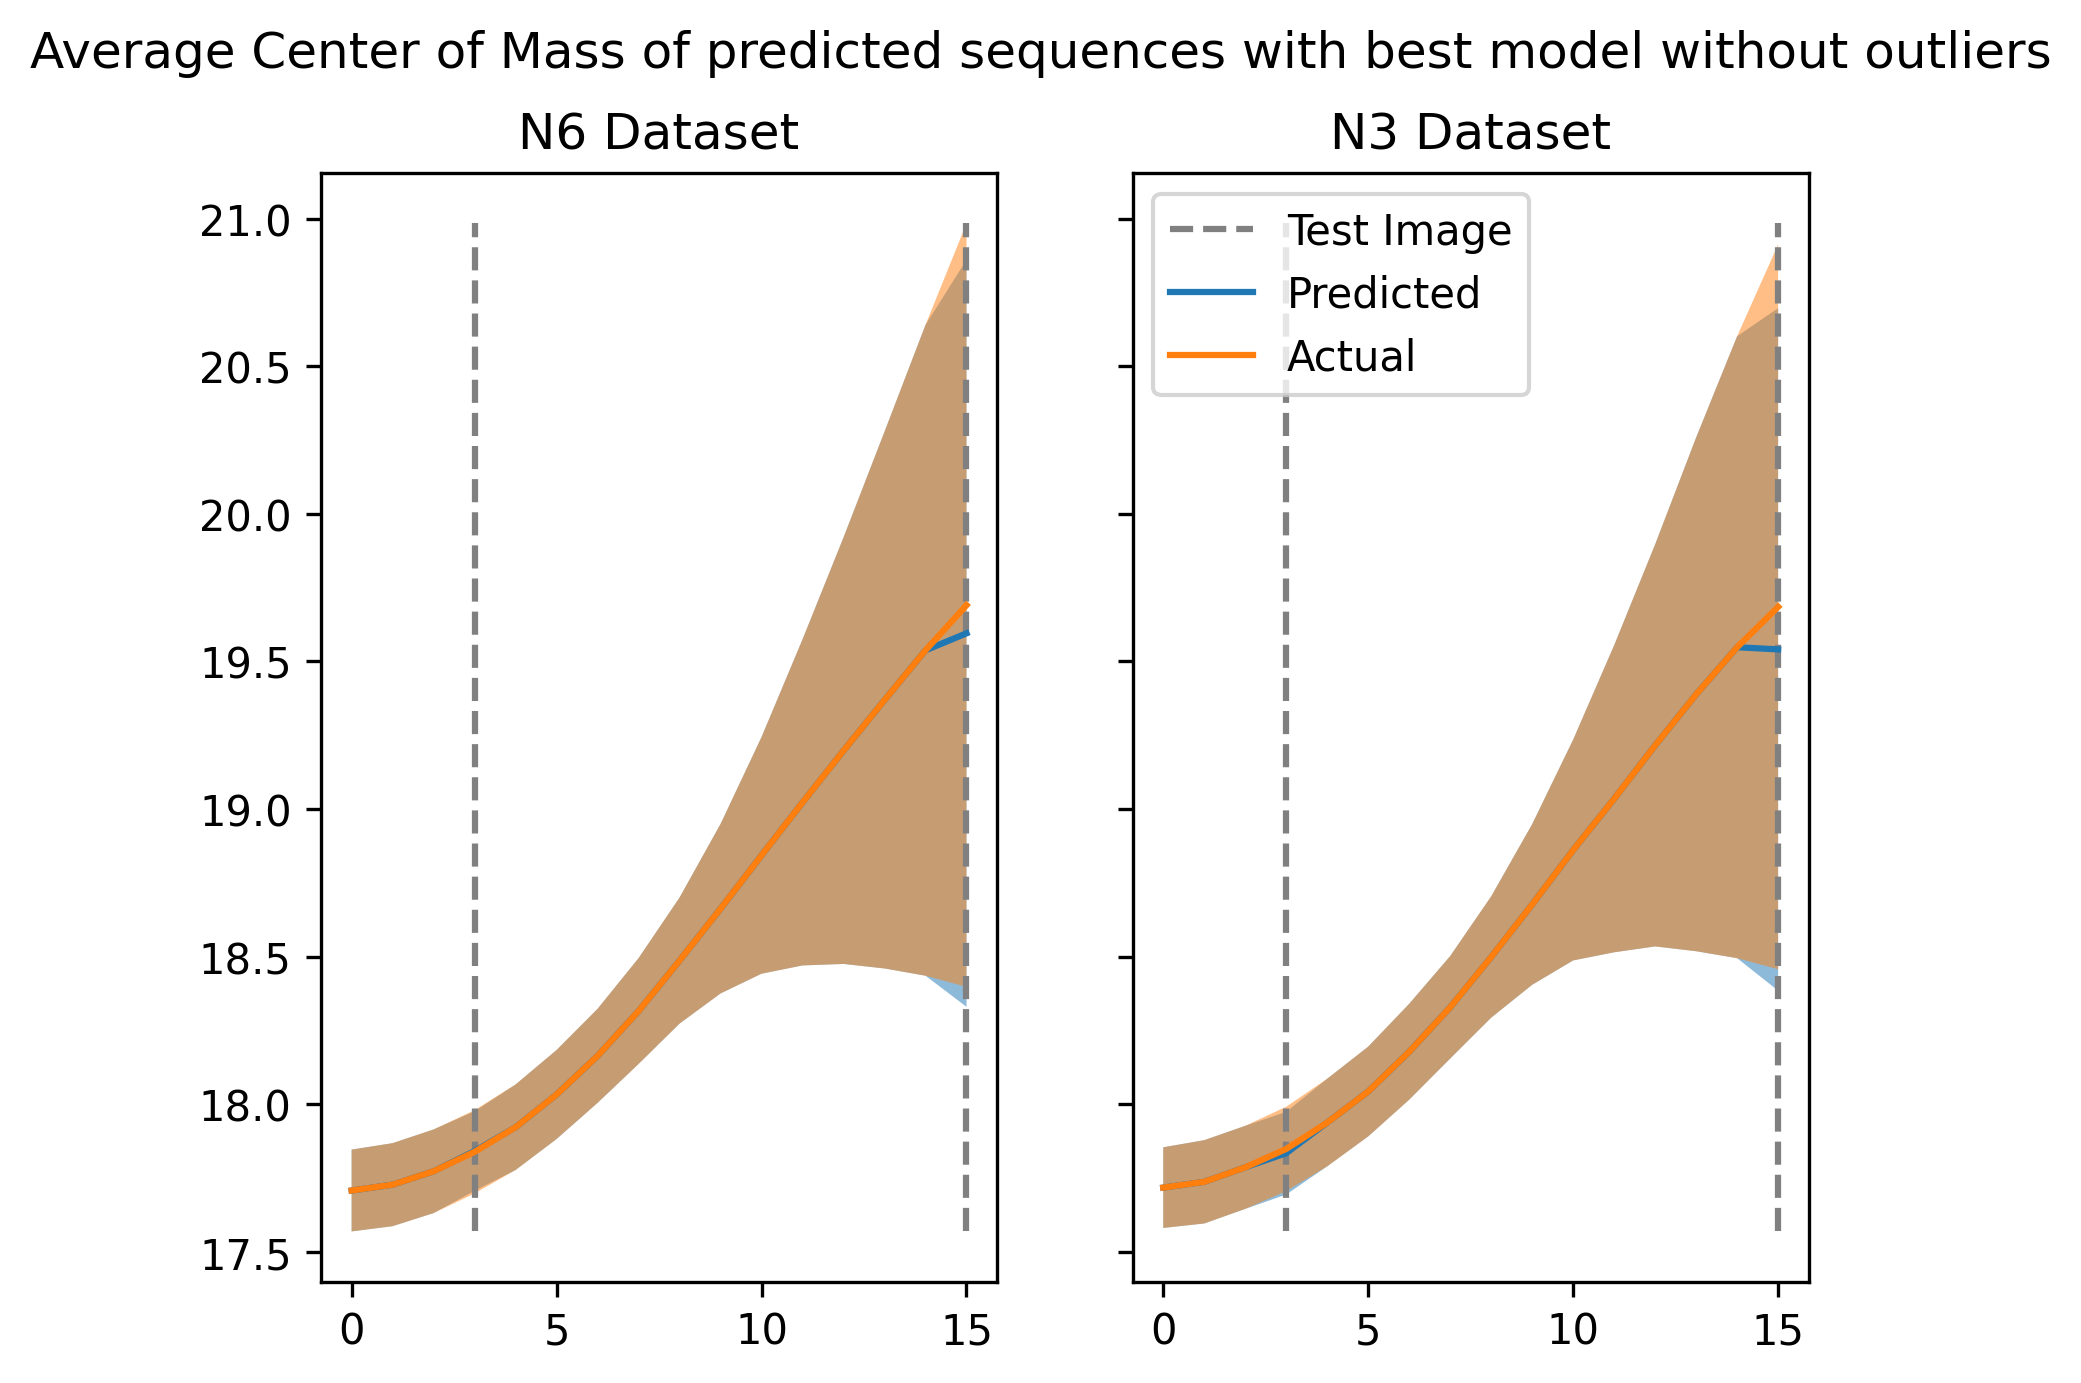

In [1576]:
plot_com(
    models["cleaned"]["best"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with best model without outliers",
)

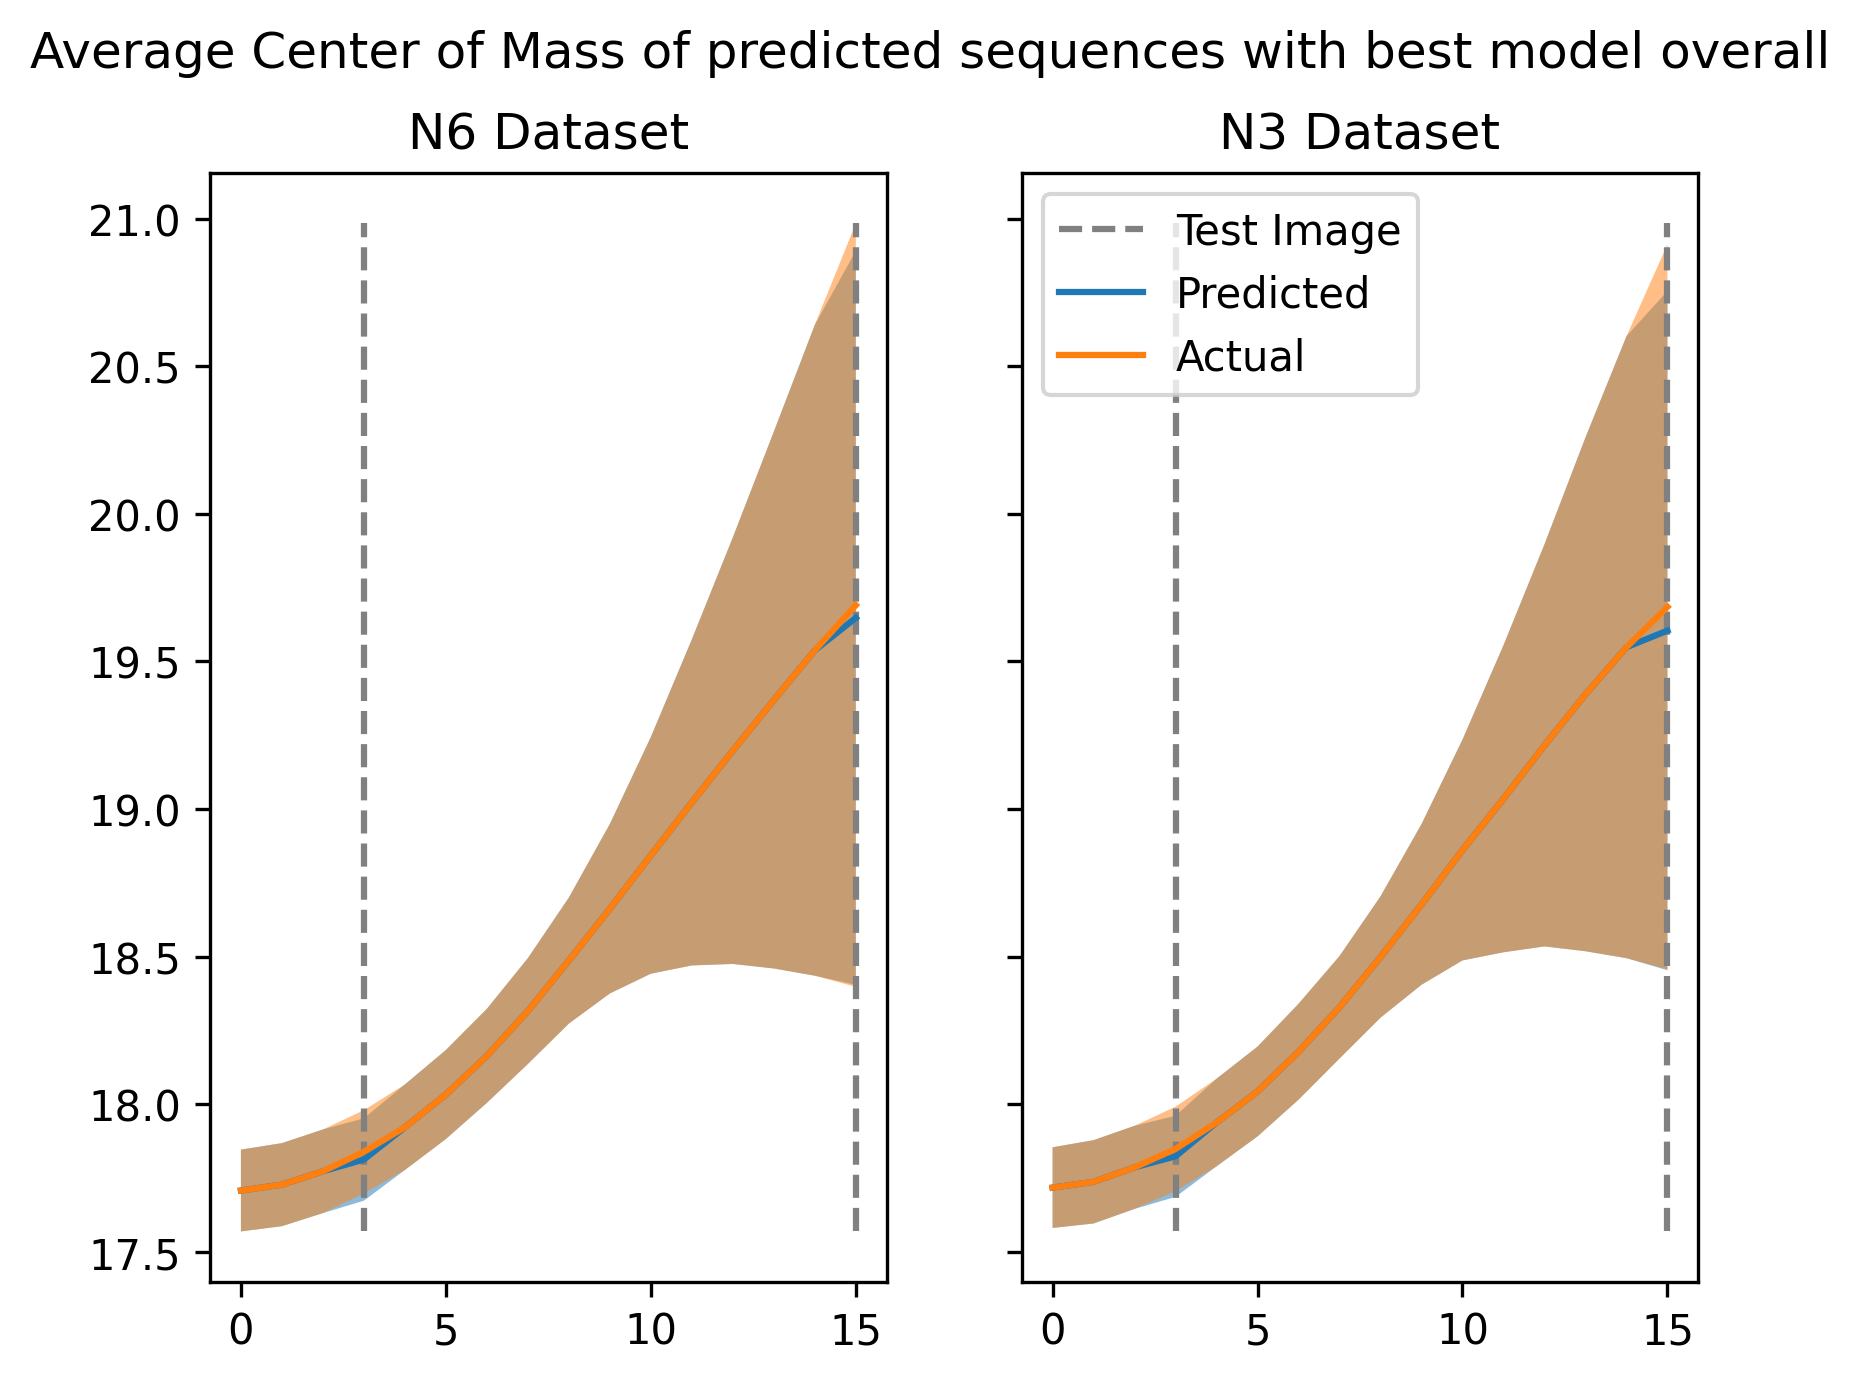

In [1577]:
plot_com(
    models["overall"]["best"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with best model overall",
)

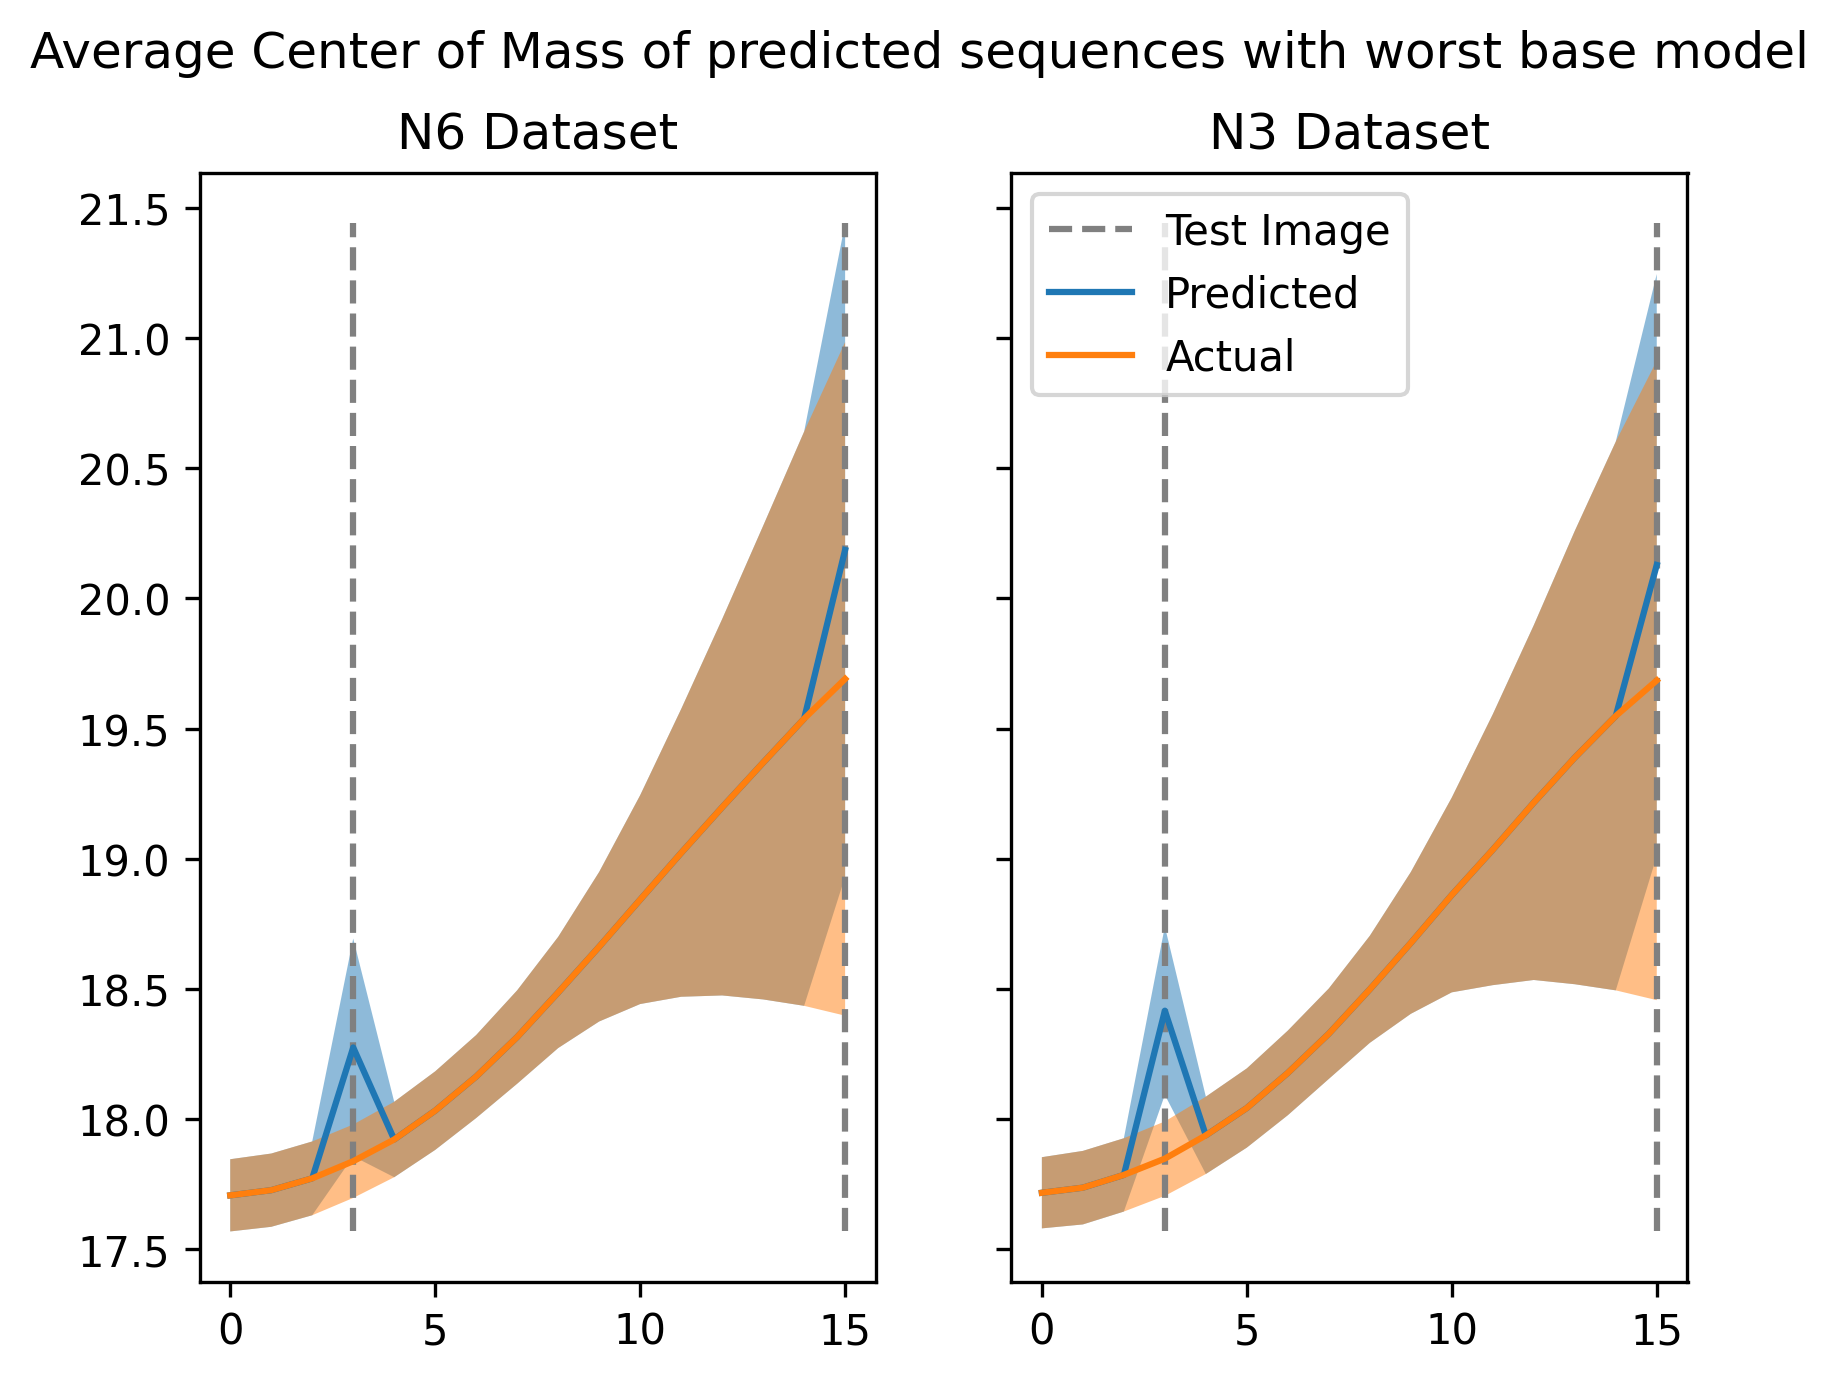

In [1578]:
plot_com(
    models["base"]["worst"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with worst base model",
)

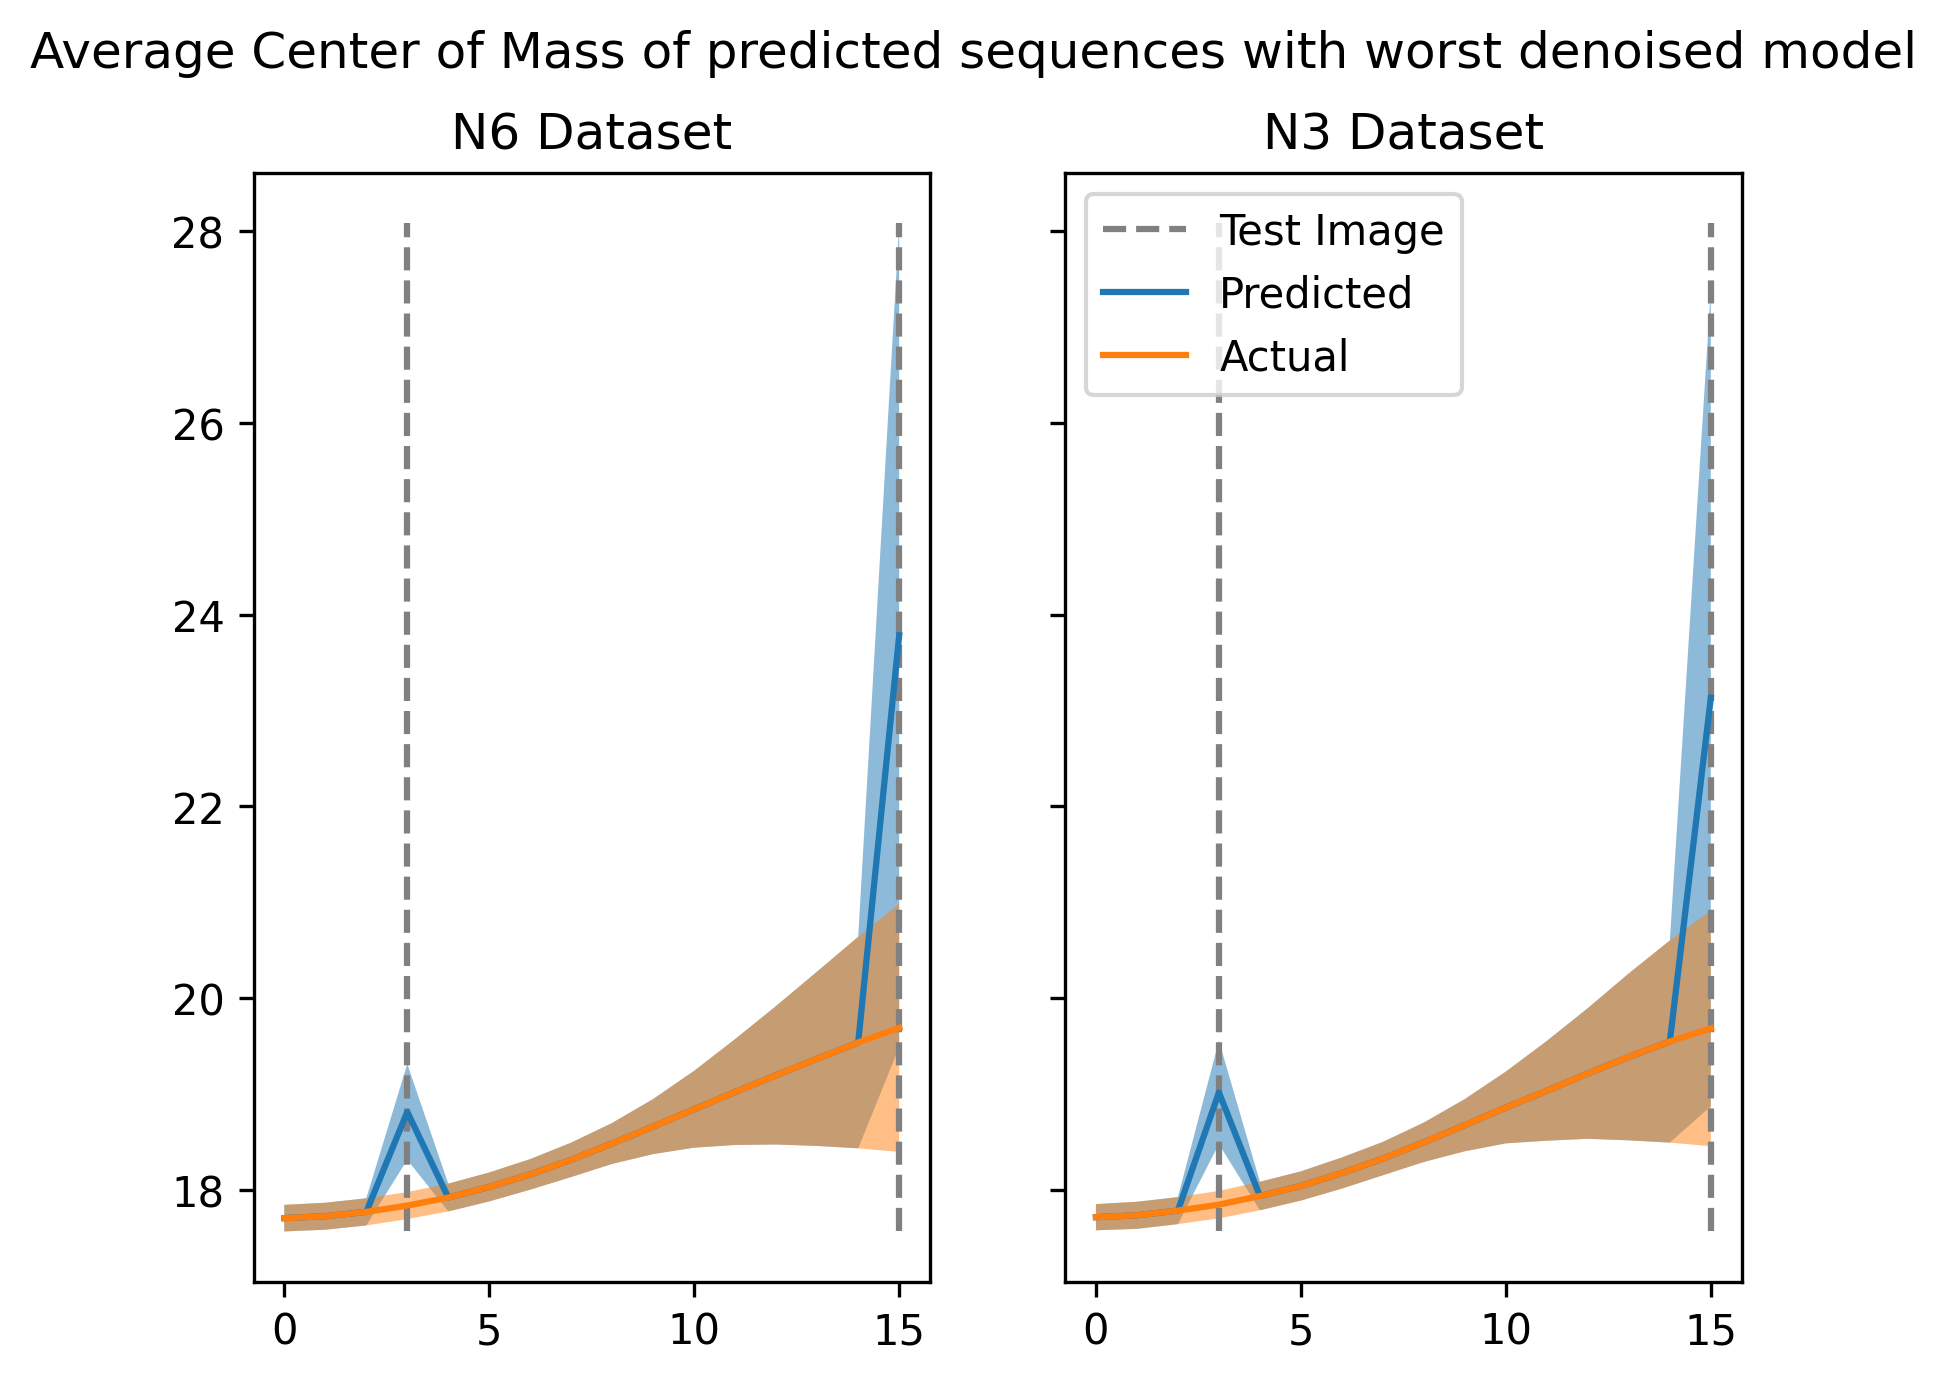

In [1579]:
plot_com(
    models["denoised"]["worst"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with worst denoised model",
)

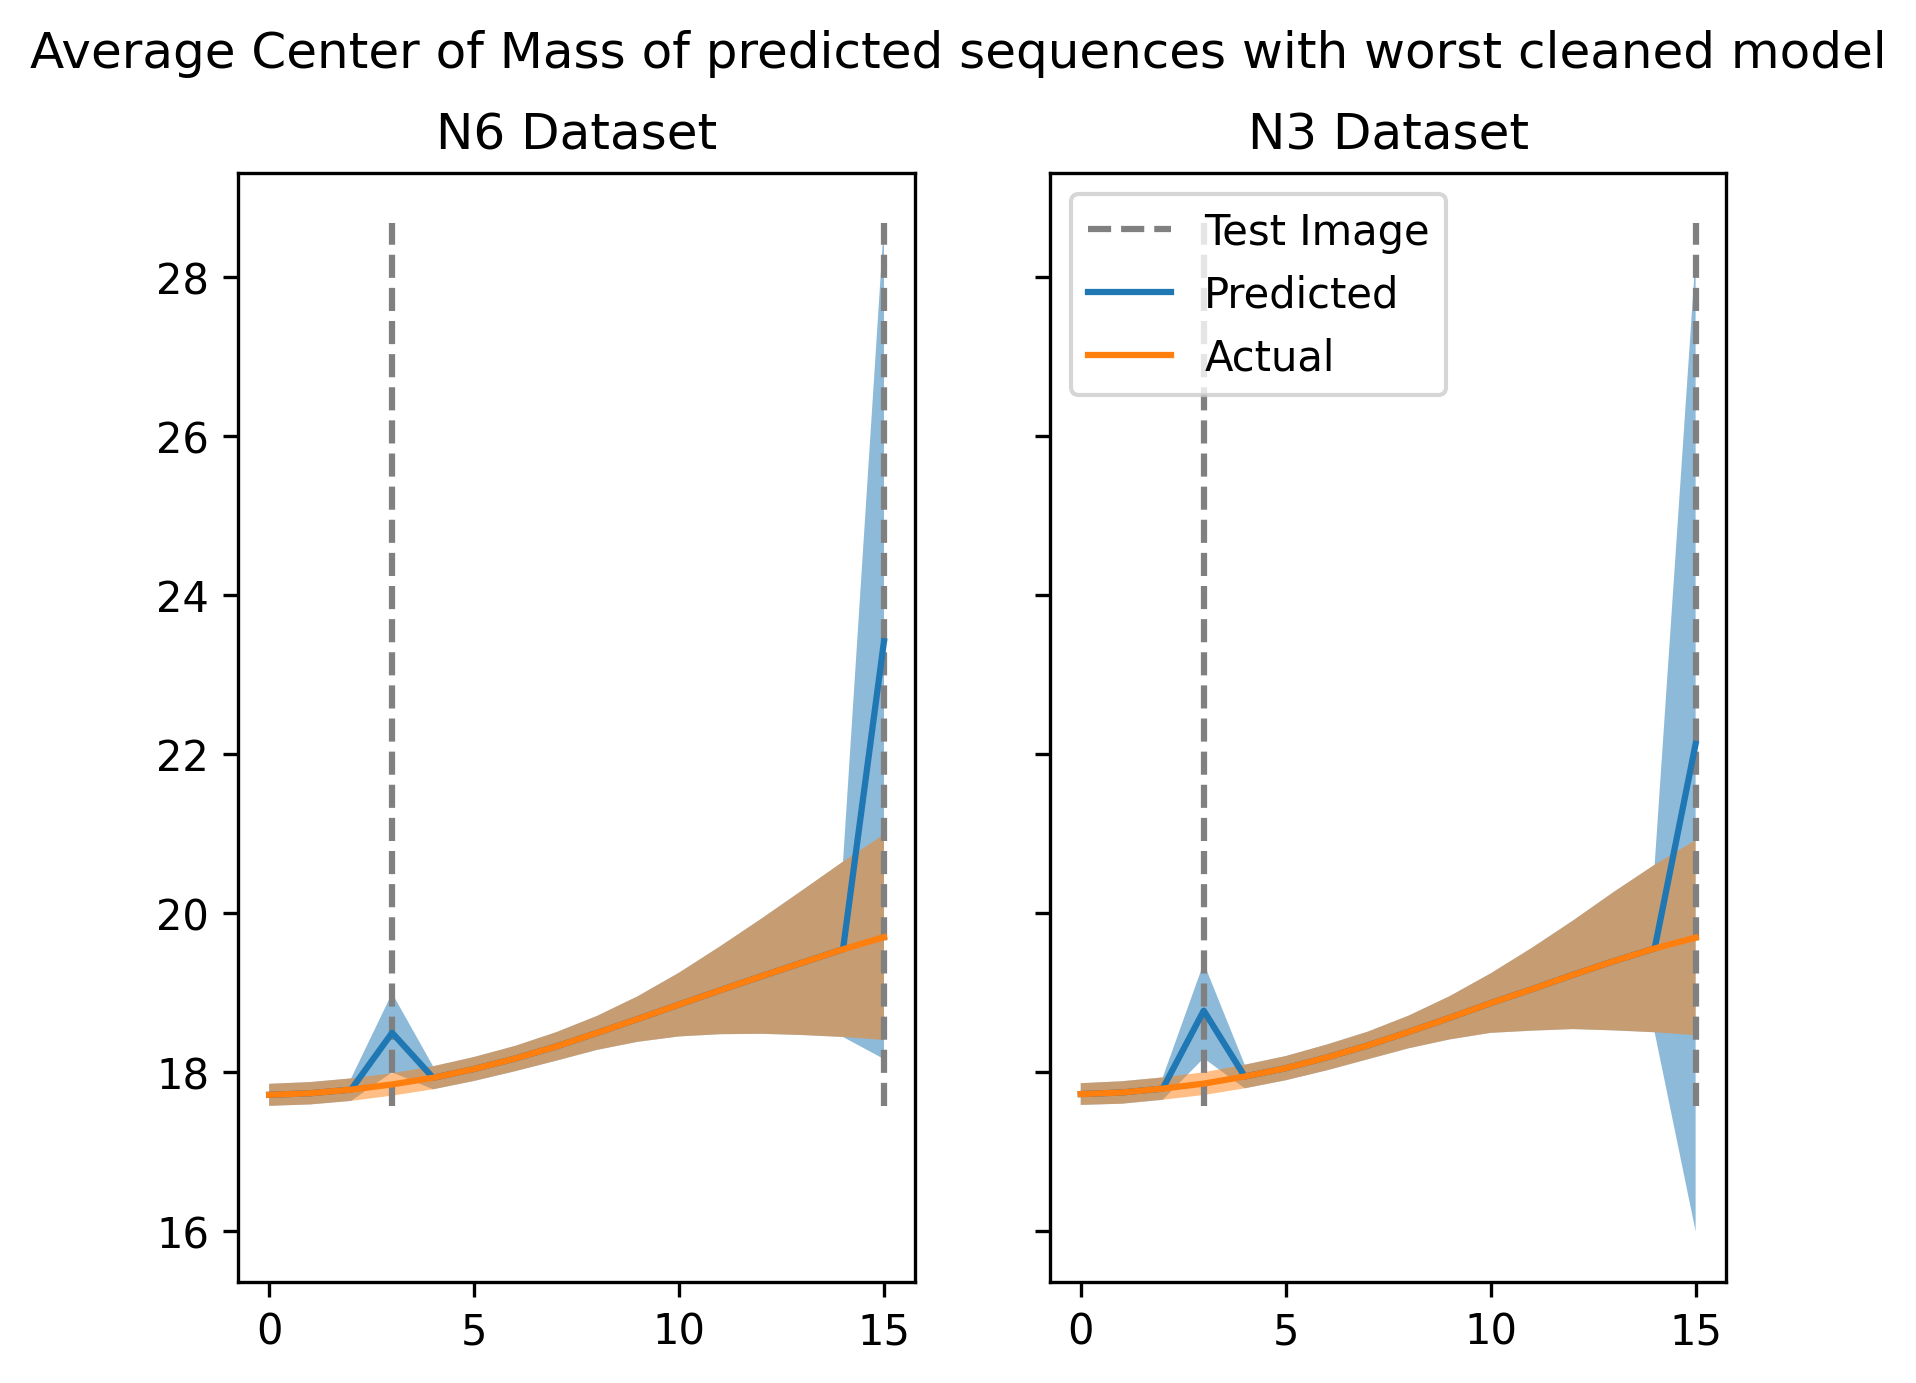

In [1580]:
plot_com(
    models["cleaned"]["worst"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with worst cleaned model",
)

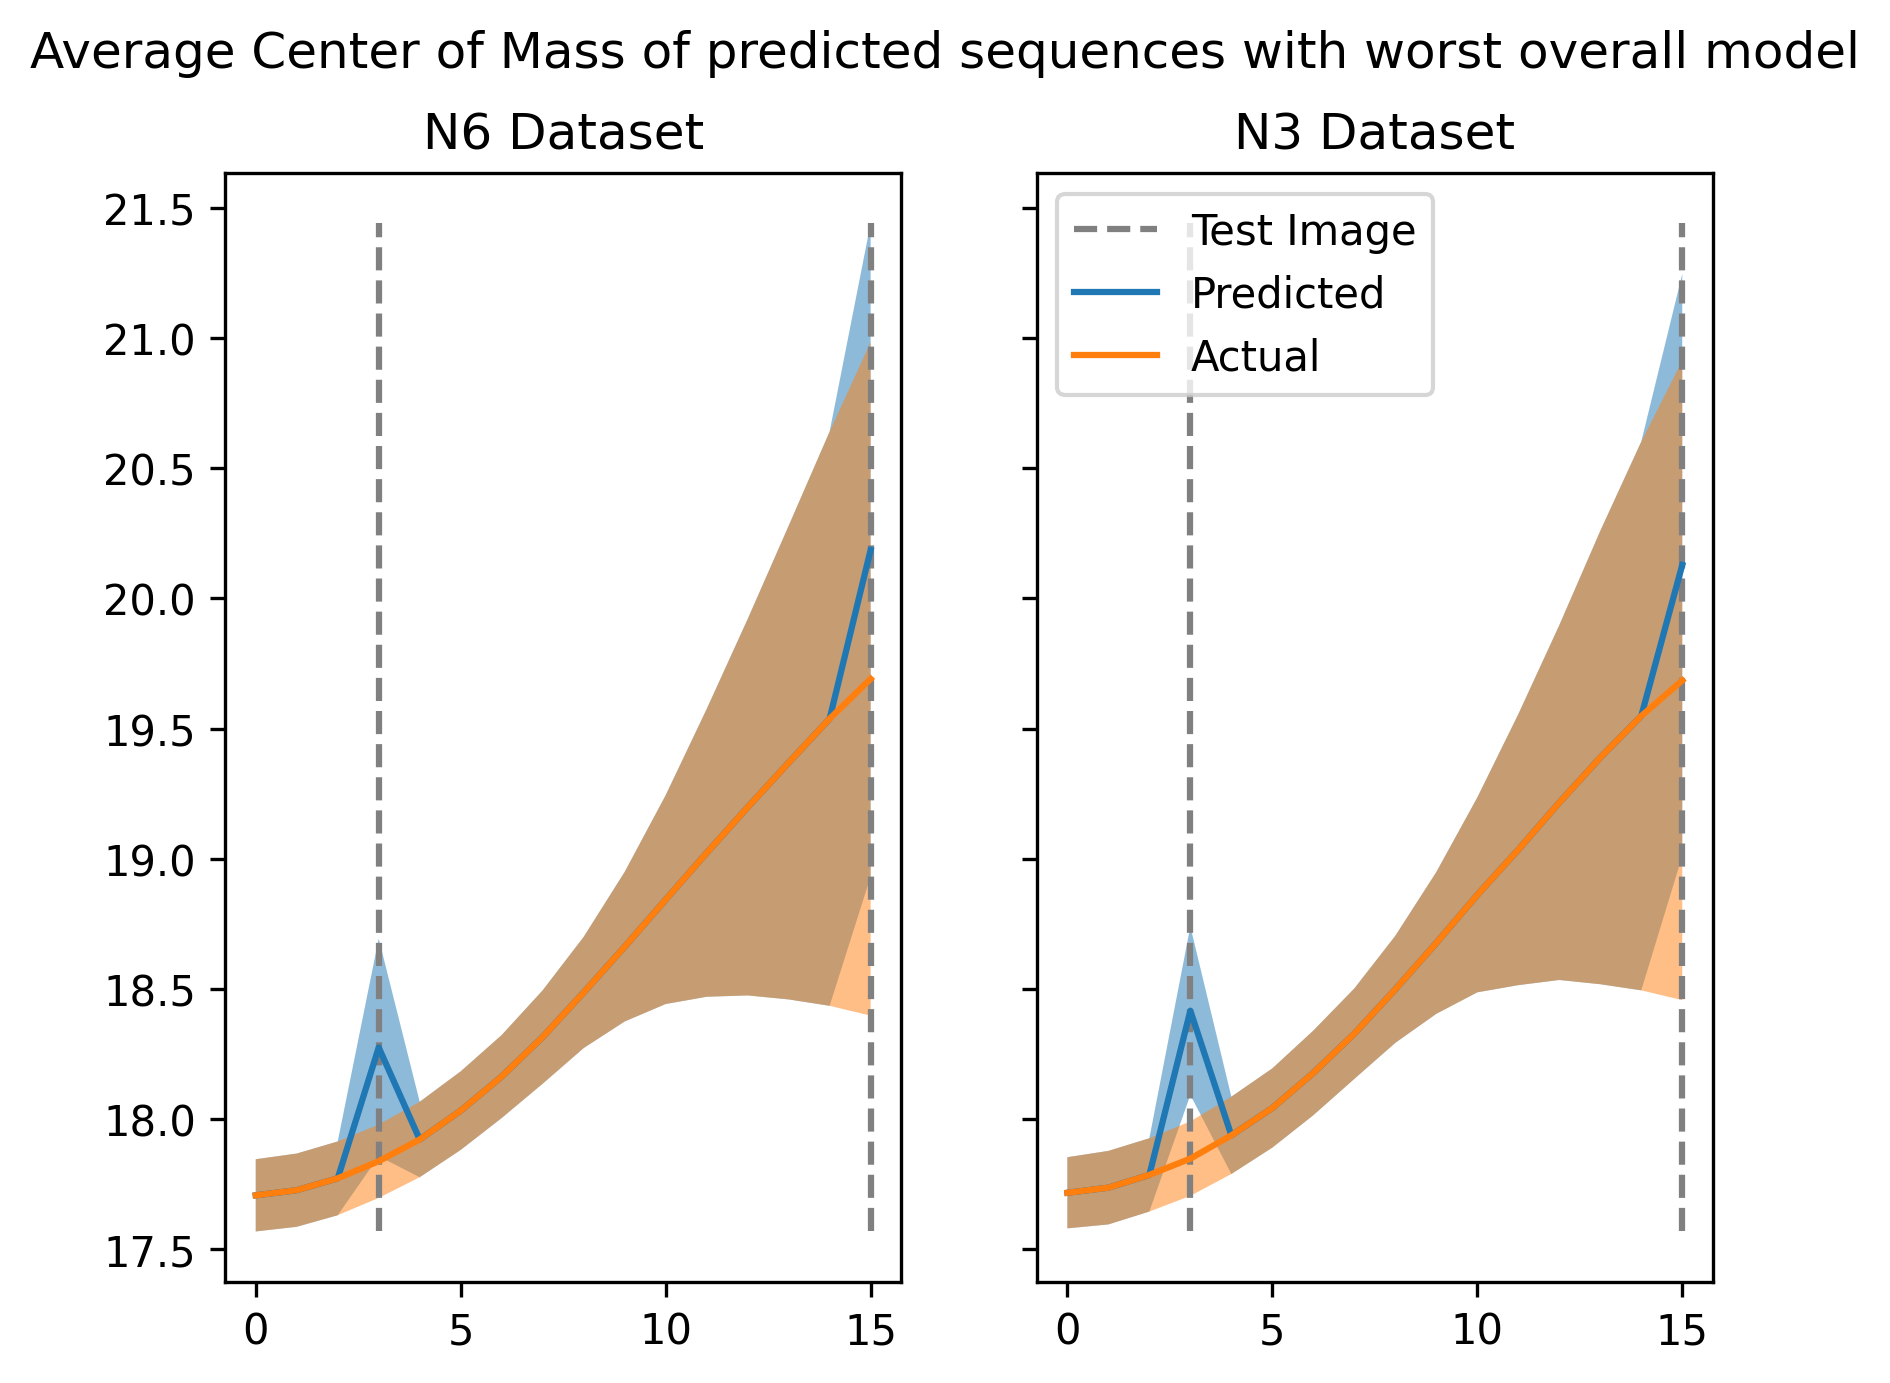

In [1581]:
plot_com(
    models["overall"]["worst"],
    n6_sequence_com,
    n3_sequence_com,
    "Average Center of Mass of predicted sequences with worst overall model",
)

# Model Robustness

In [1582]:
class Noise:
    @staticmethod
    def gaussian(x, weight: float = 1.0, mu: float = 0.0, sigma: float = 1.0):
        noise = mu + sigma * np.random.randn(*x.shape)
        return np.clip(x + (weight * noise), 0.0, 1.0)

    @staticmethod
    def salt_and_pepper(x, weight: float = 1.0):
        p_noise = 1 - weight
        noise = np.random.choice(
            [-1.0, 0.0, 1.0], x.shape, p=[weight / 2, p_noise, weight / 2]
        )
        noise[noise == 0] = x[noise == 0]
        return np.clip(torch.tensor(noise), 0.0, 1.0)

    @staticmethod
    def shot(x, weight: float = 1.0):
        noise = np.random.poisson(x)
        return np.clip(x + weight * noise, 0.0, 1.0)

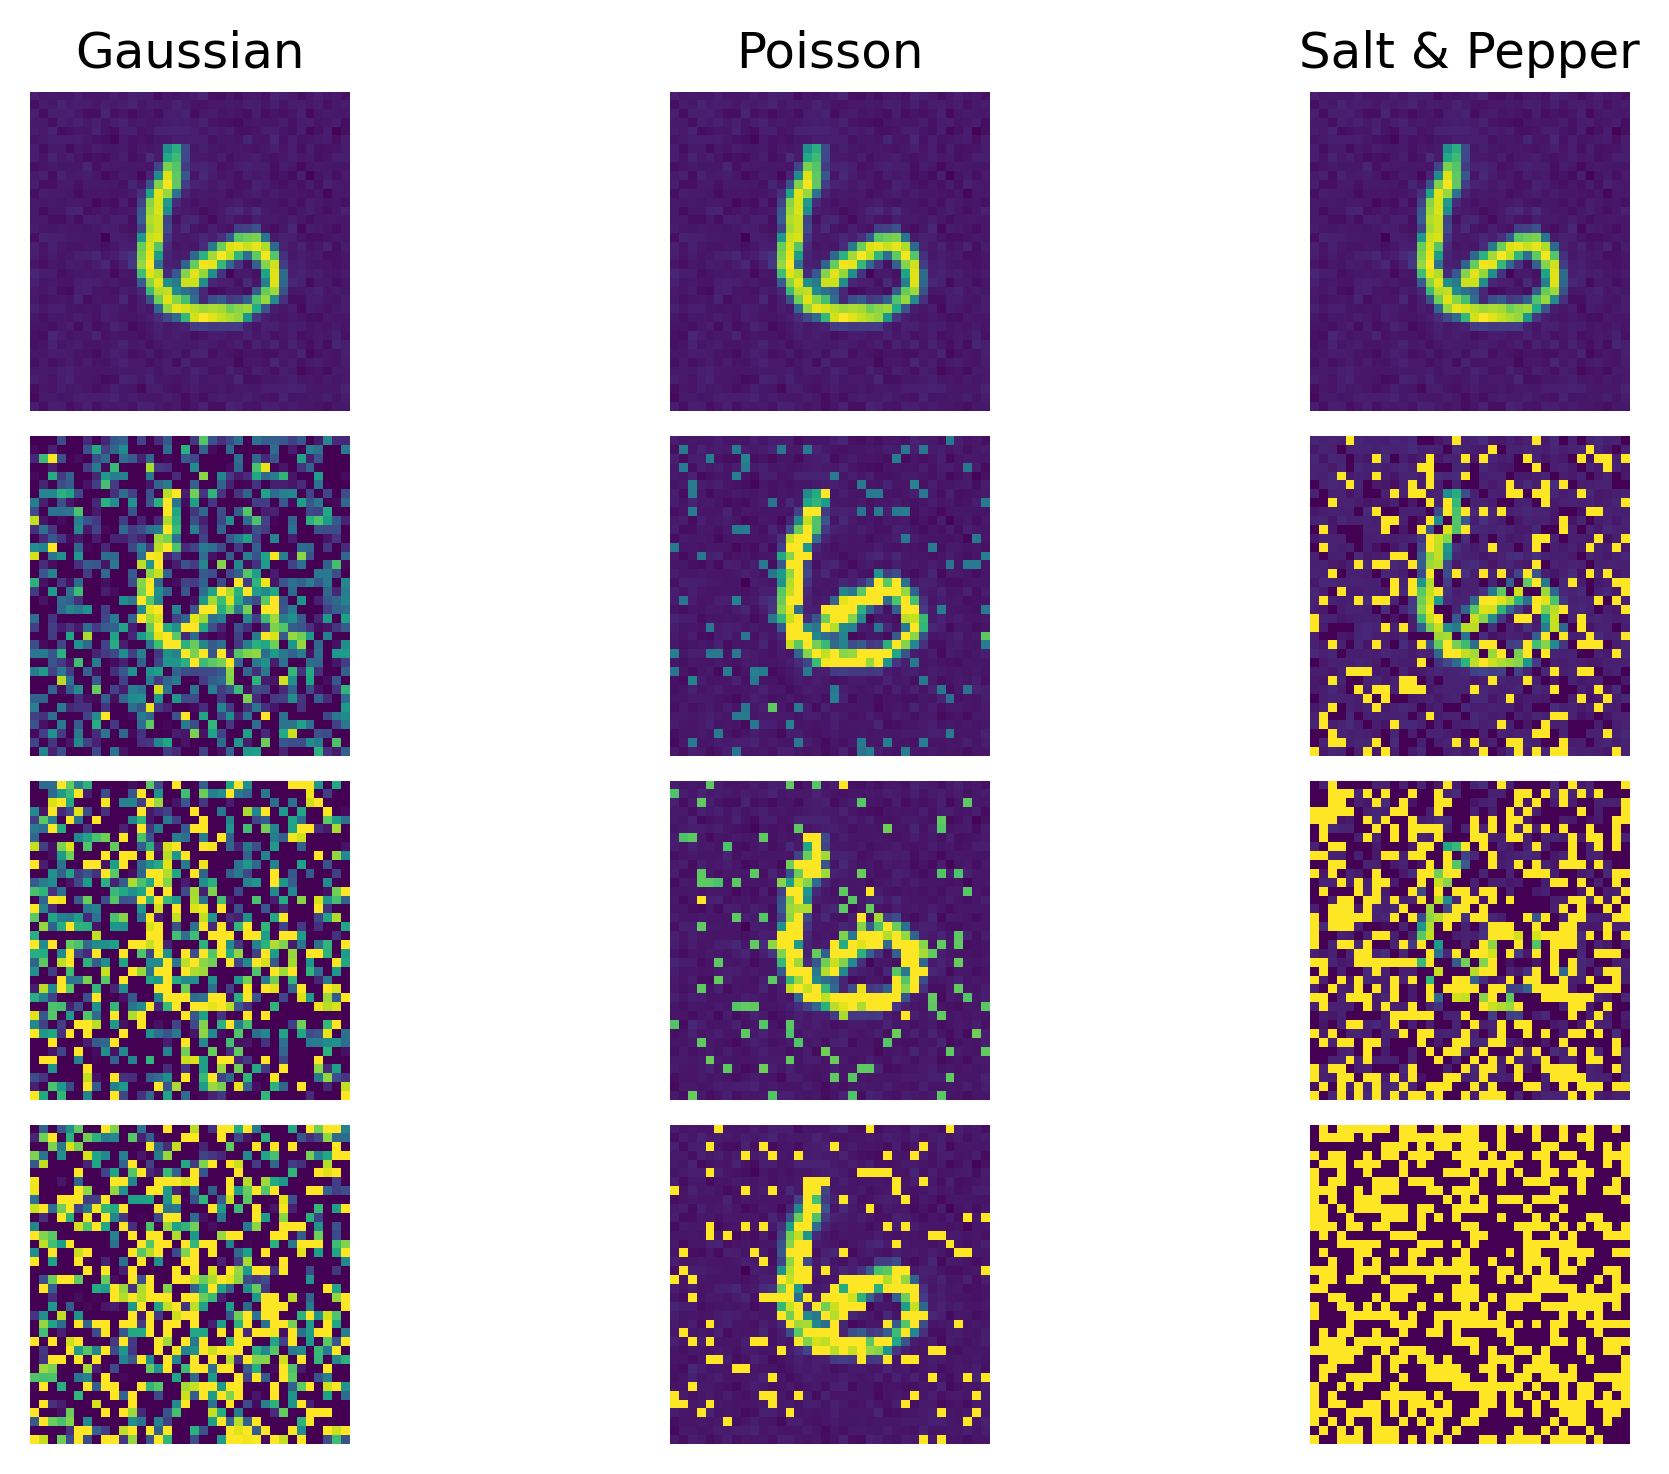

In [1592]:
img = test_n6[0, 0, 1]

N_STEPS = 4

fig, axs = plt.subplots(N_STEPS, 3, constrained_layout=True)
[ax.axis("off") for ax in axs.flatten()]

axs[0, 0].title.set_text("Gaussian")
axs[0, 1].title.set_text("Poisson")
axs[0, 2].title.set_text("Salt & Pepper")

intens = np.linspace(0, 1, N_STEPS)

for i, w in enumerate(intens):
    axs[i, 0].imshow(Noise.gaussian(img, w))
    axs[i, 1].imshow(Noise.shot(img, w))
    axs[i, 2].imshow(Noise.salt_and_pepper(img, w))
plt.show()

In [1584]:
from torch.utils.data import TensorDataset, DataLoader

datasets = data.Datasets("/Users/henrywilliams/Documents/uni/amml/assessment/data")

n6 = datasets.n6_full().numpy()
n3 = datasets.n3_full().numpy()

n6 = (n6 - n6.min()) / (n6.max() - n6.min())
n3 = (n3 - n3.min()) / (n3.max() - n3.min())

test_idxs = np.array([[1, 2, 3], [13, 14, 15]])

test_n6 = n6[:, test_idxs]
test_n3 = n3[:, test_idxs]

n6_x = (
    torch.tensor(test_n6[:, :, :-1], dtype=torch.float32)
    .reshape(800, 2, 36, 36, 1)
    .permute(0, 4, 1, 2, 3)
)
n3_x = (
    torch.tensor(test_n3[:, :, :-1], dtype=torch.float32)
    .reshape(200, 2, 36, 36, 1)
    .permute(0, 4, 1, 2, 3)
)

n6_y = torch.tensor(test_n6[:, :, -1], dtype=torch.float32).reshape(800, 1, 1, 36, 36)
n3_y = torch.tensor(test_n3[:, :, -1], dtype=torch.float32).reshape(200, 1, 1, 36, 36)

n6 = DataLoader(TensorDataset(n6_x, n6_y), batch_size=64)
n3 = DataLoader(TensorDataset(n3_x, n3_y), batch_size=64)

In [1585]:
from typing import Callable

import torch.nn as nn


def transform_batch(bx, noise, intensity):
    for i in range(len(bx)):
        bx[i, 0, 0] = noise(bx[i, 0, 0], intensity)
        bx[i, 0, 1] = noise(bx[i, 0, 1], intensity)

    return bx


def test(model, test_set, noise=Callable, intensity=1.0):
    model.eval()
    test_loss = 0.0

    loss_fn = nn.MSELoss()
    for input, target in test_set:
        input = transform_batch(input, noise, intensity)
        input = input.to(device)
        target = target.to(device)
        with torch.no_grad():
            output = model(input)

        loss = loss_fn(output, target)
        test_loss += loss.item()

    return test_loss / len(test_set.dataset)

In [1586]:
import os
from tqdm import tqdm
import json

N_INTENSITIES = 100

weights = np.linspace(0, 1.0, N_INTENSITIES)

augmentation_results = (
    {
        "xs": weights,
        "n6": {
            "gaussian": {
                "ys": [
                    test(models["overall"]["best"], n6, Noise.gaussian, w)
                    for w in tqdm(weights, desc="N6, Gaussian", leave=False)
                ],
            },
            "shot": {
                "ys": [
                    test(models["overall"]["best"], n6, Noise.shot, w)
                    for w in tqdm(weights, desc="N6, Poisson", leave=False)
                ],
            },
            "sandp": {
                "ys": [
                    test(models["overall"]["best"], n6, Noise.salt_and_pepper, w)
                    for w in tqdm(weights, desc="N6, Salt & Pepper", leave=False)
                ],
            },
        },
        "n3": {
            "gaussian": {
                "ys": [
                    test(models["overall"]["best"], n3, Noise.gaussian, w)
                    for w in tqdm(weights, desc="N3, Gaussian", leave=False)
                ],
            },
            "shot": {
                "ys": [
                    test(models["overall"]["best"], n3, Noise.gaussian, w)
                    for w in tqdm(weights, desc="N3, Poisson", leave=False)
                ],
            },
            "sandp": {
                "ys": [
                    test(models["overall"]["best"], n3, Noise.salt_and_pepper, w)
                    for w in tqdm(weights, desc="N3, Salt & Pepper", leave=False)
                ],
            },
        },
    }
    if not os.path.exists("./augmentation_results.json")
    else json.load(open("./augmentation_results.json", "r"))
)

augmentation_results["xs"] = list(augmentation_results["xs"])

with open("augmentation_results.json", "w") as file:
    json.dump(augmentation_results, file)

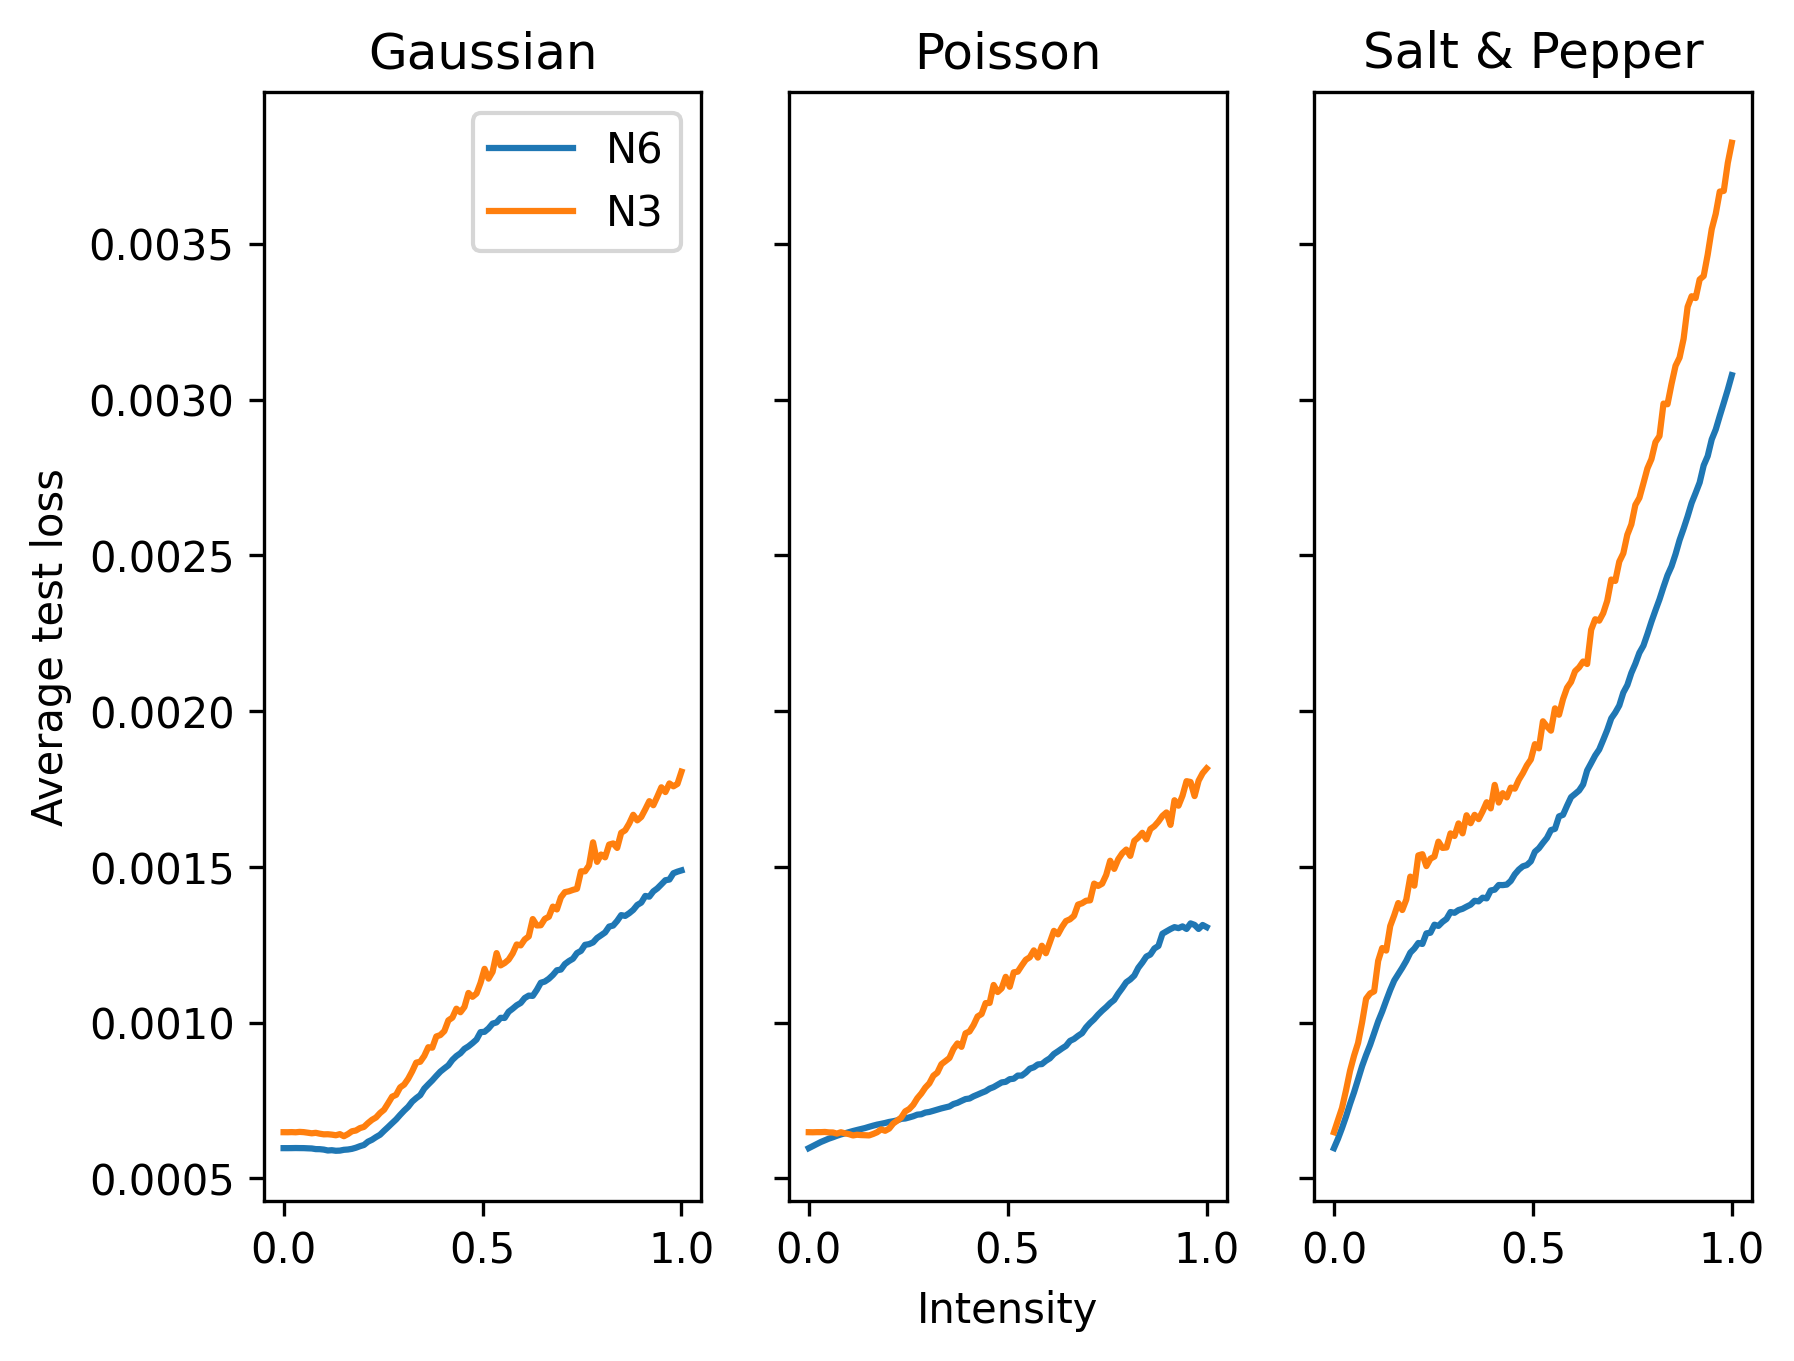

In [1587]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True)

for ax, noise in zip(axs, ["gaussian", "shot", "sandp"]):
    grad_n6 = np.gradient(augmentation_results["n6"][noise]["ys"])
    grad_n3 = np.gradient(augmentation_results["n3"][noise]["ys"])

    inf_n6 = augmentation_results["xs"][np.argmin(grad_n6)]
    inf_n3 = augmentation_results["xs"][np.argmin(grad_n3)]

    ax.plot(
        augmentation_results["xs"],
        augmentation_results["n6"][noise]["ys"],
        label="N6",
    )

    ax.plot(
        augmentation_results["xs"],
        augmentation_results["n3"][noise]["ys"],
        label="N3",
    )

axs[0].title.set_text("Gaussian")
axs[1].title.set_text("Poisson")
axs[2].title.set_text("Salt & Pepper")
axs[0].set_ylabel("Average test loss")
axs[1].set_xlabel("Intensity")

axs[0].legend()
plt.show()

In [1591]:
def remove_region(img, size):
    x1, y1 = np.random.randint(0, 36 - size + 1, (2,))
    x2 = x1 + size
    y2 = y1 + size
    img = img.clone()
    img[x1:x2, y1:y2] = 0.0
    return img

In [1589]:
sizes = list(np.arange(0, 36))

missing_data = {
    "xs": sizes,
    "n6": {
        "ys": [
            test(models["overall"]["best"], n6, remove_region, size)
            for size in tqdm(sizes, desc="N6", leave=False)
        ],
    },
    "n3": {
        "ys": [
            test(models["overall"]["best"], n3, remove_region, size)
            for size in tqdm(sizes, desc="N3", leave=False)
        ],
    },
}

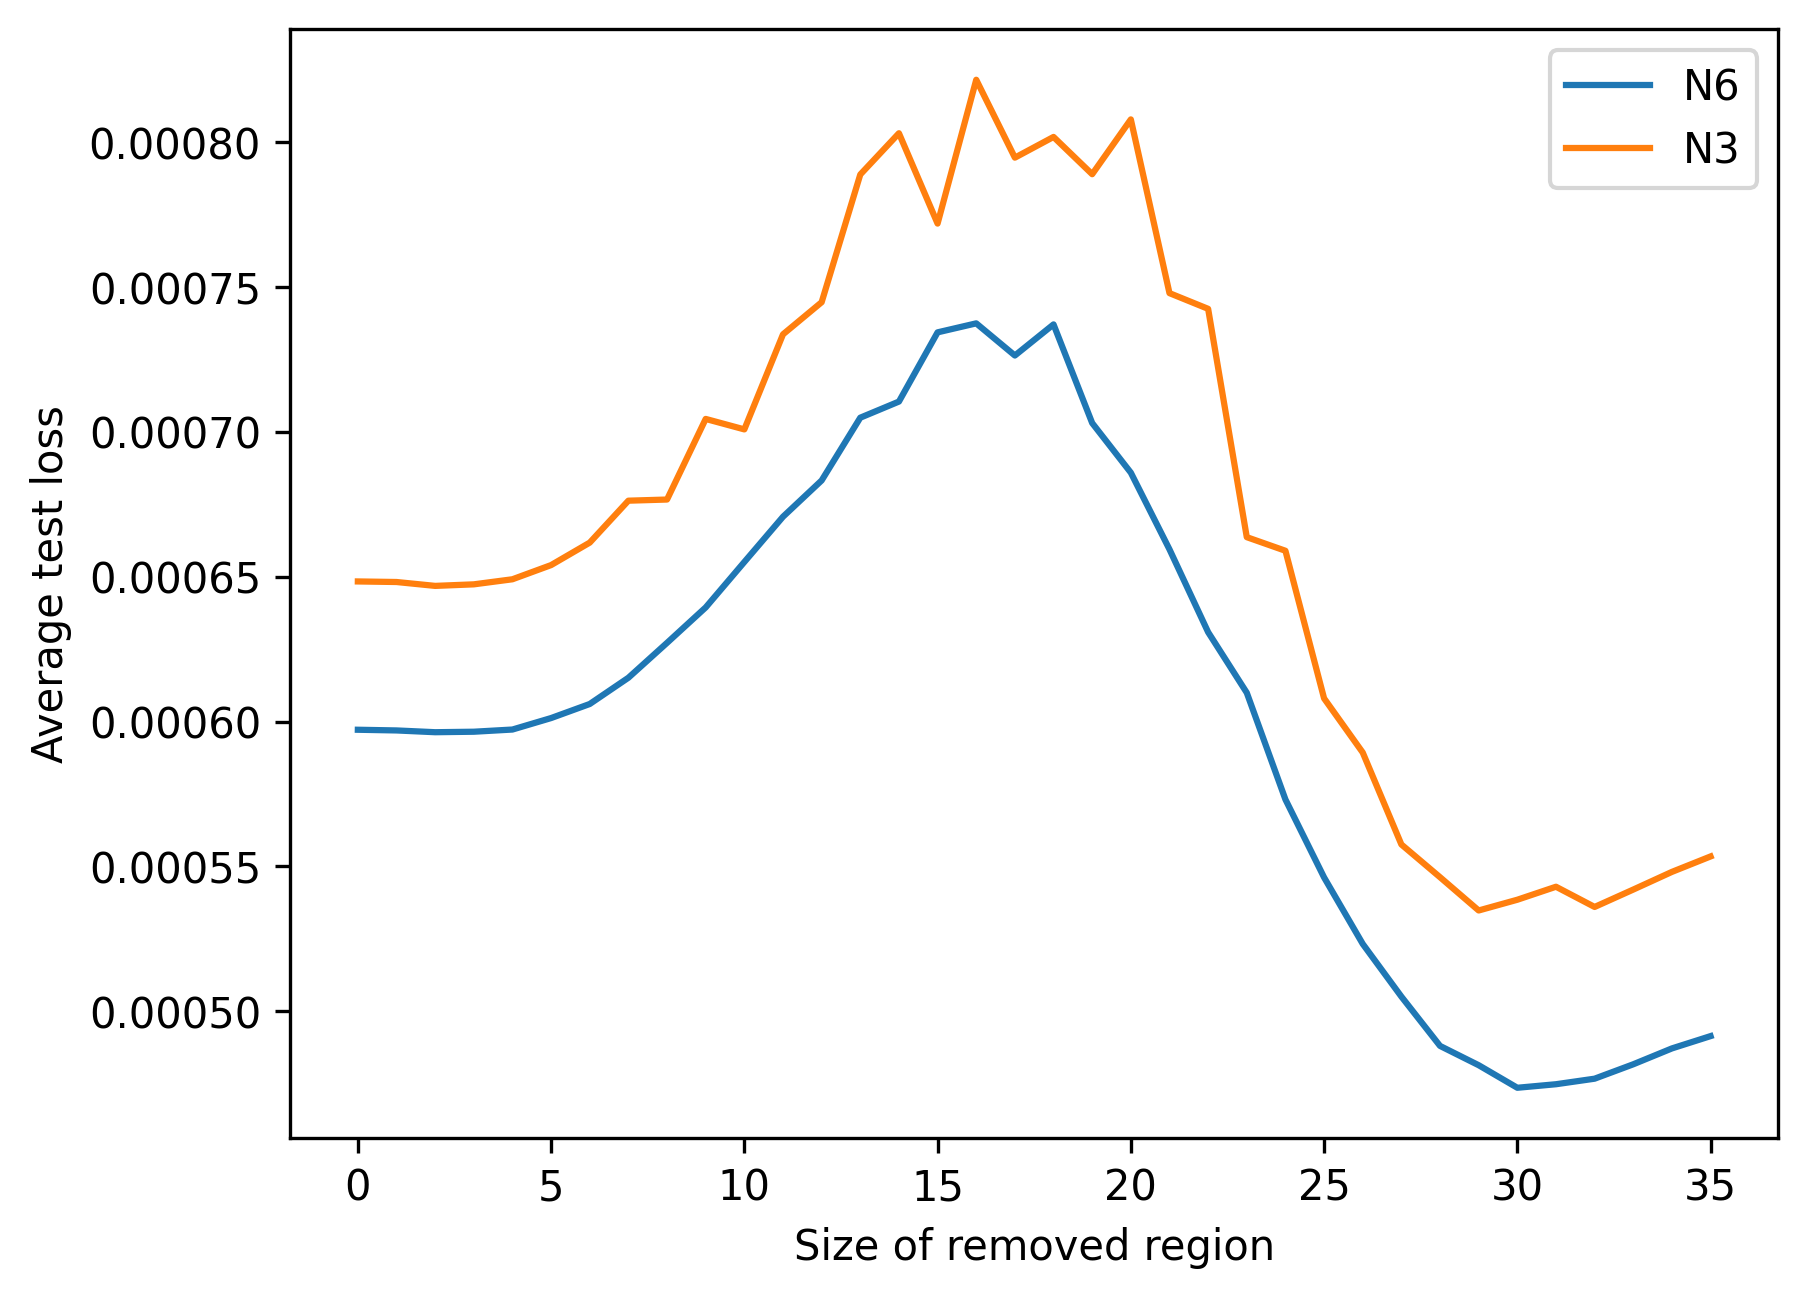

In [1590]:
plt.plot(sizes, missing_data["n6"]["ys"], label="N6")
plt.plot(sizes, missing_data["n3"]["ys"], label="N3")
plt.legend()
plt.xlabel("Size of removed region")
plt.ylabel("Average test loss")
plt.show()

# Test Results

In [1611]:
n3_results = []

for n3_xi in tqdm(n3_x, desc="N3 Test"):
    n3_results.append(
        models["overall"]["best"](n3_xi.unsqueeze(0).to(device))
        .cpu()
        .detach()
        .reshape(-1)
        .numpy()
    )

n3_results = np.array(n3_results)
n3_results = np.int16(n3_results * (n3_max - n3_min) + n3_min)
pd.DataFrame(n3_results).to_csv("n3_test_results.csv")

N3 Test: 100%|██████████| 200/200 [00:01<00:00, 142.05it/s]


-12 258

-25.0 272.0

In [1615]:
n6_results = []

for n6_xi in tqdm(n6_x, desc="n6 Test"):
    n6_results.append(
        models["overall"]["best"](n6_xi.unsqueeze(0).to(device))
        .cpu()
        .detach()
        .reshape(-1)
        .numpy()
    )

n6_results = np.array(n6_results)
n6_results = np.int16(n6_results * (n6_max - n6_min) + n6_min)
pd.DataFrame(n6_results).to_csv("n6_test_results.csv")

n6 Test: 100%|██████████| 800/800 [00:05<00:00, 144.57it/s]
